# Module 2 Project

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


## Project Overview

    1) Establish business questions to explore
    2) Open, explore, and perform necessary cleaning on provided data sets. Determine need for additional data and acquire it via API calls and web scraping. Decide on most robust data to use as the "master" set.
    3) Merge data sets into larger data sets as needed. Clean further until working with robust data.
    4) EDA on data sets including visualizations

# Business Exploration Questions

1. What are the primary factors influencing housing prices in the King County metro area?
2. Can we effectively use a regression model based system for realtors to determine a proper list price?
3. Is a model-based system more accurate for determining list price than the traditional comps-based system?
4. What easy-to-use features can we add to our model to increase its accuracy?

# Notebook Preparation

## Recommended Extensions

Recommended to also install the nbextensions "Table of Contents 2" and "Collapsible Headings" for easier navigation through this notebook.

Gitbhub here: https://github.com/ipython-contrib/jupyter_contrib_nbextensions


Ensure seaborn is updated to recent version

## Importing Modules

In [1]:
import csv

from joblib import dump

import pandas as pd

import numpy as np
from numpy import mean
from numpy import std

import statsmodels.api as sm
from statsmodels.formula.api import ols
#from statsmodels.formula.api import wls

import scipy.stats as stats
from scipy.stats import norm

from sklearn.linear_model import LinearRegression, LassoCV, ElasticNetCV, RidgeCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.svm import SVR

from sklearn.feature_selection import RFECV, RFE

from sklearn.model_selection import cross_val_score, RepeatedKFold, train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

from sklearn.preprocessing import PolynomialFeatures, StandardScaler

from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn import neighbors
from math import sqrt
import itertools

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from shapely.geometry import Point,Polygon
import geopandas as gpd
import descartes
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

# Preprocessing

In [2]:
# load and look at our king county housing data
df = pd.read_csv('kc_house_data.csv')
df

id        date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014  221900.0         3       1.00         1180   
1      6414100192   12/9/2014  538000.0         3       2.25         2570   
2      5631500400   2/25/2015  180000.0         2       1.00          770   
3      2487200875   12/9/2014  604000.0         4       3.00         1960   
4      1954400510   2/18/2015  510000.0         3       2.00         1680   
...           ...         ...       ...       ...        ...          ...   
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0          5650     1.0         NaN   0.0          3      7        1180   
1          7242     2.0         0.0   0.0          3      7        2170   
2         10000     1.0         0.0   0.0          3      6         770   
3          5000     1.0         0.0   0.0          5      7        1050   
4          8080     1.0         0.0   0.0          3      8        1680   
...         ...     ...         ...   ...        ...    ...         ...   
21592      1131     3.0         0.0   0.0          3      8        1530   
21593      5813     2.0         0.0   0.0          3      8        2310   
21594      1350     2.0         0.0   0.0          3      7        1020   
21595      2388     2.0         NaN   0.0          3      8        1600   
21596      1076     2.0         0.0   0.0          3      7        1020   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0               0.0      1955           0.0    98178  47.5112 -122.257   
1             400.0      1951        1991.0    98125  47.7210 -122.319   
2               0.0      1933           NaN    98028  47.7379 -122.233   
3             910.0      1965           0.0    98136  47.5208 -122.393   
4               0.0      1987           0.0    98074  47.6168 -122.045   
...             ...       ...           ...      ...      ...      ...   
21592           0.0      2009           0.0    98103  47.6993 -122.346   
21593           0.0      2014           0.0    98146  47.5107 -122.362   
21594           0.0      2009           0.0    98144  47.5944 -122.299   
21595           0.0      2004           0.0    98027  47.5345 -122.069   
21596           0.0      2008           0.0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  
0               1340        5650  
1               1690        7639  
2               2720        8062  
3               1360        5000  
4               1800        7503  
...              ...         ...  
21592           1530        1509  
21593           1830        7200  
21594           1020        2007  
21595           1410        1287  
21596           1020        1357  

[21597 rows x 21 columns]

In [3]:
# what are the columns in our data?

df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

### Outliers

In [4]:
# looking for outliers in the percentiles

df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.159700e+04  21597.000000  19221.000000  21534.000000  21597.000000   
mean   1.509941e+04      1.494096      0.007596      0.233863      3.409825   
std    4.141264e+04      0.539683      0.086825      0.765686      0.650546   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068500e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above      yr_built  yr_renovated       zipcode  \
count  21597.000000  21597.000000  21597.000000  17755.000000  21597.000000   
mean       7.657915   1788.596842   1970.999676     83.636778  98077.951845   
std        1.173200    827.759761     29.375234    399.946414     53.513072   
min        3.000000    370.000000   1900.000000      0.000000  98001.000000   
25%        7.000000   1190.000000   1951.000000      0.000000  98033.000000   
50%        7.000000   1560.000000   1975.000000      0.000000  98065.000000   
75%        8.000000   2210.000000   1997.000000      0.000000  98118.000000   
max       13.000000   9410.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000   21597.000000   21597.000000  
mean      47.560093   -122.213982    1986.620318   12758.283512  
std        0.138552      0.140724     685.230472   27274.441950  
min       47.155900   -122.519000     399.000000     651.000000  
25%       47.471100   -122.328000    1490.000000    5100.000000  
50%       47.571800   -122.231000    1840.000000    7620.000000  
75%       47.678000   -122.125000    2360.000000   10083.000000  
max       47.777600   -121.315000    6210.000000  871200.000000

We see potential outliers in price, sqft_lot, sqft_living, and bedrooms.

I also see a possible significant outlier in longitude. We will look at what that means visually.

In [5]:
df[df.duplicated(subset=['lat','long'], keep=False)].sort_values('lat')
# We have a lot of duplicate entries. We're going to keep the later of these entries and hope that if it's an outlier,
# it's caught in our outlier processing later.

df.drop_duplicates(['lat','long'], keep='last', inplace=True)

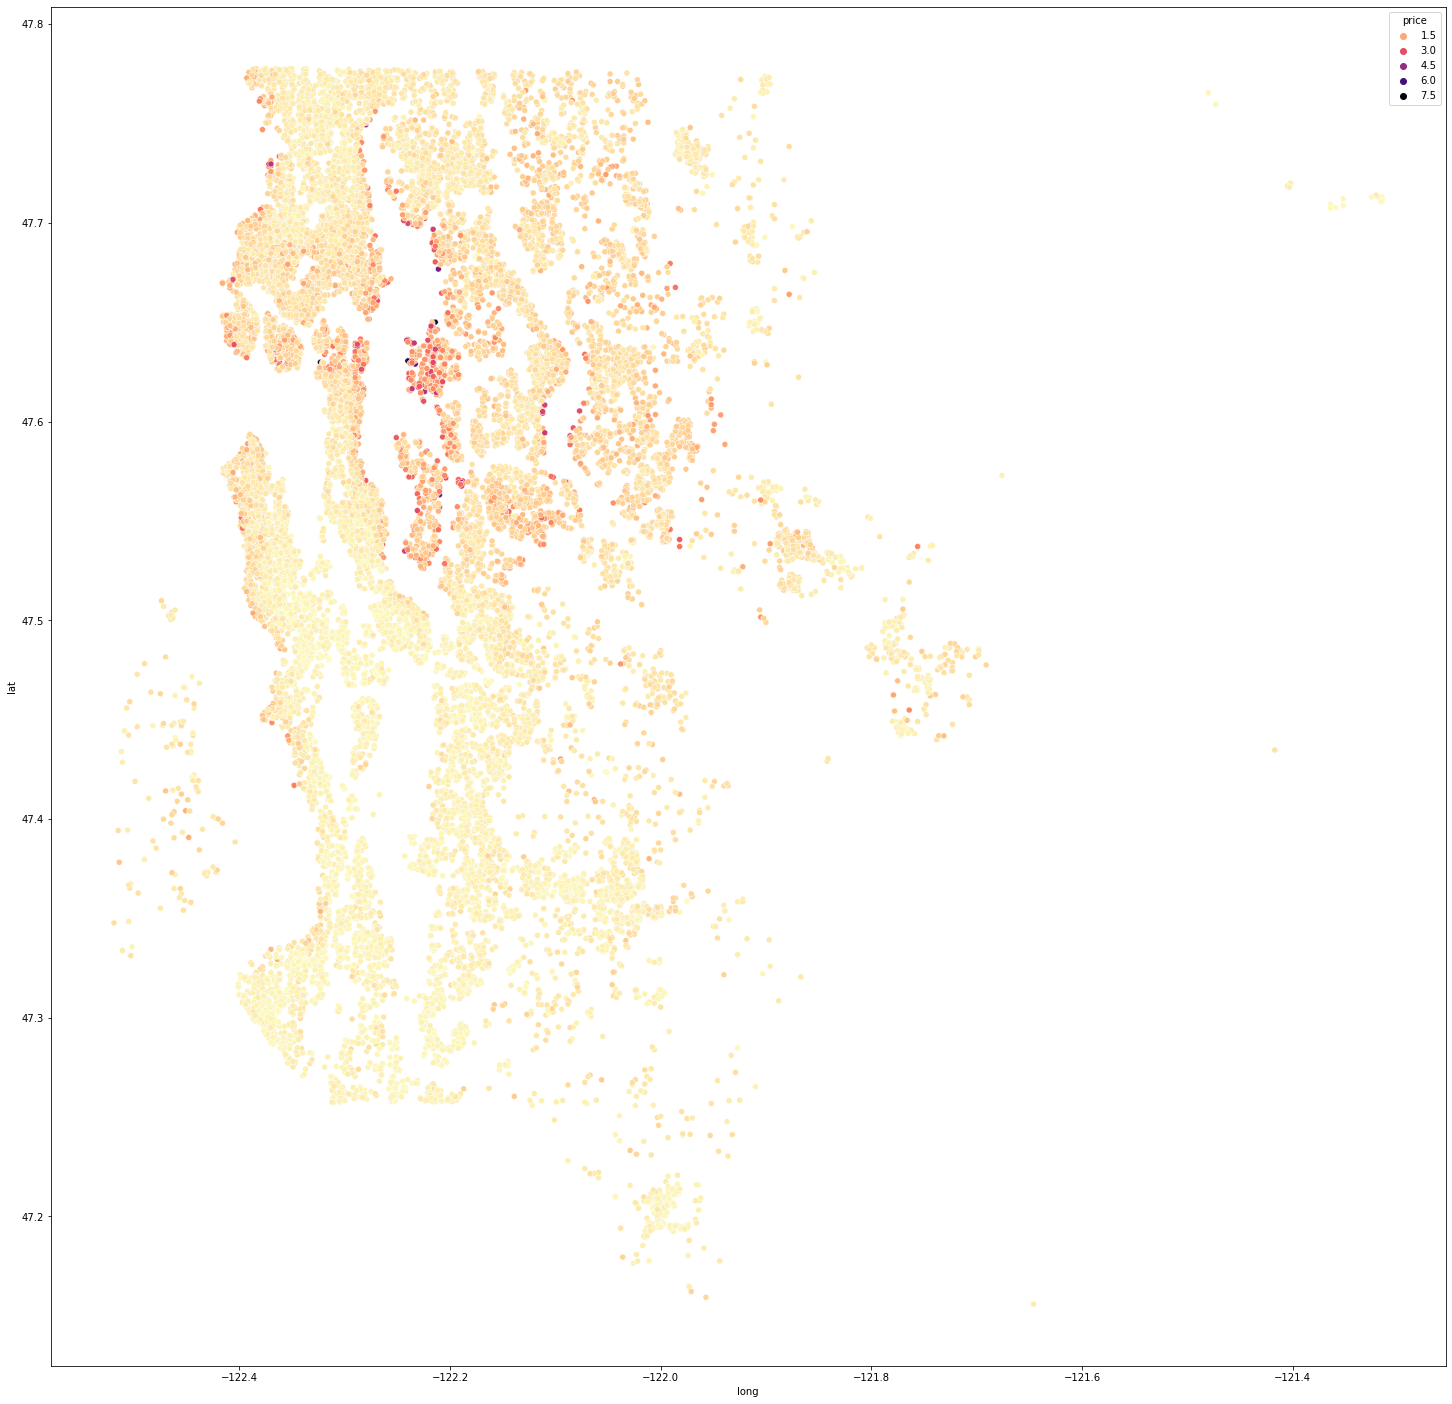

In [6]:
# plotting latitude and longitude as a visual scatter plot

plt.figure(figsize=(25,25))

sns.scatterplot(data=df, x="long", y="lat", hue="price", palette="magma_r");

Using latitude and longitude, we make a visual map of the King County area that lets us see the map outliers. We can see that there are a few sales in locations that are outliers in some way - still in King County but very far away from the metro area on which we are focusing. Sales that are too far outside of our comparison area geographically may add noise to our model. So I'm going to drop the longitude outliers as well. 

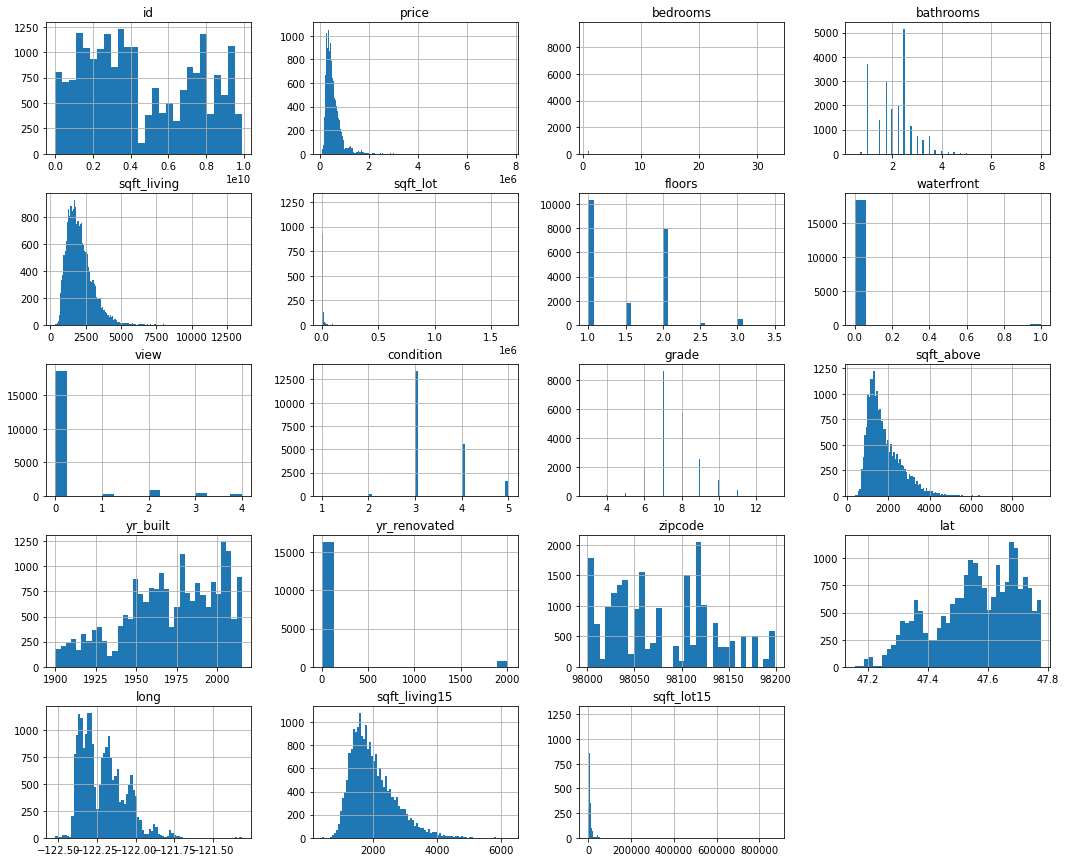

In [7]:
# check how our histograms are looking

df.hist(figsize=(18,15), bins='auto');


In [8]:
# we're using the median house value for a zip code to determine the zip code's sort, so we can visualize the zip code

# group our dataframe by zipcode on median home price, sorted ascending. We want to bin like-medians together.
zipsorted = pd.DataFrame(df.groupby('zipcode')['price'].median().sort_values(ascending=True))

# divide our dataframe into groups with entries per group as specified above,
# and assign this number to a new column
zipsorted['rank'] = np.divmod(np.arange(len(zipsorted)), 1)[0]+1

# function that looks up a segment that a data entry belongs to
def make_group(x, frame, column):
    y = frame.loc[(frame.index == x)][column]
    z = np.array(y)
    z[0]
    return z[0]

# make a new column on our dataframe. Look up each zip entry's group, and append to the column.
df['zip_rank'] = df['zipcode'].apply(lambda x: make_group(x, zipsorted, 'rank'))


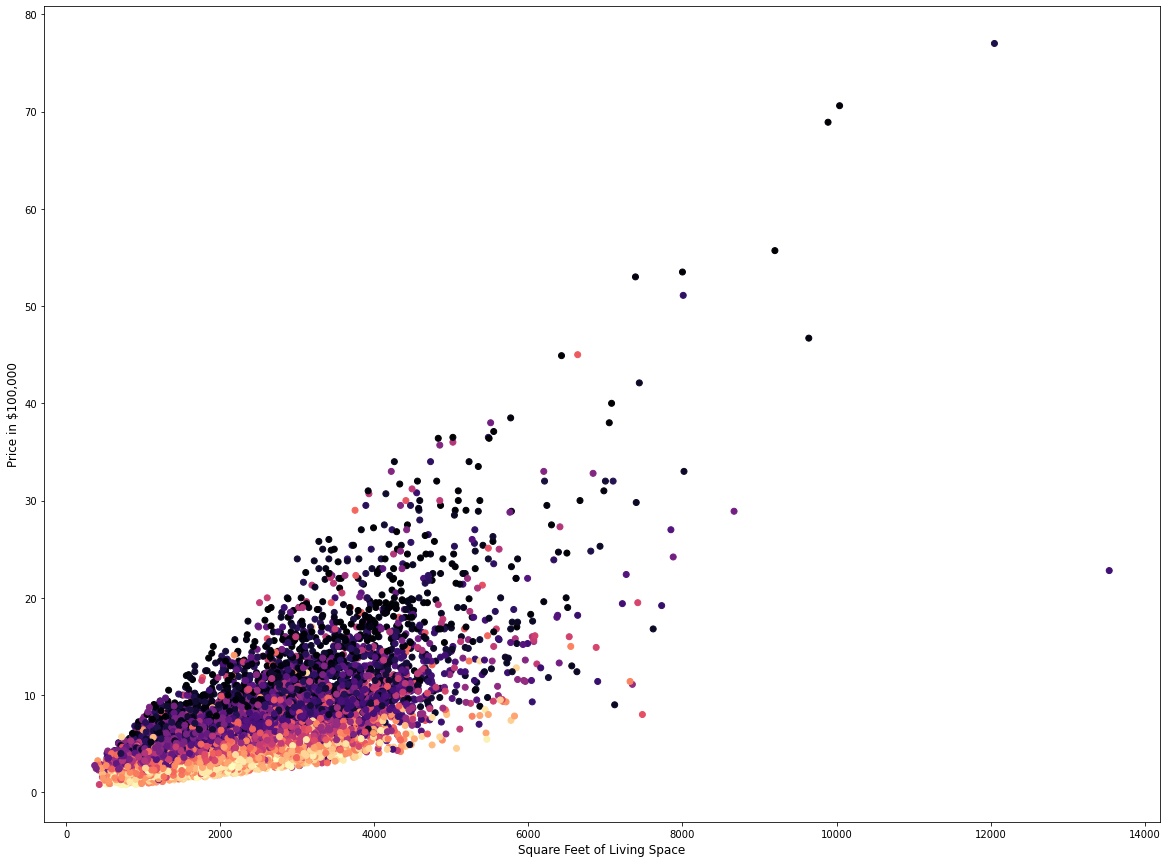

In [9]:
# visualize zip code as a color function, on a plot of price per square footage

fig, ax = plt.subplots(figsize=(20, 15))

ax.scatter(df['sqft_living'], (df['price']/100000), c=df['zip_rank'], cmap='magma_r')

ax.set_xlabel('Square Feet of Living Space', fontsize=12)
ax.set_ylabel('Price in $100,000', fontsize=12);

In [10]:
# visualize our price stats by zip code and displaying top 30 zip codes by mean

find_zip_outliers = df.groupby('zipcode')['price'].describe()
find_zip_outliers.sort_values('mean', ascending=False).head(30)

# very suspicious values in many zip codes for min


count          mean           std       min        25%        50%  \
zipcode                                                                      
98039     48.0  2.161875e+06  1.162195e+06  787500.0  1407500.0  1895000.0   
98004    307.0  1.364437e+06  7.546371e+05  425000.0   841250.0  1170000.0   
98040    278.0  1.201401e+06  6.095037e+05  500000.0   830000.0   995500.0   
98112    261.0  1.100672e+06  5.817721e+05  169317.0   685000.0   940000.0   
98102     96.0  9.202114e+05  8.139833e+05  330000.0   596000.0   734500.0   
98109    105.0  8.828807e+05  4.624831e+05  216650.0   620000.0   736000.0   
98105    217.0  8.698388e+05  4.860140e+05  380000.0   550000.0   679000.0   
98119    175.0  8.606884e+05  4.416311e+05  300523.0   602500.0   750000.0   
98006    489.0  8.589129e+05  4.460347e+05  247500.0   577500.0   760369.0   
98005    166.0  8.117992e+05  2.702344e+05  400000.0   635925.0   770250.0   
98033    416.0  8.081630e+05  4.680615e+05  130000.0   535750.0   675000.0   
98199    310.0  7.980865e+05  3.992089e+05  323000.0   540000.0   697500.0   
98075    351.0  7.919423e+05  2.858369e+05  406430.0   644000.0   740000.0   
98074    426.0  6.906133e+05  2.696264e+05  280000.0   537472.0   645000.0   
98077    193.0  6.851887e+05  2.652011e+05  250000.0   510000.0   654950.0   
98177    249.0  6.812709e+05  4.400842e+05  245560.0   430000.0   560000.0   
98053    397.0  6.787900e+05  2.656584e+05  170000.0   490000.0   635000.0   
98008    277.0  6.483765e+05  4.254829e+05  268500.0   465750.0   545000.0   
98052    553.0  6.445586e+05  1.972139e+05  270000.0   509250.0   612000.0   
98122    279.0  6.351771e+05  2.868129e+05  202000.0   452000.0   574000.0   
98027    387.0  6.266343e+05  2.952536e+05  130000.0   460000.0   575000.0   
98115    556.0  6.251151e+05  2.397556e+05  200000.0   460750.0   574900.0   
98116    320.0  6.229387e+05  2.535066e+05  130000.0   460000.0   567750.0   
98007    133.0  6.189456e+05  1.994934e+05  295000.0   470000.0   560000.0   
98029    307.0  6.180467e+05  2.163373e+05  285000.0   490617.0   578550.0   
98144    319.0  5.999976e+05  4.016695e+05  181000.0   379950.0   457500.0   
98103    546.0  5.918719e+05  2.142242e+05  238000.0   435000.0   560000.0   
98024     79.0  5.900591e+05  3.774649e+05  200000.0   345000.0   465000.0   
98107    243.0  5.866007e+05  2.407066e+05  290000.0   470000.0   536000.0   
98117    524.0  5.811140e+05  1.887382e+05  125000.0   456375.0   545500.0   

               75%        max  
zipcode                        
98039    2520000.0  6890000.0  
98004    1700000.0  7060000.0  
98040    1390000.0  5300000.0  
98112    1330000.0  3400000.0  
98102     980329.5  7700000.0  
98109    1000000.0  3200000.0  
98105    1030000.0  3650000.0  
98119     945000.0  3070000.0  
98006     975000.0  4210000.0  
98005     913750.0  1960000.0  
98033     909962.5  5110000.0  
98199     950937.5  3200000.0  
98075     870000.0  3200000.0  
98074     798000.0  3080000.0  
98077     829950.0  1920000.0  
98177     750000.0  3800000.0  
98053     790500.0  2280000.0  
98008     662500.0  3570000.0  
98052     751000.0  2200000.0  
98122     717500.0  2050000.0  
98027     727550.0  2700000.0  
98115     725000.0  2300000.0  
98116     706250.0  2050000.0  
98007     725000.0  1320000.0  
98029     690000.0  2200000.0  
98144     676000.0  3600000.0  
98103     700000.0  1700000.0  
98024     705000.0  1860000.0  
98107     633750.0  2950000.0  
98117     660000.0  1370000.0

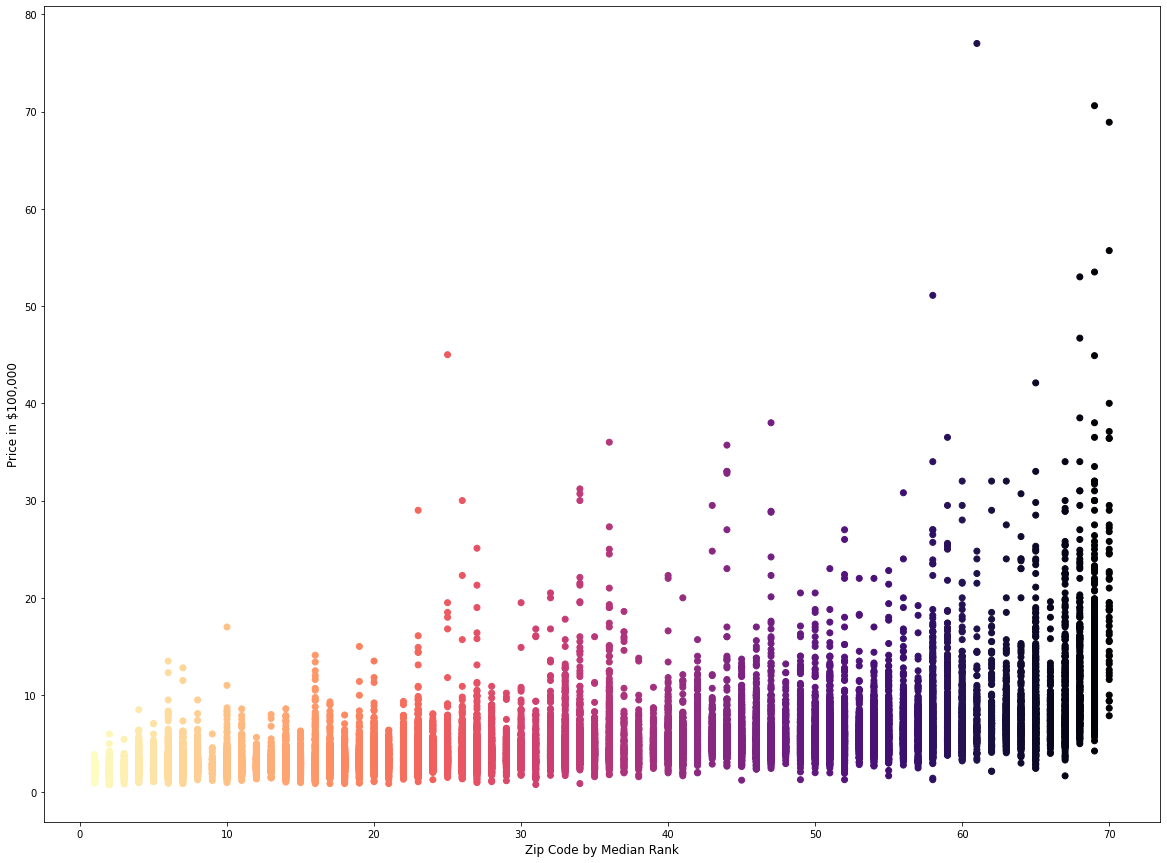

In [11]:
# visualize zip code as a color function

fig, ax = plt.subplots(figsize=(20, 15))

ax.scatter(df['zip_rank'], df['price'] /100000, c=df['zip_rank'], cmap='magma_r')

ax.set_xlabel('Zip Code by Median Rank', fontsize=12)
ax.set_ylabel('Price in $100,000', fontsize=12);

In [12]:
# A lot of our variables are not normally shaped, so we can't reliably remove outliers via standard deviation.
# We will use IQR to remove our outliers with the following function

def iqr_outliers(column):
    """return the lower range and upper range for the data based on IQR*1.75"""
    Q1,Q3 = np.percentile(column , [25,75])
    iqr = Q3 - Q1
    lower_range = Q1 - (1.5 * iqr)
    upper_range = Q3 + (1.5 * iqr)
    return lower_range,upper_range  

In [13]:
# determing our IQR for price, lot size, sq footage and longitude

#pricelower,priceupper = iqr_outliers(df.price)
lotlower,lotupper = iqr_outliers(df.sqft_lot)
sqftlower, sqftupper = iqr_outliers(df.sqft_living)
longlower, longupper = iqr_outliers(df.long)


# dropping the things outside of our lower and upper range

#df.drop(df[ (df.price > priceupper) | (df.price < pricelower) ].index , inplace=True)
df.drop(df[ (df.sqft_lot > lotupper) | (df.sqft_lot < lotlower) ].index , inplace=True)
df.drop(df[ (df.sqft_living > sqftupper) | (df.sqft_living < sqftlower) ].index , inplace=True)
df.drop(df[ (df.long > longupper) | (df.long < longlower) ].index , inplace=True)


In [14]:
def standard_dev(data):
    data_mean, data_std = mean(data), std(data)
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    return lower, upper

def percentile(column):
    lower_range,upper_range = np.percentile(column, [1, 99])
    return lower_range,upper_range 

# removing outlier prices based on std_dev on a per-zipcode

zipcodes = df['zipcode'].unique()

for i in zipcodes:
    #lower, upper = iqr_outliers(df[df['zipcode'] == i]['price'])
    lower, upper = percentile(df[df['zipcode'] == i]['price'])
    df.drop(df[ ( (df.price > upper) & (df['zipcode'] == i) ) | ( (df.price < lower)  & (df['zipcode'] == i) ) ].index , inplace=True)


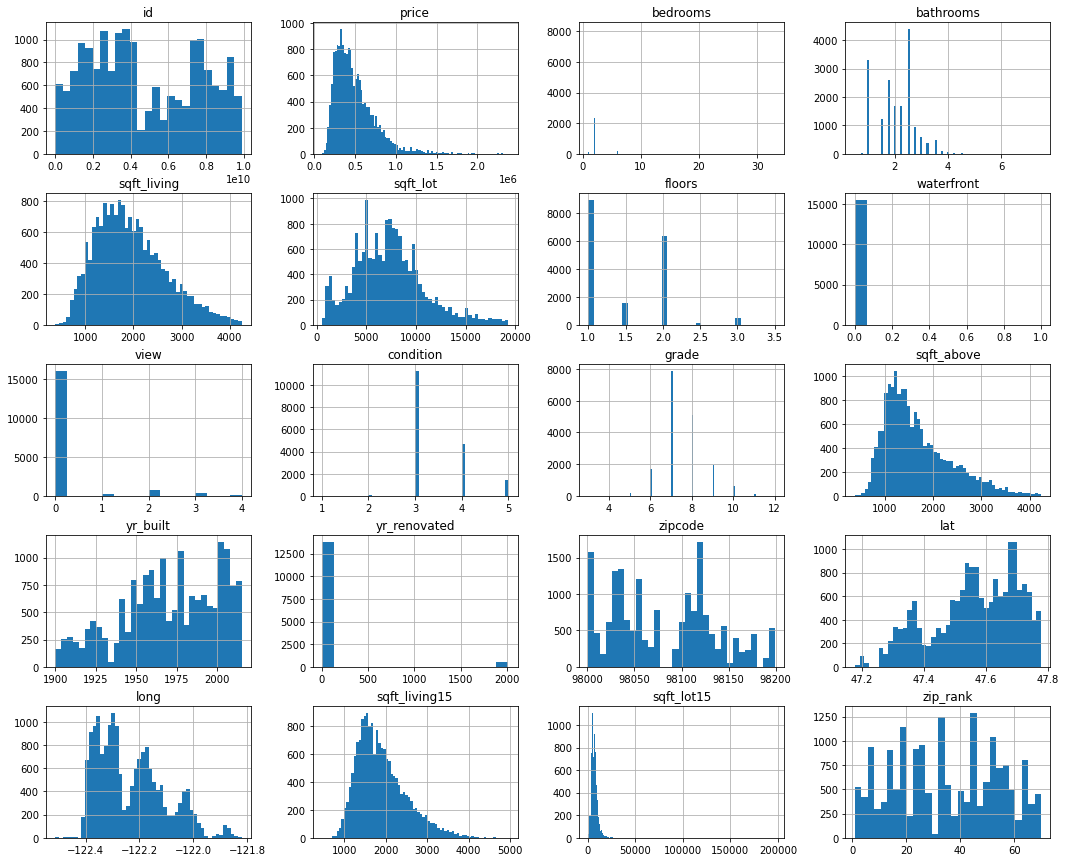

In [15]:
# checking our new histograms

df.hist(figsize=(18,15), bins='auto');

Our data is still largely not normally distributed, but using our IQR has gotten rid of some severely skewing outliers in the price, long and aqft_living categories and ESPECIALLY in the sqft_lot category.

In [16]:
# visualize our price stats by zip code and displaying top 30 zip codes by mean

find_zip_outliers = df.groupby('zipcode')['price'].describe()
find_zip_outliers.sort_values('mean', ascending=False).head(30)

# very suspicious values in many zip codes for min


count          mean            std       min        25%        50%  \
zipcode                                                                       
98039     25.0  1.554900e+06  419582.183050  865000.0  1230000.0  1560000.0   
98004    217.0  1.101869e+06  394074.687639  595000.0   787000.0   979000.0   
98040    214.0  1.026332e+06  330363.408905  550000.0   795000.0   943750.0   
98112    232.0  9.741120e+05  403277.220079  370000.0   675000.0   880000.0   
98109     98.0  8.276446e+05  314275.556996  410500.0   621250.0   730500.0   
98119    168.0  8.271723e+05  348654.471735  370000.0   605000.0   750000.0   
98105    202.0  7.924556e+05  319370.458638  417000.0   550000.0   670750.0   
98102     89.0  7.792168e+05  269261.796135  350000.0   584000.0   700000.0   
98075    247.0  7.617303e+05  164474.156226  432000.0   666500.0   745000.0   
98199    291.0  7.474668e+05  288080.859603  345000.0   535000.0   680000.0   
98006    384.0  7.374953e+05  244702.683457  320000.0   550000.0   714250.0   
98005    114.0  7.202354e+05  149026.418309  475000.0   603750.0   710000.0   
98033    363.0  7.148589e+05  267629.056927  335000.0   523500.0   649800.0   
98074    352.0  6.428557e+05  157669.895797  340000.0   530000.0   635000.0   
98122    273.0  6.252909e+05  252570.458528  295000.0   455000.0   574000.0   
98052    492.0  6.190530e+05  152732.739791  315000.0   500000.0   599975.0   
98115    538.0  6.102779e+05  196228.664592  290000.0   462750.0   570000.0   
98116    306.0  6.002888e+05  195610.685193  295000.0   460625.0   560000.0   
98007    122.0  5.897030e+05  150781.439006  360000.0   466250.0   550000.0   
98053    227.0  5.870848e+05  163917.172850  322000.0   447500.0   559000.0   
98103    533.0  5.841385e+05  187400.544277  269500.0   436110.0   560000.0   
98027    221.0  5.820979e+05  170784.244703  248000.0   450000.0   575000.0   
98029    280.0  5.820807e+05  131431.370951  310000.0   484999.5   568500.0   
98117    510.0  5.733981e+05  167008.572977  280000.0   457000.0   545000.0   
98177    207.0  5.708850e+05  216679.124982  293000.0   417500.0   510000.0   
98077     41.0  5.658756e+05  248696.751869  305000.0   325000.0   482000.0   
98107    235.0  5.644341e+05  122955.757364  371000.0   471500.0   535000.0   
98008    249.0  5.610857e+05  140980.738870  312500.0   465000.0   538000.0   
98144    304.0  5.485781e+05  250308.908437  245000.0   379975.0   450000.0   
98136    239.0  5.316955e+05  175757.025678  250000.0   400000.0   489950.0   

                75%        max  
zipcode                         
98039    1880000.00  2270000.0  
98004    1390000.00  2290000.0  
98040    1215000.00  2370000.0  
98112    1230000.00  2250000.0  
98109     933750.00  1710000.0  
98119     937750.00  2380000.0  
98105     973750.00  1690000.0  
98102     950000.00  1600000.0  
98075     850000.00  1520000.0  
98199     877500.00  1930000.0  
98006     864514.75  1650000.0  
98005     812250.00  1190000.0  
98033     834000.00  1600000.0  
98074     750000.00  1100000.0  
98122     710000.00  1730000.0  
98052     737250.00  1100000.0  
98115     709475.00  1390000.0  
98116     677950.00  1280000.0  
98007     680000.00  1050000.0  
98053     712500.00   988830.0  
98103     700000.00  1320000.0  
98027     689900.00  1030000.0  
98029     675187.50   998000.0  
98117     655750.00  1250000.0  
98177     662500.00  1470000.0  
98077     800000.00  1070000.0  
98107     630000.00   975000.0  
98008     620000.00  1160000.0  
98144     652625.00  1510000.0  
98136     630250.00  1070000.0

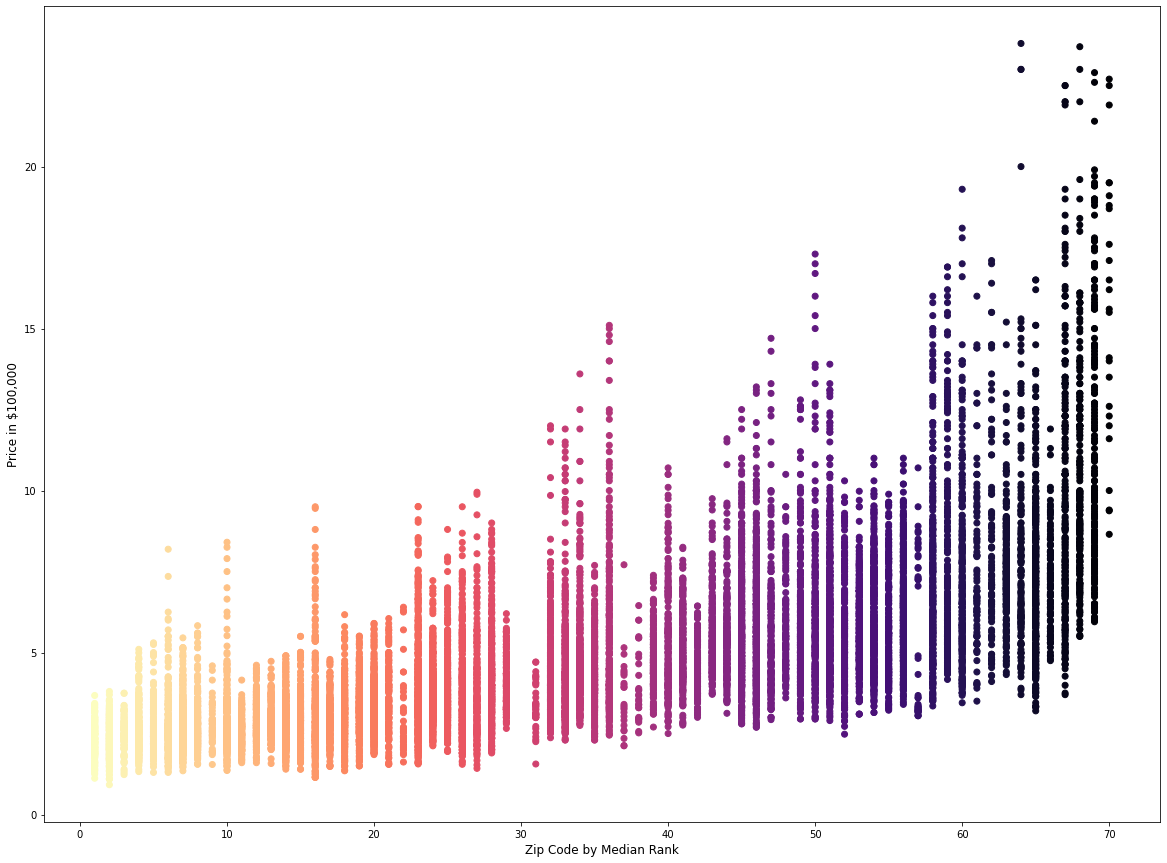

In [17]:
# visualize zip code as a color function

fig, ax = plt.subplots(figsize=(20, 15))

ax.scatter(df['zip_rank'], df['price'] /100000, c=df['zip_rank'], cmap='magma_r')

ax.set_xlabel('Zip Code by Median Rank', fontsize=12)
ax.set_ylabel('Price in $100,000', fontsize=12);

In [18]:
# looking again at our percentile outliers

df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  1.755200e+04  1.755200e+04  17552.000000  17552.000000  17552.000000   
mean   4.723923e+09  4.972276e+05      3.345943      2.053128   1951.444964   
std    2.863135e+09  2.585306e+05      0.907726      0.706475    729.032942   
min    1.000102e+06  9.200000e+04      1.000000      0.500000    380.000000   
25%    2.301401e+09  3.150000e+05      3.000000      1.500000   1400.000000   
50%    4.046651e+09  4.368760e+05      3.000000      2.000000   1840.000000   
75%    7.501000e+09  6.107012e+05      4.000000      2.500000   2400.000000   
max    9.900000e+09  2.380000e+06     33.000000      7.500000   4250.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  17552.000000  17552.000000  15606.000000  17499.000000  17552.000000   
mean    7354.801048      1.475017      0.001858      0.176810      3.423940   
std     3549.403269      0.537007      0.043069      0.648153      0.652501   
min      520.000000      1.000000      0.000000      0.000000      1.000000   
25%     4945.000000      1.000000      0.000000      0.000000      3.000000   
50%     7200.000000      1.000000      0.000000      0.000000      3.000000   
75%     9315.000000      2.000000      0.000000      0.000000      4.000000   
max    19290.000000      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above      yr_built  yr_renovated       zipcode  \
count  17552.000000  17552.000000  17552.000000  14395.000000  17552.000000   
mean       7.526607   1675.489688   1969.740770     77.807989  98081.285267   
std        1.007283    685.702882     29.880951    386.408422     54.289531   
min        3.000000    380.000000   1900.000000      0.000000  98001.000000   
25%        7.000000   1170.000000   1950.000000      0.000000  98033.000000   
50%        7.000000   1500.000000   1971.000000      0.000000  98074.000000   
75%        8.000000   2050.000000   1997.000000      0.000000  98118.000000   
max       12.000000   4240.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15     sqft_lot15      zip_rank  
count  17552.000000  17552.000000   17552.000000   17552.000000  17552.000000  
mean      47.562160   -122.232173    1898.008147    7343.862637     35.001766  
std        0.137368      0.124306     595.711993    4148.160913     19.201932  
min       47.177500   -122.512000     460.000000     659.000000      1.000000  
25%       47.478700   -122.336000    1460.000000    5000.000000     19.000000  
50%       47.574300   -122.266000    1780.000000    7220.000000     34.000000  
75%       47.679300   -122.154000    2230.000000    9000.000000     51.000000  
max       47.777600   -121.820000    4950.000000  196591.000000     70.000000

In [19]:
#check what is going on with the sqft_lot15 outliers by sorting descending

df.sort_values('sqft_lot15', ascending=False)

id        date     price  bedrooms  bathrooms  sqft_living  \
9436   3523029077   10/7/2014  297000.0         3       1.00         1340   
8112   1923039089   6/10/2014  285000.0         2       2.00         1651   
7086   8656800020   2/12/2015  309000.0         3       2.50         1450   
13153  1523069197    5/3/2014  379880.0         3       2.50         1650   
339    4268200055    5/1/2015  245000.0         3       1.75         1740   
...           ...         ...       ...       ...        ...          ...   
19711  8562780160   3/29/2015  334950.0         2       2.25         1240   
21520  8562780180   6/12/2014  336750.0         2       2.25         1170   
20891  8562780540  12/22/2014  325000.0         2       2.25         1150   
513    2827100070   11/5/2014  290000.0         4       1.00         1330   
20733  2827100075   7/27/2014  286308.0         2       1.50         1220   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
9436      18000     1.0         0.0   0.0          4      7        1340   
8112      18200     1.0         0.0   0.0          3      6        1651   
7086      11480     2.0         NaN   0.0          3      7        1450   
13153     14054     1.0         0.0   0.0          4      7        1130   
339       11547     1.0         0.0   0.0          3      7        1740   
...         ...     ...         ...   ...        ...    ...         ...   
19711       750     2.0         0.0   0.0          3      7        1150   
21520      1011     2.0         0.0   0.0          3      7        1170   
20891       711     2.0         0.0   0.0          3      7        1150   
513        8184     1.5         0.0   0.0          3      7        1330   
20733      1036     3.0         0.0   0.0          3      7        1220   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
9436            0.0      1924           NaN    98070  47.4443 -122.509   
8112            0.0      1946           0.0    98070  47.4621 -122.461   
7086            0.0      1990           0.0    98014  47.6720 -121.864   
13153         520.0      1986           0.0    98027  47.4821 -122.017   
339             0.0      1954           0.0    98178  47.4945 -122.220   
...             ...       ...           ...      ...      ...      ...   
19711          90.0      2008           0.0    98027  47.5322 -122.073   
21520           0.0      2009           0.0    98027  47.5321 -122.073   
20891           0.0      2013           NaN    98027  47.5323 -122.070   
513             0.0      1949           0.0    98133  47.7343 -122.347   
20733           0.0      2006           0.0    98133  47.7348 -122.347   

       sqft_living15  sqft_lot15  zip_rank  
9436            1660      196591        38  
8112            1510       89595        38  
7086            2080       87991        31  
13153           1940       87555        52  
339              880       78408        10  
...              ...         ...       ...  
19711           1240         750        52  
21520           1240         750        52  
20891           1150         748        52  
513             1220         660        24  
20733           1210         659        24  

[17552 rows x 22 columns]

In [20]:
# there is something off about these two large and nearly identical entries at the top of the list. We are going to drop these two rows.

df.drop(df[df['sqft_lot15'] == 196591].index, axis=0, inplace = True)

In [21]:
#check what is going on with the weird bedroom value by sorting descending

df.sort_values('bedrooms', ascending=False)

id        date     price  bedrooms  bathrooms  sqft_living  \
15856  2402100895   6/25/2014  640000.0        33       1.75         1620   
8748   1773100755   8/21/2014  520000.0        11       3.00         3000   
15147  5566100170  10/29/2014  650000.0        10       2.00         3610   
19239  8812401450  12/29/2014  660000.0        10       3.00         2920   
8537    424049043   8/11/2014  450000.0         9       7.50         4050   
...           ...         ...       ...       ...        ...          ...   
11270  1997200060    9/8/2014  270000.0         1       1.00          720   
4885   2848700585   4/24/2015  255000.0         1       1.00          810   
13830  8122100355   9/24/2014  550000.0         1       1.00         2880   
2928   3702900165   11/4/2014  295000.0         1       1.00          520   
3380   8807900236  12/19/2014  430000.0         1       1.00          630   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
15856      6000     1.0         0.0   0.0          5      7        1040   
8748       4960     2.0         0.0   0.0          3      7        2400   
15147     11914     2.0         0.0   0.0          4      7        3010   
19239      3745     2.0         0.0   0.0          4      7        1860   
8537       6504     2.0         0.0   0.0          3      7        4050   
...         ...     ...         ...   ...        ...    ...         ...   
11270      5196     1.0         0.0   0.0          3      7         720   
4885       5000     1.0         0.0   1.0          3      7         590   
13830      7560     1.0         0.0   0.0          3      7        1440   
2928       5600     1.0         NaN   0.0          3      6         520   
3380       1362     1.0         0.0   0.0          3      7         630   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
15856         580.0      1947           0.0    98103  47.6878 -122.331   
8748          600.0      1918        1999.0    98106  47.5560 -122.363   
15147         600.0      1958           0.0    98006  47.5705 -122.175   
19239        1060.0      1913           0.0    98105  47.6635 -122.320   
8537            0.0      1996           0.0    98144  47.5923 -122.301   
...             ...       ...           ...      ...      ...      ...   
11270           0.0      1911           0.0    98103  47.6928 -122.337   
4885          220.0      1936           0.0    98106  47.5696 -122.360   
13830        1440.0      1925        2014.0    98126  47.5370 -122.375   
2928            0.0      1918           0.0    98116  47.5579 -122.395   
3380            0.0      1943           0.0    98109  47.6342 -122.342   

       sqft_living15  sqft_lot15  zip_rank  
15856           1330        4700        46  
8748            1420        4960        18  
15147           2040       11914        65  
19239           1810        3745        59  
8537            1448        3866        36  
...              ...         ...       ...  
11270           1580        5762        46  
4885            1920        5000        18  
13830           1400        5040        28  
2928            1030        5265        49  
3380            1090        1376        62  

[17551 rows x 22 columns]

In [22]:
# this value of 33 in 1620 square feet is obviously a mistake. We're going to impute the mean into this field.

# 11 bedrooms in 3000sf, 10 bedrooms in 2920sf, 10 bedrooms in 3610sf are also obviously mistakes
# We're going to impute the mean into the fields for 10 and 11 bedrooms as well.

bedroom_mean = round(df['bedrooms'].mean(), 0)
bedroom_mean
df.loc[df['bedrooms'] == 33.0, 'bedrooms'] = bedroom_mean
df.loc[df['bedrooms'] == 11.0, 'bedrooms'] = bedroom_mean
df.loc[df['bedrooms'] == 10.0, 'bedrooms'] = bedroom_mean

df.sort_values('bedrooms', ascending=False)

# fixed our bedroom outliers by imputing the mean
# I remain suspicious of these 9-bedroom entries, but we'll decline from manipulating them further

id        date      price  bedrooms  bathrooms  sqft_living  \
8537    424049043   8/11/2014   450000.0         9        7.5         4050   
6073   9822700190    8/8/2014  1280000.0         9        4.5         3650   
4092   1997200215    5/7/2014   599999.0         9        4.5         3830   
4231   2902200015    1/6/2015   700000.0         9        3.0         3680   
18428  8823901445   3/13/2015   934000.0         9        3.0         2820   
...           ...         ...        ...       ...        ...          ...   
2685   3076500830  10/29/2014   385195.0         1        1.0          710   
18150  5075400035   6/27/2014   280000.0         1        1.0          690   
3870   1220000100    5/4/2015   215000.0         1        1.0          970   
18151  5141000571   8/25/2014   267000.0         1        1.0          800   
3380   8807900236  12/19/2014   430000.0         1        1.0          630   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
8537       6504     2.0         0.0   0.0          3      7        4050   
6073       5000     2.0         0.0   0.0          3      8        2530   
4092       6988     2.5         0.0   0.0          3      7        2450   
4231       4400     2.0         0.0   0.0          3      7        2830   
18428      4480     2.0         0.0   0.0          3      7        1880   
...         ...     ...         ...   ...        ...    ...         ...   
2685       6000     1.5         0.0   0.0          3      6         710   
18150      1950     1.0         0.0   0.0          3      6         690   
3870       7639     1.0         0.0   0.0          4      5         570   
18151      2480     1.0         0.0   0.0          4      6         800   
3380       1362     1.0         0.0   0.0          3      7         630   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
8537            0.0      1996           0.0    98144  47.5923 -122.301   
6073         1120.0      1915        2010.0    98105  47.6604 -122.289   
4092         1380.0      1938           0.0    98103  47.6927 -122.338   
4231          850.0      1908           0.0    98102  47.6374 -122.324   
18428         940.0      1918           0.0    98105  47.6654 -122.307   
...             ...       ...           ...      ...      ...      ...   
2685            0.0      2015           NaN    98144  47.5756 -122.316   
18150           0.0      1928           0.0    98117  47.6849 -122.374   
3870          400.0      1920           0.0    98166  47.4655 -122.346   
18151             ?      1919           0.0    98108  47.5581 -122.316   
3380            0.0      1943           0.0    98109  47.6342 -122.342   

       sqft_living15  sqft_lot15  zip_rank  
8537            1448        3866        36  
6073            2510        5000        59  
4092            1460        6291        46  
4231            1960        2450        61  
18428           2460        4400        59  
...              ...         ...       ...  
2685            1440        4800        36  
18150           1650        4864        45  
3870            1360        7380        27  
18151           1490        4650        21  
3380            1090        1376        62  

[17551 rows x 22 columns]

In [23]:
df

# confirming we still have a lot of data to work with - over 18k entries

id        date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014  221900.0         3       1.00         1180   
1      6414100192   12/9/2014  538000.0         3       2.25         2570   
3      2487200875   12/9/2014  604000.0         4       3.00         1960   
4      1954400510   2/18/2015  510000.0         3       2.00         1680   
6      1321400060   6/27/2014  257500.0         3       2.25         1715   
...           ...         ...       ...       ...        ...          ...   
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0          5650     1.0         NaN   0.0          3      7        1180   
1          7242     2.0         0.0   0.0          3      7        2170   
3          5000     1.0         0.0   0.0          5      7        1050   
4          8080     1.0         0.0   0.0          3      8        1680   
6          6819     2.0         0.0   0.0          3      7        1715   
...         ...     ...         ...   ...        ...    ...         ...   
21592      1131     3.0         0.0   0.0          3      8        1530   
21593      5813     2.0         0.0   0.0          3      8        2310   
21594      1350     2.0         0.0   0.0          3      7        1020   
21595      2388     2.0         NaN   0.0          3      8        1600   
21596      1076     2.0         0.0   0.0          3      7        1020   

      sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0               0.0      1955           0.0    98178  47.5112 -122.257   
1             400.0      1951        1991.0    98125  47.7210 -122.319   
3             910.0      1965           0.0    98136  47.5208 -122.393   
4               0.0      1987           0.0    98074  47.6168 -122.045   
6                 ?      1995           0.0    98003  47.3097 -122.327   
...             ...       ...           ...      ...      ...      ...   
21592           0.0      2009           0.0    98103  47.6993 -122.346   
21593           0.0      2014           0.0    98146  47.5107 -122.362   
21594           0.0      2009           0.0    98144  47.5944 -122.299   
21595           0.0      2004           0.0    98027  47.5345 -122.069   
21596           0.0      2008           0.0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  zip_rank  
0               1340        5650        10  
1               1690        7639        32  
3               1360        5000        40  
4               1800        7503        56  
6               2238        6819         8  
...              ...         ...       ...  
21592           1530        1509        46  
21593           1830        7200        16  
21594           1020        2007        36  
21595           1410        1287        52  
21596           1020        1357        36  

[17551 rows x 22 columns]

### Missing Data

In [24]:
# look for nulls

df.isna().sum()

# all of our null values are in columns that I want to be binary flags. So, will change all non-null values > 0 in those
# columns to 1, and all null values to 0.
# this will turn waterfront, view and renovated into dichotomous choice flags

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       1946
view               53
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3156
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
zip_rank            0
dtype: int64

In [25]:
# change all non-null values > 0 in those columns to 1

df.loc[df['waterfront'] > 0, 'waterfront'] = 1
df.loc[df['view'] > 0, 'view'] = 1
df.loc[df['yr_renovated'] > 0, 'yr_renovated'] = 1

# now anything that is not a 1 becomes a 0

df.loc[df['waterfront']!= 1, 'waterfront'] = 0
df.loc[df['view'] != 1, 'view'] = 0
df.loc[df['yr_renovated'] != 1, 'yr_renovated'] = 0

# since we're making it a binary flag, we'll rename yr_renovated to renovated
df = df.rename(columns={'yr_renovated' : 'renovated'})

In [26]:
# we've removed the null values from our three binary columns

df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
renovated        0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
zip_rank         0
dtype: int64

In [27]:
# check data types

df.dtypes

# date and sqft_basement need to be fixed. This explains why the basement variable didn't show
# up in our histogram

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
renovated        float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
zip_rank           int64
dtype: object

In [28]:
#Checking all top occuring for each column to find weird entries

for col in df.columns:
    print(col, '\n', df[col].value_counts(normalize=True).head(), '\n\n')

id 
 1777500160    0.000057
4443800810    0.000057
8091411100    0.000057
6071600370    0.000057
1231001130    0.000057
Name: id, dtype: float64 


date 
 6/23/2014    0.006780
4/14/2015    0.006210
6/25/2014    0.006153
4/28/2015    0.006040
6/26/2014    0.005983
Name: date, dtype: float64 


price 
 450000.0    0.008205
350000.0    0.007977
425000.0    0.007407
550000.0    0.007350
325000.0    0.007350
Name: price, dtype: float64 


bedrooms 
 3    0.465216
4    0.315595
2    0.132015
5    0.067005
6    0.010484
Name: bedrooms, dtype: float64 


bathrooms 
 2.50    0.250869
1.00    0.187283
1.75    0.147912
2.25    0.096234
2.00    0.095607
Name: bathrooms, dtype: float64 


sqft_living 
 1440    0.006894
1400    0.006837
1300    0.006780
1660    0.006780
1720    0.006381
Name: sqft_living, dtype: float64 


sqft_lot 
 5000    0.018859
6000    0.015156
4000    0.013447
7200    0.011851
4800    0.006324
Name: sqft_lot, dtype: float64 


floors 
 1.0    0.511367
2.0    0.364538
1.5    

In [29]:
# basement has a weird entry of '?' which we will convert to a 0, and then
# converting our sqft_basement to a float,
# and our date to a proper date

df.loc[df['sqft_basement'] == '?', 'sqft_basement'] = 0
df['sqft_basement'] = df['sqft_basement'].astype(float)




In [30]:
# data types are now fixed

df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement    float64
yr_built           int64
renovated        float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
zip_rank           int64
dtype: object

In [31]:
# now that its data type is correct, we see that most properties don't have basements. Because of this,
# we will add basement to our binary flag group, and just list if it has a basement or not.

df.loc[df['sqft_basement'] > 0, 'sqft_basement'] = 1
df.loc[df['sqft_basement'] != 1, 'sqft_basement'] = 0

# we'll also change the name of our column to basement
df = df.rename(columns={'sqft_basement' : 'basement'})

### Non-target feature engineering/scaling

In [32]:
# We're trying out engineering a feature that penalizes or rewards being the smallest or biggest
# property in the neighborhood, as generally you don't want to be either. This is attempting 
# to impose a categorical relationship on how the property relates to its neighbors

df['comparative_sf'] = 0
df.loc[df['sqft_living'] <= (df['sqft_living15']*.75), 'comparative_sf'] = '1'
df.loc[(df['sqft_living'] > (df['sqft_living15']*.75)) & (df['sqft_living'] < (df['sqft_living15']*1.25)), 'comparative_sf'] = '2'
df.loc[df['sqft_living'] >= (df['sqft_living15']*1.25), 'comparative_sf'] = '3'

In [33]:
df['age'] = 2016-df['yr_built']

In [34]:
# we're now going to extract just the month from our datetime, and store that in a new column
# we won't be using our entire date - we're interested in the month that houses are sold
df['month_sold'] = pd.DatetimeIndex(df['date']).month

In [35]:
df

id        date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520  10/13/2014  221900.0         3       1.00         1180   
1      6414100192   12/9/2014  538000.0         3       2.25         2570   
3      2487200875   12/9/2014  604000.0         4       3.00         1960   
4      1954400510   2/18/2015  510000.0         3       2.00         1680   
6      1321400060   6/27/2014  257500.0         3       2.25         1715   
...           ...         ...       ...       ...        ...          ...   
21592   263000018   5/21/2014  360000.0         3       2.50         1530   
21593  6600060120   2/23/2015  400000.0         4       2.50         2310   
21594  1523300141   6/23/2014  402101.0         2       0.75         1020   
21595   291310100   1/16/2015  400000.0         3       2.50         1600   
21596  1523300157  10/15/2014  325000.0         2       0.75         1020   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0          5650     1.0         0.0   0.0          3      7        1180   
1          7242     2.0         0.0   0.0          3      7        2170   
3          5000     1.0         0.0   0.0          5      7        1050   
4          8080     1.0         0.0   0.0          3      8        1680   
6          6819     2.0         0.0   0.0          3      7        1715   
...         ...     ...         ...   ...        ...    ...         ...   
21592      1131     3.0         0.0   0.0          3      8        1530   
21593      5813     2.0         0.0   0.0          3      8        2310   
21594      1350     2.0         0.0   0.0          3      7        1020   
21595      2388     2.0         0.0   0.0          3      8        1600   
21596      1076     2.0         0.0   0.0          3      7        1020   

       basement  yr_built  renovated  zipcode      lat     long  \
0           0.0      1955        0.0    98178  47.5112 -122.257   
1           1.0      1951        1.0    98125  47.7210 -122.319   
3           1.0      1965        0.0    98136  47.5208 -122.393   
4           0.0      1987        0.0    98074  47.6168 -122.045   
6           0.0      1995        0.0    98003  47.3097 -122.327   
...         ...       ...        ...      ...      ...      ...   
21592       0.0      2009        0.0    98103  47.6993 -122.346   
21593       0.0      2014        0.0    98146  47.5107 -122.362   
21594       0.0      2009        0.0    98144  47.5944 -122.299   
21595       0.0      2004        0.0    98027  47.5345 -122.069   
21596       0.0      2008        0.0    98144  47.5941 -122.299   

       sqft_living15  sqft_lot15  zip_rank comparative_sf  age  month_sold  
0               1340        5650        10              2   61          10  
1               1690        7639        32              3   65          12  
3               1360        5000        40              3   51          12  
4               1800        7503        56              2   29           2  
6               2238        6819         8              2   21           6  
...              ...         ...       ...            ...  ...         ...  
21592           1530        1509        46              2    7           5  
21593           1830        7200        16              3    2           2  
21594           1020        2007        36              2    7           6  
21595           1410        1287        52              2   12           1  
21596           1020        1357        36              2    8          10  

[17551 rows x 25 columns]

### Scale target to consistent time scale

Our last action is to bring all of our home sale prices to the same time scale. It's easy to ignore that these homes were sold over the space of a year, but a year is a long time for real estate. King County median prices increased 9.05% from May 2014 to May 2015, and we need to account for this kind of change in our model. We'll do this by appreciating all sale prices into May 2015 using an appreciation rate over the year of 9.05%, and dividing into months (more granularity is possible of course)

In [36]:
df['date'] = pd.to_datetime(df['date'])

In [37]:
df.loc[(df['date']>'2014-05-01') & (df['date']<'2014-06-01'), 'time_series'] = 12
df.loc[(df['date']>='2014-06-01') & (df['date']<'2014-07-01'), 'time_series'] = 11
df.loc[(df['date']>='2014-07-01') & (df['date']<'2014-08-01'), 'time_series'] = 10
df.loc[(df['date']>='2014-08-01') & (df['date']<'2014-09-01'), 'time_series'] = 9
df.loc[(df['date']>='2014-09-01') & (df['date']<'2014-10-01'), 'time_series'] = 8
df.loc[(df['date']>='2014-10-01') & (df['date']<'2014-11-01'), 'time_series'] = 7
df.loc[(df['date']>='2014-11-01') & (df['date']<'2014-12-01'), 'time_series'] = 6
df.loc[(df['date']>='2014-12-01') & (df['date']<'2015-01-01'), 'time_series'] = 5
df.loc[(df['date']>='2015-01-01') & (df['date']<'2015-02-01'), 'time_series'] = 4
df.loc[(df['date']>='2015-02-01') & (df['date']<'2015-03-01'), 'time_series'] = 3
df.loc[(df['date']>='2015-03-01') & (df['date']<'2015-04-01'), 'time_series'] = 2
df.loc[(df['date']>='2015-04-01') & (df['date']<'2015-05-01'), 'time_series'] = 1
df.loc[(df['date']>='2015-05-01') & (df['date']<'2015-06-01'), 'time_series'] = 0

# adjusting up our sale prices to account for appreciation
monthly_appreciation = .0905/12
df['adj_price'] = round(df['price']*(1+((monthly_appreciation/12)*df['time_series'])), 0)

In [38]:
df.drop('price', axis=1, inplace=True)

# we're renaming our adjusted price column to be price
df.rename(columns={"adj_price": "price"}, inplace=True)
df

id       date  bedrooms  bathrooms  sqft_living  sqft_lot  \
0      7129300520 2014-10-13         3       1.00         1180      5650   
1      6414100192 2014-12-09         3       2.25         2570      7242   
3      2487200875 2014-12-09         4       3.00         1960      5000   
4      1954400510 2015-02-18         3       2.00         1680      8080   
6      1321400060 2014-06-27         3       2.25         1715      6819   
...           ...        ...       ...        ...          ...       ...   
21592   263000018 2014-05-21         3       2.50         1530      1131   
21593  6600060120 2015-02-23         4       2.50         2310      5813   
21594  1523300141 2014-06-23         2       0.75         1020      1350   
21595   291310100 2015-01-16         3       2.50         1600      2388   
21596  1523300157 2014-10-15         2       0.75         1020      1076   

       floors  waterfront  view  condition  grade  sqft_above  basement  \
0         1.0         0.0   0.0          3      7        1180       0.0   
1         2.0         0.0   0.0          3      7        2170       1.0   
3         1.0         0.0   0.0          5      7        1050       1.0   
4         1.0         0.0   0.0          3      8        1680       0.0   
6         2.0         0.0   0.0          3      7        1715       0.0   
...       ...         ...   ...        ...    ...         ...       ...   
21592     3.0         0.0   0.0          3      8        1530       0.0   
21593     2.0         0.0   0.0          3      8        2310       0.0   
21594     2.0         0.0   0.0          3      7        1020       0.0   
21595     2.0         0.0   0.0          3      8        1600       0.0   
21596     2.0         0.0   0.0          3      7        1020       0.0   

       yr_built  renovated  zipcode      lat     long  sqft_living15  \
0          1955        0.0    98178  47.5112 -122.257           1340   
1          1951        1.0    98125  47.7210 -122.319           1690   
3          1965        0.0    98136  47.5208 -122.393           1360   
4          1987        0.0    98074  47.6168 -122.045           1800   
6          1995        0.0    98003  47.3097 -122.327           2238   
...         ...        ...      ...      ...      ...            ...   
21592      2009        0.0    98103  47.6993 -122.346           1530   
21593      2014        0.0    98146  47.5107 -122.362           1830   
21594      2009        0.0    98144  47.5944 -122.299           1020   
21595      2004        0.0    98027  47.5345 -122.069           1410   
21596      2008        0.0    98144  47.5941 -122.299           1020   

       sqft_lot15  zip_rank comparative_sf  age  month_sold  time_series  \
0            5650        10              2   61          10          7.0   
1            7639        32              3   65          12          5.0   
3            5000        40              3   51          12          5.0   
4            7503        56              2   29           2          3.0   
6            6819         8              2   21           6         11.0   
...           ...       ...            ...  ...         ...          ...   
21592        1509        46              2    7           5         12.0   
21593        7200        16              3    2           2          3.0   
21594        2007        36              2    7           6         11.0   
21595        1287        52              2   12           1          4.0   
21596        1357        36              2    8          10          7.0   

          price  
0      222876.0  
1      539691.0  
3      605898.0  
4      510962.0  
6      259280.0  
...         ...  
21592  362715.0  
21593  400754.0  
21594  404881.0  
21595  401006.0  
21596  326430.0  

[17551 rows x 26 columns]

### Target Variable

Check out our target variable

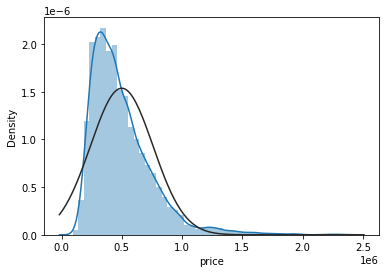

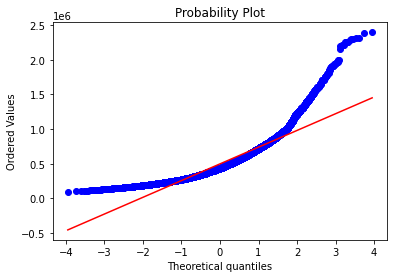

In [39]:
#histogram and normal probability plot
sns.distplot(df['price'], fit=norm);
fig = plt.figure()

res = stats.probplot(df['price'], plot=plt)

# our sales price histogram is positively skewed and has a high peak
# Our QQ-plot shows that we have heavy tails with right skew

In [40]:
#skewness and kurtosis
print("Skewness: %f" % df['price'].skew())
print("Kurtosis: %f" % df['price'].kurt())

# price is moderately skewed right, almost highly skewed
# some positive kurtosis, indicating more in the tails. We can see those tails in the right skew.

Skewness: 1.830447
Kurtosis: 5.543329


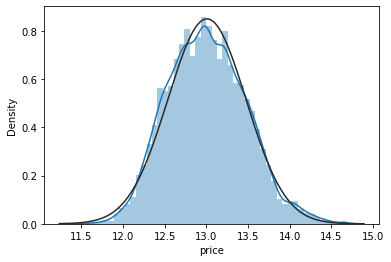

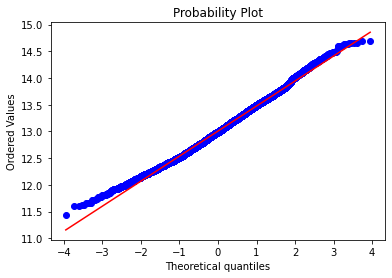

In [41]:
# log transform our target price to improve normality of distribution
df_target_log = np.log(df['price'])

#histogram and normal probability plot
sns.distplot(df_target_log, fit=norm);
fig = plt.figure()
res = stats.probplot(df_target_log, plot=plt)

# Our target price is more normally distributed now
# transforming it gives more of a left skew

Our target will benefit from a log transformation before we produce the model.

### Separate Continuous and Categorical

In [42]:
# prepare our categories for data transformation by separating into our data types -
# our target dependent variable, categorical variables, and continuous/ordinal variables

target=['price']
categoricals = ['waterfront', 'renovated', 'basement', 'comparative_sf']
continuous = ['sqft_living', 'sqft_lot', 'floors', 'bedrooms', 'bathrooms', 'condition', 'grade', 'zipcode', 'age', 'month_sold', 'lat', 'sqft_above', 'sqft_living15', 'sqft_lot15']

## Process Categoricals

In [43]:
df_categoricals = df[categoricals]

In [44]:
# check out our categoricals

df_categoricals

waterfront  renovated  basement comparative_sf
0             0.0        0.0       0.0              2
1             0.0        1.0       1.0              3
3             0.0        0.0       1.0              3
4             0.0        0.0       0.0              2
6             0.0        0.0       0.0              2
...           ...        ...       ...            ...
21592         0.0        0.0       0.0              2
21593         0.0        0.0       0.0              3
21594         0.0        0.0       0.0              2
21595         0.0        0.0       0.0              2
21596         0.0        0.0       0.0              2

[17551 rows x 4 columns]

In [45]:
# identifying our categorical columns to one-hot encode
categorical = ['waterfront', 'renovated', 'basement', 'comparative_sf']

# prepare a new dataframe that has the correct categorical columns (we aren't dropping from our df_categoricals dataframe,
# because we will be using that later still)
df_categorical_preprocess = df_categoricals[categorical]

# telling Pandas that these columns are categoricals
for item in categorical:
    df_categorical_preprocess[item] = df_categorical_preprocess[item].astype('category')

# adding price to our dataframe so that we can do some visualizations    
df_categorical_preprocess['price'] = df['price']

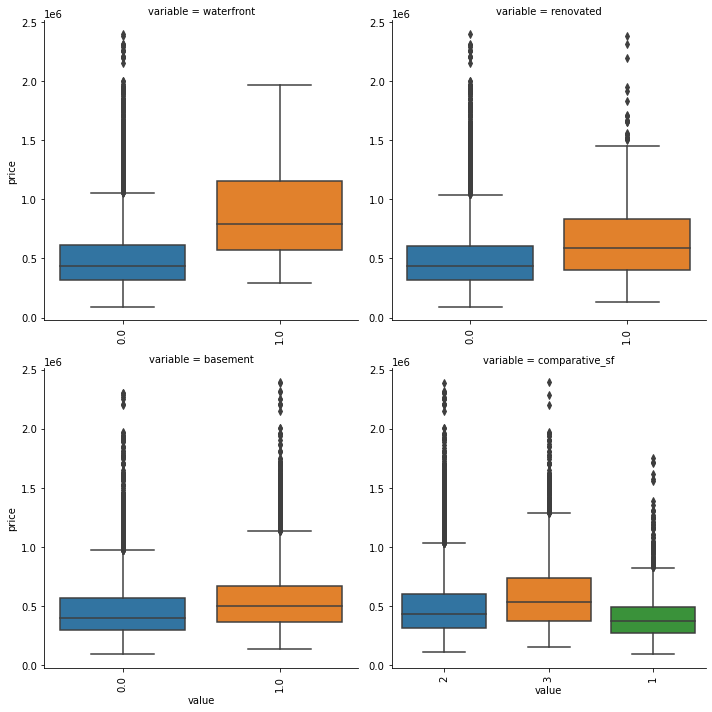

In [46]:
def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)
    
f = pd.melt(df_categorical_preprocess, id_vars=['price'], value_vars=categorical)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "price")

In [47]:
# make a processed bins file for use with linear regression
df_categoricals_processed = pd.get_dummies(df_categorical_preprocess[categorical], prefix=categorical, drop_first=True)

In [48]:
df_categoricals_processed

waterfront_1.0  renovated_1.0  basement_1.0  comparative_sf_2  \
0                   0              0             0                 1   
1                   0              1             1                 0   
3                   0              0             1                 0   
4                   0              0             0                 1   
6                   0              0             0                 1   
...               ...            ...           ...               ...   
21592               0              0             0                 1   
21593               0              0             0                 0   
21594               0              0             0                 1   
21595               0              0             0                 1   
21596               0              0             0                 1   

       comparative_sf_3  
0                     0  
1                     1  
3                     1  
4                     0  
6                     0  
...                 ...  
21592                 0  
21593                 1  
21594                 0  
21595                 0  
21596                 0  

[17551 rows x 5 columns]

## Engineering New Features

At this point we're going to engineer new features from our data. Some of our target encoding uses the target to inform our features, so we have to stop and pull a holdout from our data RIGHT NOW so that we aren't leaking our test data into our train data.

zipcode, month, lat, age

### Setting aside our holdout data

In [49]:
# set our random seed for the notebook. We could randomize this each time the notebook is run, or whatevever,
# but ultimately we want all of our train/test splits to use the same data
randomstate = 24

In [50]:
# prepare our holdout sets. We're making two separate predictor frames because the continuous variables 
# require processing after we pull this apart, so we're keeping them separate from the categoricals for now.

x_continuous = df[continuous]
x_categorical = df_categoricals_processed
y = np.log(df[target])

In [51]:
# creating our train/validation sets and our test sets

x_train_cont, x_test_cont, y_train, y_test = train_test_split(x_continuous, y, test_size=0.2, random_state=randomstate)
x_train_cat, x_test_cat, y_train, y_test = train_test_split(x_categorical, y, test_size=0.2, random_state=randomstate)

In [52]:
x_train_cont.reset_index(inplace=True)
x_train_cont.drop('index', axis=1, inplace=True)

x_test_cont.reset_index(inplace=True)
x_test_cont.drop('index', axis=1, inplace=True)

x_train_cat.reset_index(inplace=True)
x_train_cat.drop('index', axis=1, inplace=True)

x_test_cat.reset_index(inplace=True)
x_test_cat.drop('index', axis=1, inplace=True)

y_train.reset_index(inplace=True)
y_train.drop('index', axis=1, inplace=True)

y_test.reset_index(inplace=True)
y_test.drop('index', axis=1, inplace=True)

### Engineering New Features on our Training Data

We need to remember to use our x_train_cont and x_train_cat data frames now when we are working with the newly engineered features.

In [53]:
x_train_cont['price'] = np.exp(y_train)

In [54]:
# Make a new target encoded feature that imputes the mean house price per zip code
x_train_cont['zip_mean'] = x_train_cont['zipcode'].apply(lambda x: round(x_train_cont.loc[x_train_cont['zipcode']==x]['price'].mean(), 4))

#### TO DO SAVE OBJECT

In [55]:
# Save target encoded features mapping scheme

zipcodes = []
values = []

for item in x_train_cont['zipcode'].unique():
    zipcodes.append(item)
    values.append(round(x_train_cont.loc[x_train_cont['zipcode']==item]['price'].mean(), 4))

zip_mean_mapper = dict(zip(zipcodes, values))

In [56]:
# Make a new target encoded feature that imputes the mean house price per age
x_train_cont['age_mean'] = x_train_cont['age'].apply(lambda x: round(x_train_cont.loc[x_train_cont['age']==x]['price'].mean(), 4))

In [57]:
# Save target encoded features mapping scheme

ages = []
values = []

for item in x_train_cont['age'].unique():
    ages.append(item)
    values.append(round(x_train_cont.loc[x_train_cont['age']==item]['price'].mean(), 4))

age_mapper = dict(zip(ages, values))

In [58]:
# Make a new target encoded feature that imputes the mean house price per month sold
x_train_cont['month_mean'] = x_train_cont['month_sold'].apply(lambda x: round(x_train_cont.loc[x_train_cont['month_sold']==x]['price'].median(), 4))

In [59]:
# Save target encoded features mapping scheme

months = []
values = []

for item in x_train_cont['month_sold'].unique():
    months.append(item)
    values.append(round(x_train_cont.loc[x_train_cont['month_sold']==item]['price'].median(), 4))

month_mapper = dict(zip(months, values))

In [60]:
x_train_cont['lat']= x_train_cont['lat'].apply(lambda x: round(x, 2))
# Make a new target encoded feature that imputes the mean house price per latitude
x_train_cont['lat_mean'] = x_train_cont['lat'].apply(lambda x: round(x_train_cont.loc[x_train_cont['lat']==x]['price'].median(), 4))

In [61]:
# Save target encoded features mapping scheme

lats = []
values = []

for item in x_train_cont['lat'].unique():
    lats.append(item)
    values.append(round(x_train_cont.loc[x_train_cont['lat']==item]['price'].median(), 4))

lat_mapper = dict(zip(lats, values))

In [62]:
x_train_cont.drop(['zipcode', 'month_sold', 'lat', 'age'], axis=1, inplace=True)

In [63]:
x_train_cont

sqft_living  sqft_lot  floors  bedrooms  bathrooms  condition  grade  \
0             3560      4000     3.0         4       3.00          3      9   
1             1240      1101     2.0         2       1.50          3      8   
2             1940      8347     2.0         3       2.50          3      8   
3             2060      4730     2.0         3       2.50          4      8   
4             1578      7340     2.0         3       2.50          3      7   
...            ...       ...     ...       ...        ...        ...    ...   
14035         2770      9350     2.0         3       2.50          3      8   
14036         1790      9927     1.0         3       2.25          4      7   
14037         1320      3420     1.0         2       1.75          3      7   
14038         1020      8437     1.0         3       1.00          5      6   
14039         2500      8725     1.0         4       1.75          4      8   

       sqft_above  sqft_living15  sqft_lot15      price      zip_mean  \
0            2970           1190        4000  1055939.0  9.928381e+05   
1            1080           1530        1209   404520.0  5.341760e+05   
2            1940           1940        7131   325425.0  2.883838e+05   
3            2060           1980        5010   625343.0  7.198068e+05   
4            1578           1850        7200   261584.0  2.927516e+05   
...           ...            ...         ...        ...           ...   
14035        2770           2660        9695   682841.0  4.005904e+05   
14036        1240           2610       10700   650409.0  7.648954e+05   
14037        1080           2070        6000   477090.0  7.525526e+05   
14038        1020           1420        8500   225424.0  2.563655e+05   
14039        1500           1900        8998   966407.0  1.106178e+06   

          age_mean  month_mean  lat_mean  
0      521986.9375    429415.0  686507.0  
1      476672.3642    420580.0  659940.0  
2      491066.1957    441936.0  281232.0  
3      440282.6125    455286.0  546014.0  
4      501227.6636    445784.0  291094.0  
...            ...         ...       ...  
14035  451298.7368    429415.0  411974.5  
14036  376300.4421    455286.0  659940.0  
14037  444077.8919    441936.0  625459.0  
14038  469032.7667    408769.0  246078.0  
14039  440682.2096    455286.0  686507.0  

[14040 rows x 15 columns]

## Process Continuous

### Look for Collinearity

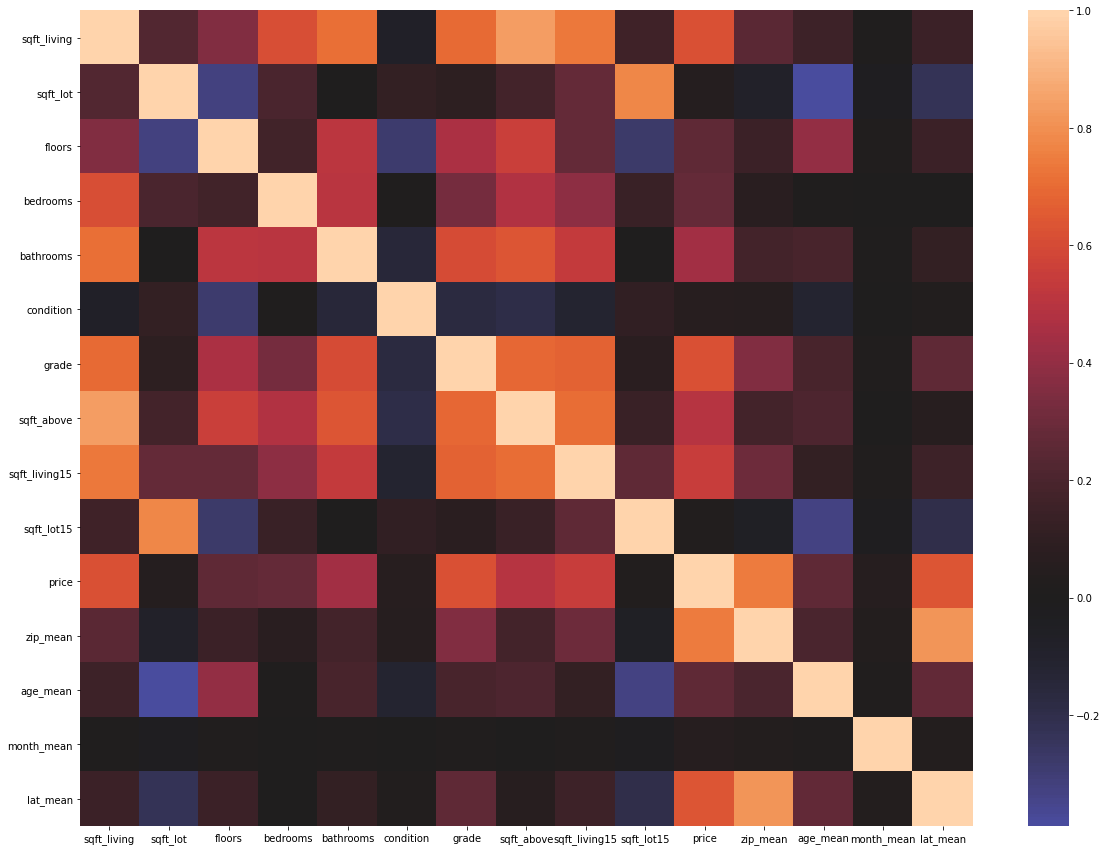

In [64]:
# look for multicollinearity of features
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(x_train_cont.corr(), center=0);

plt.show()

In [65]:
x_train_cont.corr()

sqft_living  sqft_lot    floors  bedrooms  bathrooms  \
sqft_living       1.000000  0.226210  0.356826  0.612103   0.717632   
sqft_lot          0.226210  1.000000 -0.322500  0.198231  -0.000867   
floors            0.356826 -0.322500  1.000000  0.164723   0.513341   
bedrooms          0.612103  0.198231  0.164723  1.000000   0.501264   
bathrooms         0.717632 -0.000867  0.513341  0.501264   1.000000   
condition        -0.071811  0.115073 -0.280996  0.009052  -0.144035   
grade             0.698535  0.088823  0.467099  0.321857   0.606510   
sqft_above        0.837959  0.180096  0.558538  0.481818   0.633401   
sqft_living15     0.737959  0.279752  0.280514  0.383817   0.533538   
sqft_lot15        0.164451  0.774534 -0.270863  0.137654  -0.008865   
price             0.615323  0.042412  0.259209  0.281854   0.439006   
zip_mean          0.249563 -0.079653  0.144240  0.070283   0.179826   
age_mean          0.158119 -0.388923  0.402753  0.010506   0.192319   
month_mean        0.009496 -0.026741  0.019737 -0.000716   0.008124   
lat_mean          0.145021 -0.229207  0.146717  0.003693   0.111492   

               condition     grade  sqft_above  sqft_living15  sqft_lot15  \
sqft_living    -0.071811  0.698535    0.837959       0.737959    0.164451   
sqft_lot        0.115073  0.088823    0.180096       0.279752    0.774534   
floors         -0.280996  0.467099    0.558538       0.280514   -0.270863   
bedrooms        0.009052  0.321857    0.481818       0.383817    0.137654   
bathrooms      -0.144035  0.606510    0.633401       0.533538   -0.008865   
condition       1.000000 -0.165908   -0.190048      -0.108726    0.107553   
grade          -0.165908  1.000000    0.695805       0.670983    0.075749   
sqft_above     -0.190048  0.695805    1.000000       0.705618    0.137100   
sqft_living15  -0.108726  0.670983    0.705618       1.000000    0.257563   
sqft_lot15      0.107553  0.075749    0.137100       0.257563    1.000000   
price           0.059814  0.625614    0.500224       0.552367    0.027354   
zip_mean        0.054027  0.357044    0.177519       0.300879   -0.057514   
age_mean       -0.107677  0.195147    0.211493       0.110955   -0.330225   
month_mean      0.001277  0.021975    0.006360       0.018802   -0.015872   
lat_mean        0.032034  0.265623    0.058993       0.149042   -0.198533   

                  price  zip_mean  age_mean  month_mean  lat_mean  
sqft_living    0.615323  0.249563  0.158119    0.009496  0.145021  
sqft_lot       0.042412 -0.079653 -0.388923   -0.026741 -0.229207  
floors         0.259209  0.144240  0.402753    0.019737  0.146717  
bedrooms       0.281854  0.070283  0.010506   -0.000716  0.003693  
bathrooms      0.439006  0.179826  0.192319    0.008124  0.111492  
condition      0.059814  0.054027 -0.107677    0.001277  0.032034  
grade          0.625614  0.357044  0.195147    0.021975  0.265623  
sqft_above     0.500224  0.177519  0.211493    0.006360  0.058993  
sqft_living15  0.552367  0.300879  0.110955    0.018802  0.149042  
sqft_lot15     0.027354 -0.057514 -0.330225   -0.015872 -0.198533  
price          1.000000  0.743669  0.261186    0.054806  0.632958  
zip_mean       0.743669  1.000000  0.197299    0.039675  0.811278  
age_mean       0.261186  0.197299  1.000000    0.023034  0.268051  
month_mean     0.054806  0.039675  0.023034    1.000000  0.039623  
lat_mean       0.632958  0.811278  0.268051    0.039623  1.000000

We can see from this matrix that price has the strongest relationship with zip_rank, grade and sqft_living 

In [66]:
#Get our list of highly correlated feature pairs with following steps:

# save correlation matrix as a new data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking
df_correlations = x_train_cont.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns in a new column named "pairs"
df_correlations['pairs'] = list(zip(df_correlations.level_0, df_correlations.level_1))

# set index to pairs
df_correlations.set_index(['pairs'], inplace = True)

# rename our results column to correlation
df_correlations.rename(columns={0: "correlation"}, inplace=True)

# Drop 1:1 correlations to get rid of self pairs
df_correlations.drop(df_correlations[df_correlations['correlation'] == 1.000000].index, inplace=True)

# view pairs above 75% correlation
df_correlations[df_correlations.correlation>.70]


level_0        level_1  correlation
pairs                                                                  
(sqft_living, sqft_above)       sqft_living     sqft_above     0.837959
(sqft_above, sqft_living)        sqft_above    sqft_living     0.837959
(lat_mean, zip_mean)               lat_mean       zip_mean     0.811278
(zip_mean, lat_mean)               zip_mean       lat_mean     0.811278
(sqft_lot15, sqft_lot)           sqft_lot15       sqft_lot     0.774534
(sqft_lot, sqft_lot15)             sqft_lot     sqft_lot15     0.774534
(price, zip_mean)                     price       zip_mean     0.743669
(zip_mean, price)                  zip_mean          price     0.743669
(sqft_living15, sqft_living)  sqft_living15    sqft_living     0.737959
(sqft_living, sqft_living15)    sqft_living  sqft_living15     0.737959
(bathrooms, sqft_living)          bathrooms    sqft_living     0.717632
(sqft_living, bathrooms)        sqft_living      bathrooms     0.717632
(sqft_living15, sqft_above)   sqft_living15     sqft_above     0.705618
(sqft_above, sqft_living15)      sqft_above  sqft_living15     0.705618

we're going to drop sqft_above and sqft_lot15 and just keep the base sqft_living and sqft_lot. We're also going to drop sqft_living15 which fell JUST under the threshold of collinearity, based on the fact that a realtor does not easily have that information available to use in our predictive model. 

We tried to engineer a feature with lat_mean, but it does the same thing as zip_mean with less specificity. So we won't use it after all.


In [67]:
x_train_cont.drop(['sqft_above', 'lat_mean', 'sqft_lot15', 'sqft_living15'], axis=1, inplace=True)

In [68]:
x_train_cont

sqft_living  sqft_lot  floors  bedrooms  bathrooms  condition  grade  \
0             3560      4000     3.0         4       3.00          3      9   
1             1240      1101     2.0         2       1.50          3      8   
2             1940      8347     2.0         3       2.50          3      8   
3             2060      4730     2.0         3       2.50          4      8   
4             1578      7340     2.0         3       2.50          3      7   
...            ...       ...     ...       ...        ...        ...    ...   
14035         2770      9350     2.0         3       2.50          3      8   
14036         1790      9927     1.0         3       2.25          4      7   
14037         1320      3420     1.0         2       1.75          3      7   
14038         1020      8437     1.0         3       1.00          5      6   
14039         2500      8725     1.0         4       1.75          4      8   

           price      zip_mean     age_mean  month_mean  
0      1055939.0  9.928381e+05  521986.9375    429415.0  
1       404520.0  5.341760e+05  476672.3642    420580.0  
2       325425.0  2.883838e+05  491066.1957    441936.0  
3       625343.0  7.198068e+05  440282.6125    455286.0  
4       261584.0  2.927516e+05  501227.6636    445784.0  
...          ...           ...          ...         ...  
14035   682841.0  4.005904e+05  451298.7368    429415.0  
14036   650409.0  7.648954e+05  376300.4421    455286.0  
14037   477090.0  7.525526e+05  444077.8919    441936.0  
14038   225424.0  2.563655e+05  469032.7667    408769.0  
14039   966407.0  1.106178e+06  440682.2096    455286.0  

[14040 rows x 11 columns]

### Check Zip and Price as polynomial

In [69]:
zip_mean = x_train_cont['zip_mean']
zip_mean = np.array(zip_mean)
zip_mean = zip_mean.reshape(-1, 1)

target = np.array(y_train)

In [70]:
target = target[zip_mean[:,0].argsort()]
zip_median_rank = zip_mean[zip_mean[:, 0].argsort()]

''

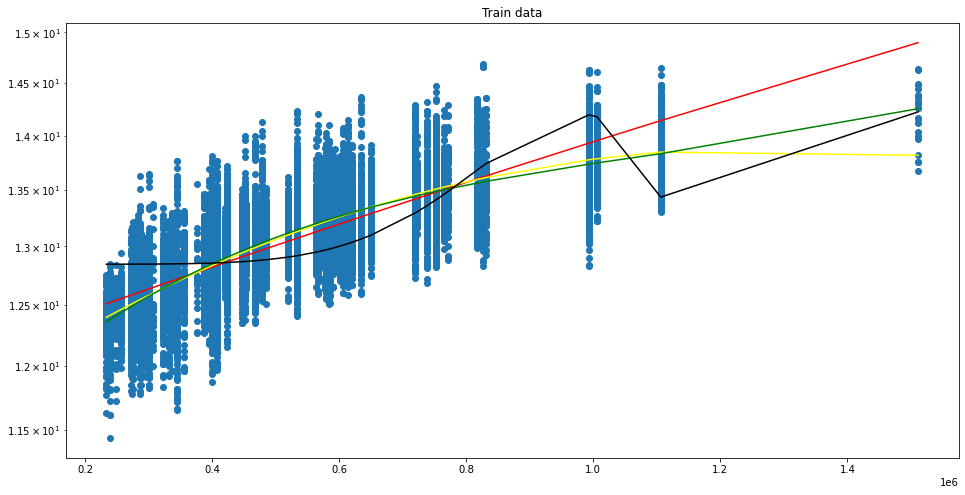

In [71]:
plt.figure(figsize=(16, 8))

linreg = LinearRegression()
linreg.fit(zip_median_rank, target)

poly2 = PolynomialFeatures(degree=2)
x_poly2 = poly2.fit_transform(zip_median_rank)
poly_reg2 = LinearRegression()
poly_reg2.fit(x_poly2, target)

poly3 = PolynomialFeatures(degree=3)
x_poly3 = poly3.fit_transform(zip_median_rank)
poly_reg3 = LinearRegression()
poly_reg3.fit(x_poly3, target)

poly10 = PolynomialFeatures(degree=10)
x_poly10 = poly10.fit_transform(zip_median_rank)
poly_reg10 = LinearRegression()
poly_reg10.fit(x_poly10, target)

pred = linreg.predict(zip_median_rank)
pred2 = poly_reg2.predict(x_poly2)
pred3 = poly_reg3.predict(x_poly3)
pred10 = poly_reg10.predict(x_poly10)

plt.scatter(zip_median_rank, target)
plt.yscale('log')
plt.title("Train data")
plt.plot(zip_median_rank, pred, c='red', label='Linear regression line')
plt.plot(zip_median_rank, pred2, c='yellow', label='Polynomial regression line 2')
plt.plot(zip_median_rank, pred3, c='green', label='Polynomial regression line 3')
plt.plot(zip_median_rank, pred10, c='black', label='Polynomial regression line 10')
;


In [72]:
#print(linreg.score(X_train_val, y_train), poly_reg2.score(x_poly2, y), poly_reg3.score(x_poly3, y), poly_reg10.score(x_poly10, y))

### Check linearity of continuous predictors

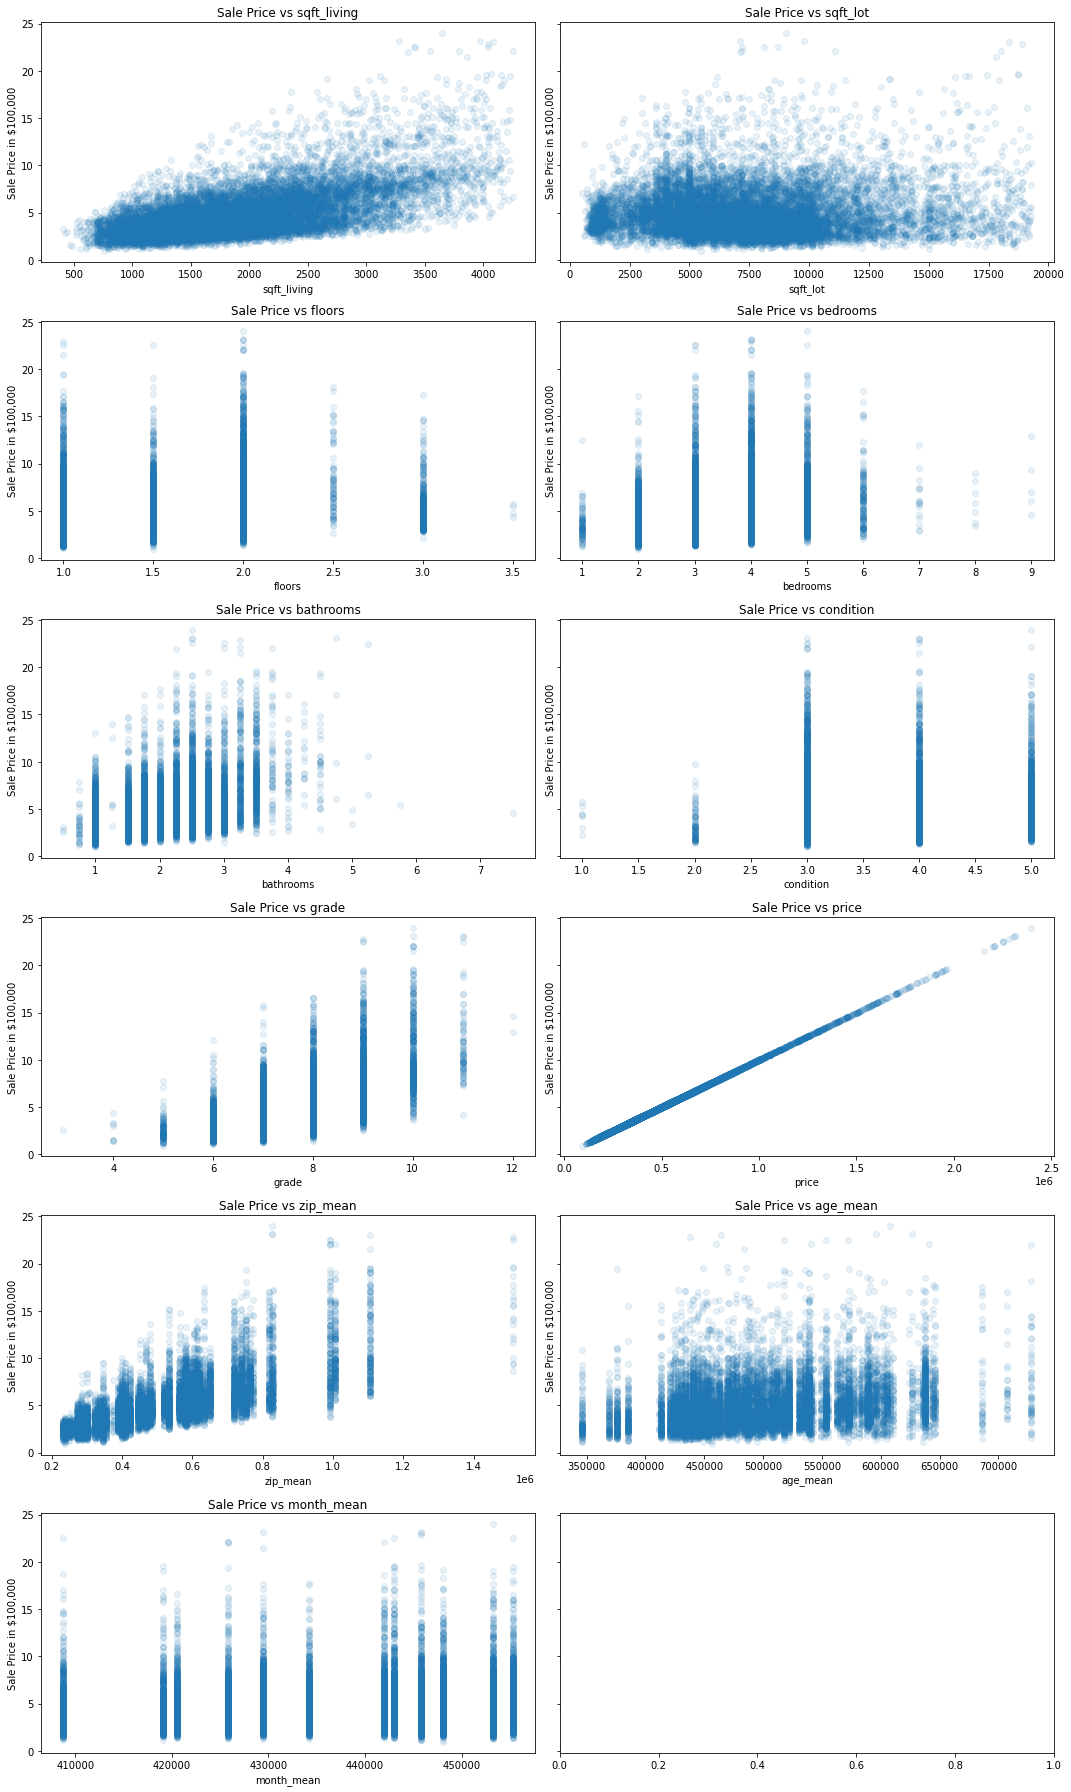

In [73]:
# check linearity

fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(15,25), sharey=True)

for ax, column in zip(axes.flatten(), x_train_cont.columns):
    ax.scatter(x_train_cont[column], x_train_cont['price']/100000, label=column, alpha=.1)
    ax.set_title(f'Sale Price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Sale Price in $100,000')

fig.tight_layout()


    * sqft_living, zip_mean, grade have a very strong visual relationship with price
    * bedrooms, bathrooms, age_mean have a moderate visual relationship with price
    * floors, condition, sqft_lot, month_mean do not appear to have a strong relationship with price

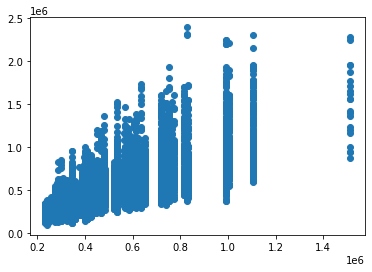

In [74]:
# zip_median_rank has a very strong relationship to price

plt.scatter(x=x_train_cont['zip_mean'], y=x_train_cont['price']);


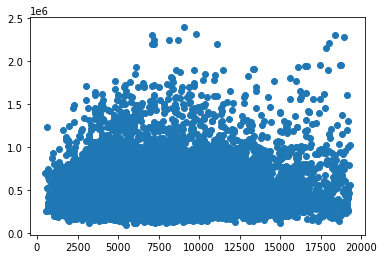

In [75]:
plt.scatter(x=x_train_cont['sqft_lot'], y=x_train_cont['price']);

# this variable does not appear to have a very linear relationship with the target variable.

Fun fact - "grade" was not well defined in the features list. I looked it up and found that grade is "	Classification by construction quality which refers to the types of materials used and the quality of workmanship. Buildings of better quality (higher grade) cost more to build per unit of measure and command higher value." So, it's the quality of building materials, and VERY important to our model.

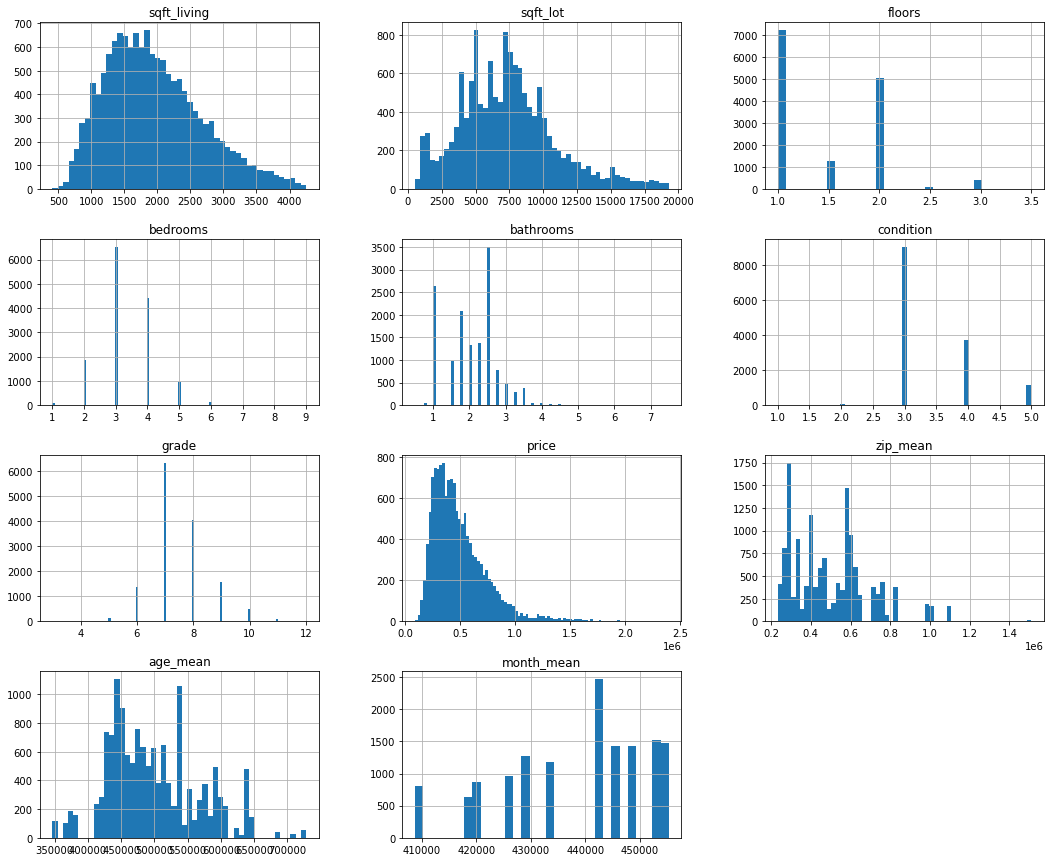

In [76]:
# check out our histograms

x_train_cont.hist(figsize=(18,15), bins='auto');


### Transform

In [77]:
# We're going to transform all of these.

# log features
log_names = [f'{column}' for column in x_train_cont.columns]

x_train_cont_log = np.log(x_train_cont)
x_train_cont_log.columns = log_names

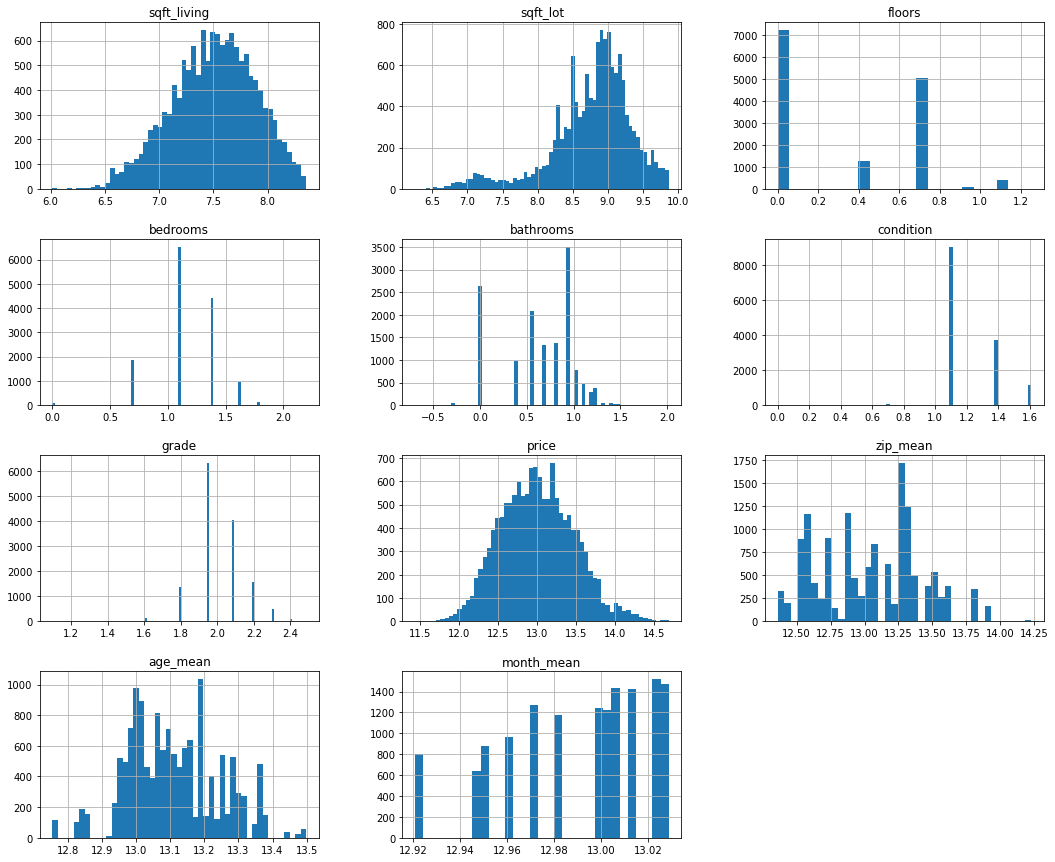

In [78]:
# check out our histograms for our transformed data

x_train_cont_log.hist(figsize=(18,15), bins='auto');

# looks more normal

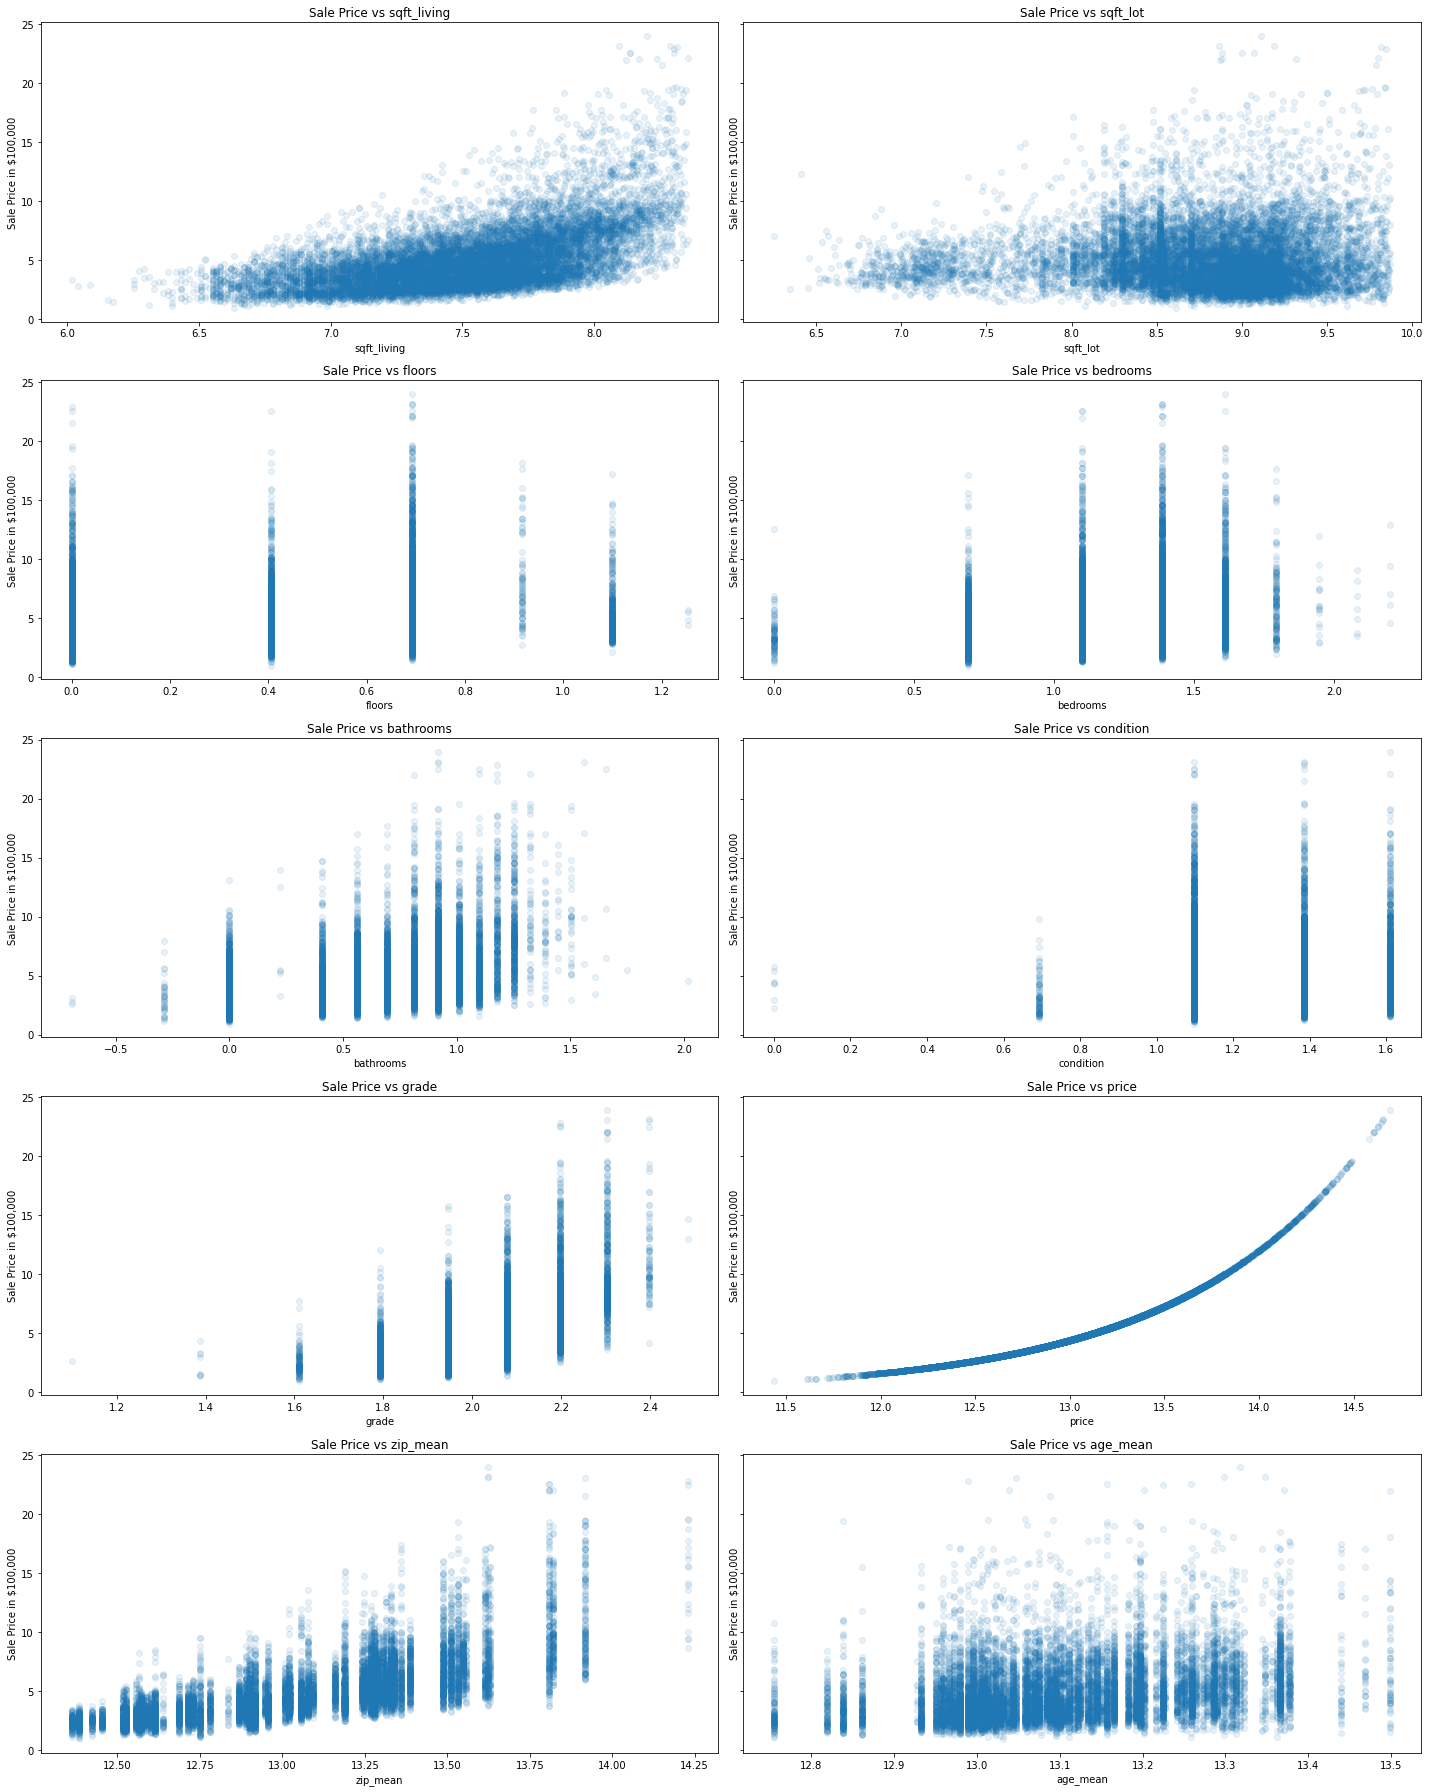

In [79]:
# check linearity

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20,25), sharey=True)

for ax, column in zip(axes.flatten(), x_train_cont_log.columns):
    ax.scatter(x_train_cont_log[column], x_train_cont['price']/100000, label=column, alpha=.1)
    ax.set_title(f'Sale Price vs {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Sale Price in $100,000')

fig.tight_layout()


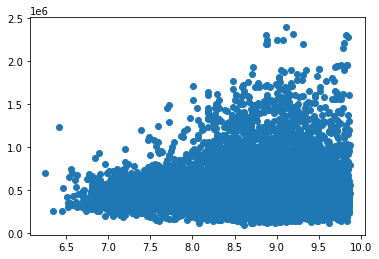

In [80]:
plt.scatter(x=x_train_cont_log['sqft_lot'], y=x_train_cont['price']);

# log transforming sqft_lot did not help much. This variable simply does not appear to have a great linear relationship with our target variable.

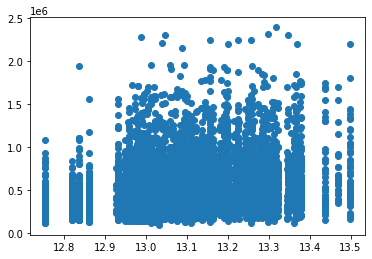

In [81]:
plt.scatter(x=x_train_cont_log['age_mean'], y=x_train_cont['price']);

# transformation has done nothing for age. It doesn't appear to have any relationship to price.

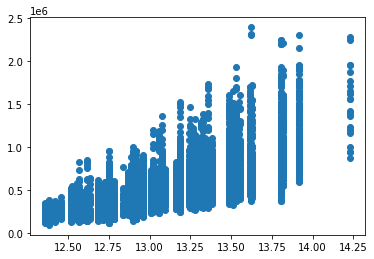

In [82]:
plt.scatter(x=x_train_cont_log['zip_mean'], y=x_train_cont['price']);

# fairly strong relationship

### Standardize

In [83]:
x_train_cont_log.drop('price', axis=1, inplace=True)

In [84]:
# standardize all of our values with scikit-learn StandardScaler

scaler = StandardScaler()

transformed_scaled_continuous = pd.DataFrame(scaler.fit_transform(x_train_cont_log),columns = x_train_cont_log.columns)


In [85]:
transformed_scaled_continuous

sqft_living  sqft_lot    floors  bedrooms  bathrooms  condition  \
0         1.750330 -0.813451  2.214249  0.785187   1.177094  -0.648171   
1        -0.993049 -3.037101  1.056760 -1.742855  -0.647025  -0.648171   
2         0.171198  0.454486  1.056760 -0.264046   0.697288  -0.648171   
3         0.327319 -0.524513  1.056760 -0.264046   0.697288   0.964438   
4        -0.366032  0.232886  1.056760 -0.264046   0.697288  -0.648171   
...            ...       ...       ...       ...        ...        ...   
14035     1.097649  0.650076  1.056760 -0.264046   0.697288  -0.648171   
14036    -0.038128  0.753293 -0.921980 -0.264046   0.420016   0.964438   
14037    -0.830419 -1.083469 -0.921980 -1.742855  -0.241355  -0.648171   
14038    -1.501090  0.472971 -0.921980 -0.264046  -1.714066   2.215274   
14039     0.830876  0.530827 -0.921980  0.785187  -0.241355   0.964438   

          grade  zip_mean  age_mean  month_mean  
0      1.417705  2.024886  0.411620   -0.666831  
1      0.527247  0.372860 -0.267996   -1.342705  
2      0.527247 -1.270080 -0.045360    0.267574  
3      0.527247  1.167787 -0.862294    1.235122  
4     -0.482270 -1.230015  0.107917    0.549426  
...         ...       ...       ...         ...  
14035  0.527247 -0.394157 -0.677352   -0.666831  
14036 -0.482270  1.329717 -2.037448    1.235122  
14037 -0.482270  1.286358 -0.798061    0.267574  
14038 -1.647673 -1.583746 -0.388908   -2.268762  
14039  0.527247  2.312995 -0.855505    1.235122  

[14040 rows x 10 columns]

## Final Prep for Linear Regression

In [86]:
X_train_val = transformed_scaled_continuous.join([x_train_cat], how='inner')

In [87]:
X_train_val

sqft_living  sqft_lot    floors  bedrooms  bathrooms  condition  \
0         1.750330 -0.813451  2.214249  0.785187   1.177094  -0.648171   
1        -0.993049 -3.037101  1.056760 -1.742855  -0.647025  -0.648171   
2         0.171198  0.454486  1.056760 -0.264046   0.697288  -0.648171   
3         0.327319 -0.524513  1.056760 -0.264046   0.697288   0.964438   
4        -0.366032  0.232886  1.056760 -0.264046   0.697288  -0.648171   
...            ...       ...       ...       ...        ...        ...   
14035     1.097649  0.650076  1.056760 -0.264046   0.697288  -0.648171   
14036    -0.038128  0.753293 -0.921980 -0.264046   0.420016   0.964438   
14037    -0.830419 -1.083469 -0.921980 -1.742855  -0.241355  -0.648171   
14038    -1.501090  0.472971 -0.921980 -0.264046  -1.714066   2.215274   
14039     0.830876  0.530827 -0.921980  0.785187  -0.241355   0.964438   

          grade  zip_mean  age_mean  month_mean  waterfront_1.0  \
0      1.417705  2.024886  0.411620   -0.666831               0   
1      0.527247  0.372860 -0.267996   -1.342705               0   
2      0.527247 -1.270080 -0.045360    0.267574               0   
3      0.527247  1.167787 -0.862294    1.235122               0   
4     -0.482270 -1.230015  0.107917    0.549426               0   
...         ...       ...       ...         ...             ...   
14035  0.527247 -0.394157 -0.677352   -0.666831               0   
14036 -0.482270  1.329717 -2.037448    1.235122               0   
14037 -0.482270  1.286358 -0.798061    0.267574               0   
14038 -1.647673 -1.583746 -0.388908   -2.268762               0   
14039  0.527247  2.312995 -0.855505    1.235122               0   

       renovated_1.0  basement_1.0  comparative_sf_2  comparative_sf_3  
0                  0             1                 0                 1  
1                  0             1                 1                 0  
2                  0             0                 1                 0  
3                  0             0                 1                 0  
4                  0             0                 1                 0  
...              ...           ...               ...               ...  
14035              1             0                 1                 0  
14036              0             1                 0                 0  
14037              0             1                 0                 0  
14038              0             0                 0                 0  
14039              0             1                 0                 1  

[14040 rows x 15 columns]

### Process holdout

zip_mean_mapper, age_mapper, month_mapper

In [88]:
x_test_cont.drop(['sqft_above', 'sqft_lot15', 'sqft_living15', 'lat'], axis=1, inplace=True)

In [89]:
x_test_cont['zip_mean'] = x_test_cont['zipcode'].map(zip_mean_mapper)
x_test_cont['month_mean'] = x_test_cont['month_sold'].map(month_mapper)
x_test_cont['age_mean'] = x_test_cont['age'].map(age_mapper)


In [90]:
x_test_cont.drop(['zipcode', 'month_sold', 'age'], axis=1, inplace=True)

In [91]:
x_test_cont

sqft_living  sqft_lot  floors  bedrooms  bathrooms  condition  grade  \
0            1140      8558     1.0         3       1.75          4      7   
1            2340      6350     1.0         4       2.75          4      7   
2            2460     10401     1.0         4       3.00          5      7   
3            2420      7927     1.0         4       2.25          4      7   
4            1580      1487     3.0         3       2.25          3      9   
...           ...       ...     ...       ...        ...        ...    ...   
3506         3190      7081     1.0         5       3.00          3      9   
3507          860       696     2.0         2       2.25          3      9   
3508         3190      8160     2.0         5       2.50          3      9   
3509         1510      2001     2.0         2       1.50          4      8   
3510         2550      4089     2.0         3       2.25          3      9   

         zip_mean  month_mean     age_mean  
0     719806.8074    434172.0  487373.7451  
1     424194.7380    453250.0  473455.7810  
2     451878.3754    443056.0  456546.7829  
3     387935.7912    448076.0  497204.8295  
4     752552.5609    408769.0  591114.3101  
...           ...         ...          ...  
3506  300684.3830    448076.0  591114.3101  
3507  407414.6319    434172.0  476672.3642  
3508  566548.1410    445784.0  637810.9443  
3509  593006.3158    420580.0  437947.4793  
3510  992838.1270    425834.0  464003.6045  

[3511 rows x 10 columns]

In [92]:
# We're going to transform all of these.

# log features
log_names = [f'{column}' for column in x_test_cont.columns]

holdout_log = np.log(x_test_cont)
holdout_log.columns = log_names

In [93]:
# standardize all of our values with scikit-learn StandardScaler

holdout_scaled = pd.DataFrame(scaler.transform(holdout_log),columns = holdout_log.columns)

In [94]:
X_test = holdout_scaled.join([x_test_cat])

In [95]:
test_actual = np.exp(y_test['price']).astype(int)
test_actual

0       422112
1       644999
2       570716
3       402765
4       543321
         ...  
3506    669547
3507    346735
3508    870435
3509    446678
3510    836620
Name: price, Length: 3511, dtype: int32

# Model Explorations

We're going to evaluate a few different variations of our linear regression model, as well as a few more complex model types. In order to keep track of our results, we'll be making a dictionary to store our model accuracy results.

In [96]:
models = {}
models['Models'] = []
models['r2'] = []
models['mae'] = []
models['rmse'] = []

## Base Linear Regression Model

Run a base model with no cross-validation or specific feature selection to see our base model scores.

In [97]:
predictors_train = sm.add_constant(X_train_val)
model = sm.OLS(y_train, predictors_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     4911.
Date:                Mon, 03 May 2021   Prob (F-statistic):               0.00
Time:                        21:29:36   Log-Likelihood:                 3543.3
No. Observations:               14040   AIC:                            -7055.
Df Residuals:                   14024   BIC:                            -6934.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               13.0581      0.006   2308.055      0.000      13.047      13.069
sqft_living          0.1692      0.004     44.677      0.000       0.162       0.177
sqft_lot             0.0159      0.002      6.772      0.000       0.011       0.021
floors               0.0016      0.003      0.597      0.550      -0.004       0.007
bedrooms            -0.0133      0.002     -6.129      0.000      -0.018      -0.009
bathrooms           -0.0096      0.003     -3.645      0.000      -0.015      -0.004
condition            0.0331      0.002     19.656      0.000       0.030       0.036
grade                0.0882      0.003     34.951      0.000       0.083       0.093
zip_mean             0.2917      0.002    161.316      0.000       0.288       0.295
age_mean             0.0419      0.002     22.269      0.000       0.038       0.046
month_mean           0.0115      0.002      7.222      0.000       0.008       0.015
waterfront_1.0       0.5391      0.039     13.979      0.000       0.464       0.615
renovated_1.0        0.1085      0.009     12.142      0.000       0.091       0.126
basement_1.0         0.0297      0.004      7.195      0.000       0.022       0.038
comparative_sf_2    -0.0812      0.006    -13.851      0.000      -0.093      -0.070
comparative_sf_3    -0.0633      0.008     -8.123      0.000      -0.079      -0.048
==============================================================================
Omnibus:                      401.933   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              688.819
Skew:                           0.252   Prob(JB):                    2.66e-150
Kurtosis:                       3.961   Cond. No.                         44.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Perform cross-validation with our base model over 5 splits and get our mean R^2.

In [98]:
model = LinearRegression()
model.fit(X_train_val, y_train)
cv_5 = cross_val_score(model, X_train_val, y_train, cv=5)
r2 = cv_5.mean()
r2

0.8393852875759304

In [99]:
# How many predictors are in our base model?
print("{} predictors used for this model".format(X_train_val.shape[1]))

15 predictors used for this model


In [100]:
# apply our model to our test set and get predicted values
test_predictions = model.predict(X_test)
test_predictions

# reverse log transform our predicted values
test_predictions_unscaled = np.exp(test_predictions)
test_predictions_unscaled = test_predictions_unscaled.flatten().astype(int)

residuals = test_actual - test_predictions_unscaled

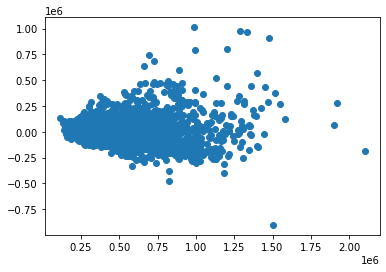

In [101]:
plt.scatter(test_predictions_unscaled, residuals)

# our residuals show some heteroskedasticity
# but our model's Durbin-Watson score falls between 1 and 2, which is still acceptable
# Just BARELY - at 1.983

In [102]:
# Calculate our mean absolute error

mae = round(mean_absolute_error(test_actual, test_predictions_unscaled), 2)
mae

71128.2

In [103]:
np.sqrt(mean_squared_error(test_actual, test_predictions_unscaled))

14272.884379354035

In [104]:

rmse = round(np.sqrt(mean_squared_error(test_actual, test_predictions_unscaled)), 2)
rmse

14272.88

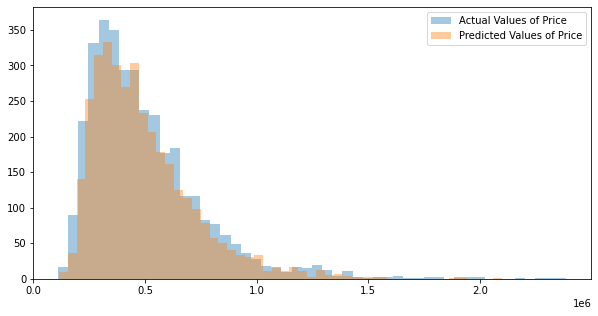

In [105]:
plt.figure(figsize=(10,5))
sns.distplot(np.exp(y_test), hist=True, kde=False)
sns.distplot(test_predictions_unscaled, hist=True, kde=False)
plt.legend(labels=['Actual Values of Price', 'Predicted Values of Price'])
plt.xlim(0,);

In [106]:
models['Models'].append('Basic LR')
models['r2'].append(r2)
models['mae'].append(mae)
models['rmse'].append(rmse)

### Study Residuals

In [107]:
# We need our statsmodels model again to plot residuals
predictors_train = sm.add_constant(X_train_val)
model = sm.OLS(y_train, predictors_train).fit()

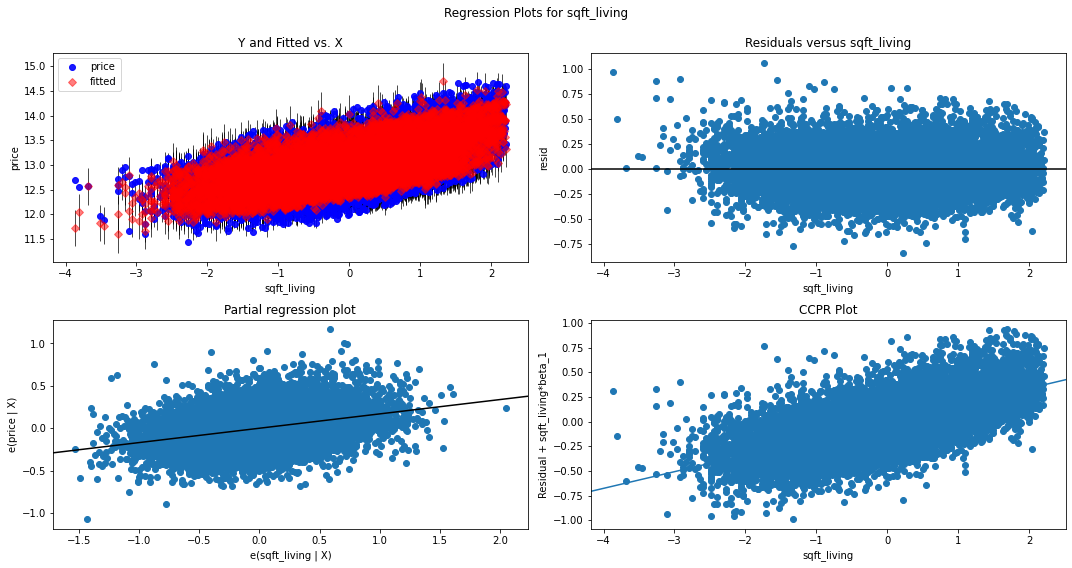

In [108]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_living", fig=fig)
plt.show()

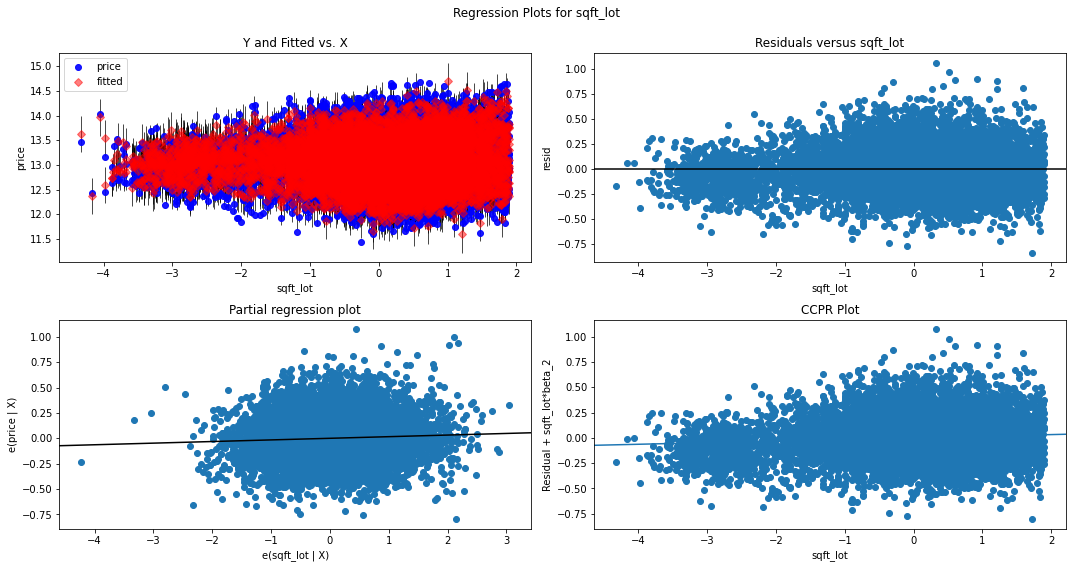

In [109]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_lot", fig=fig)
plt.show()

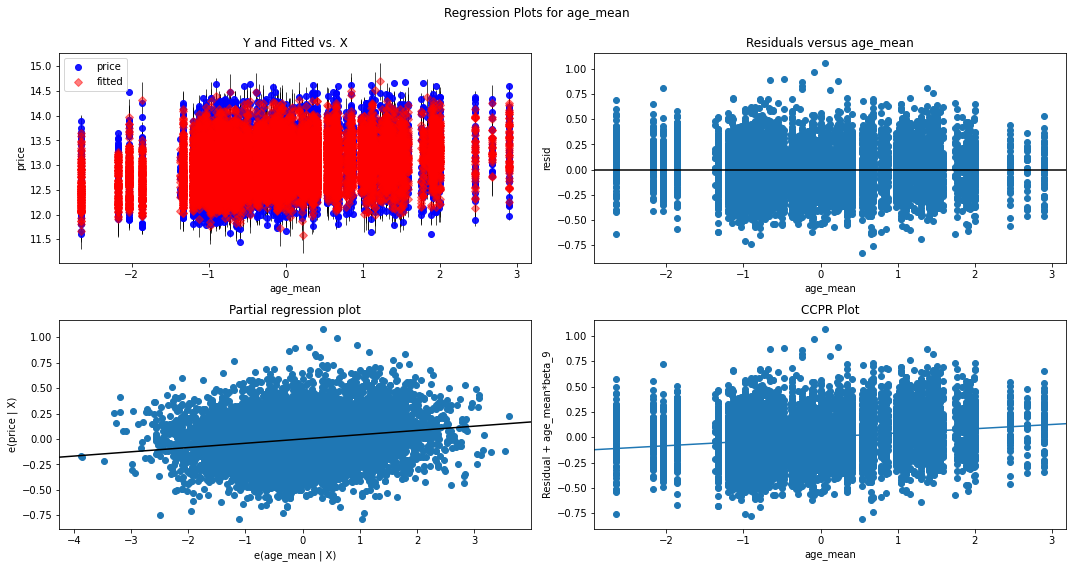

In [110]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "age_mean", fig=fig)
plt.show()

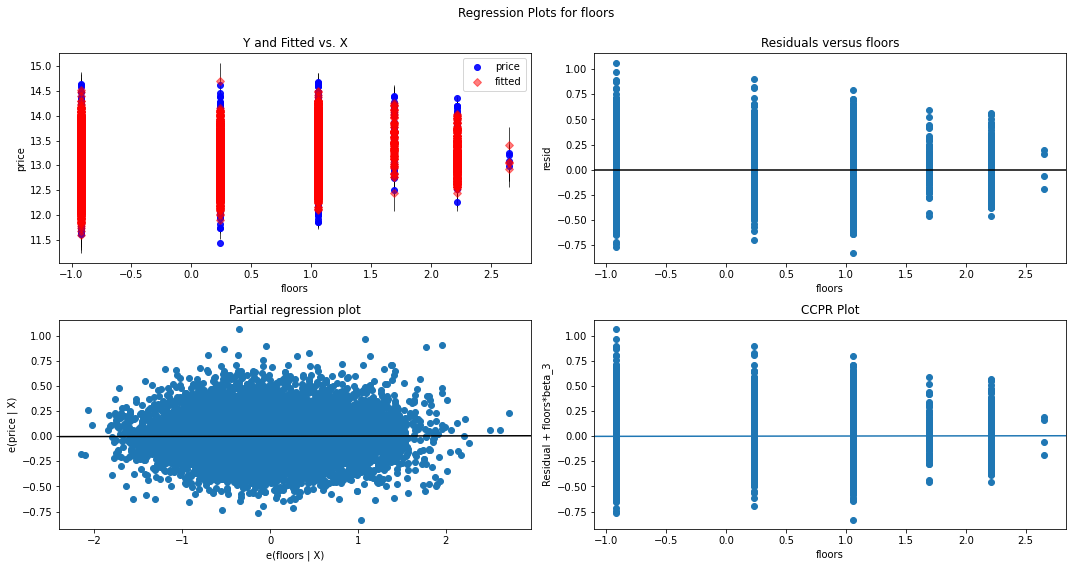

In [111]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "floors", fig=fig)
plt.show()

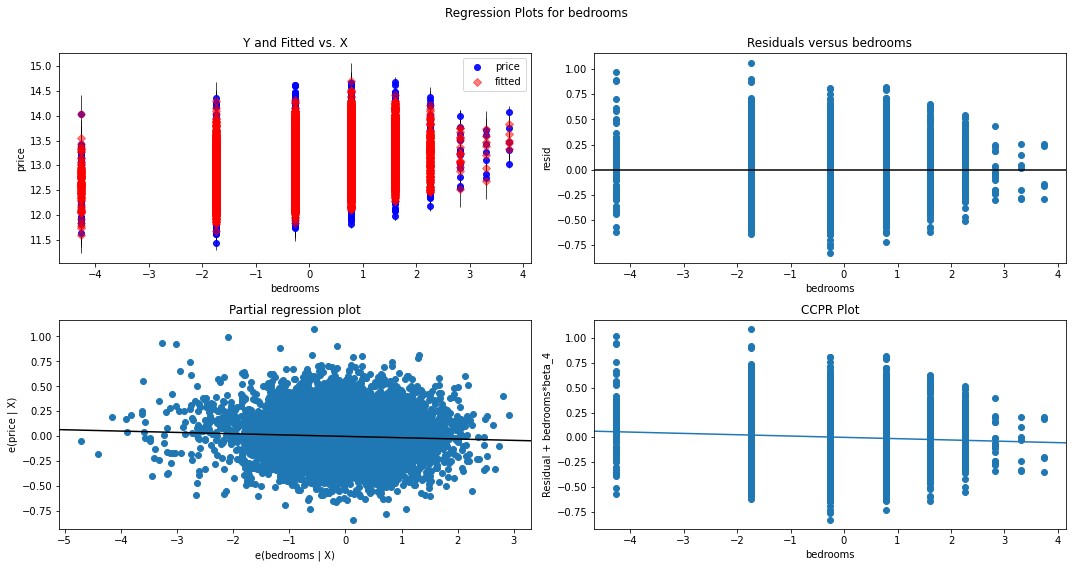

In [112]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "bedrooms", fig=fig)
plt.show()

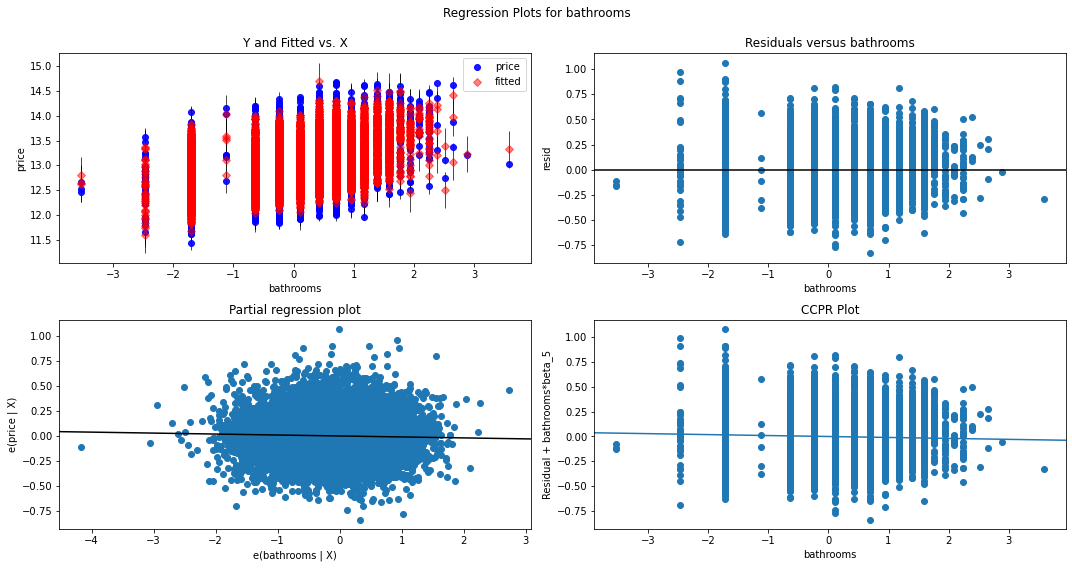

In [113]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "bathrooms", fig=fig)
plt.show()

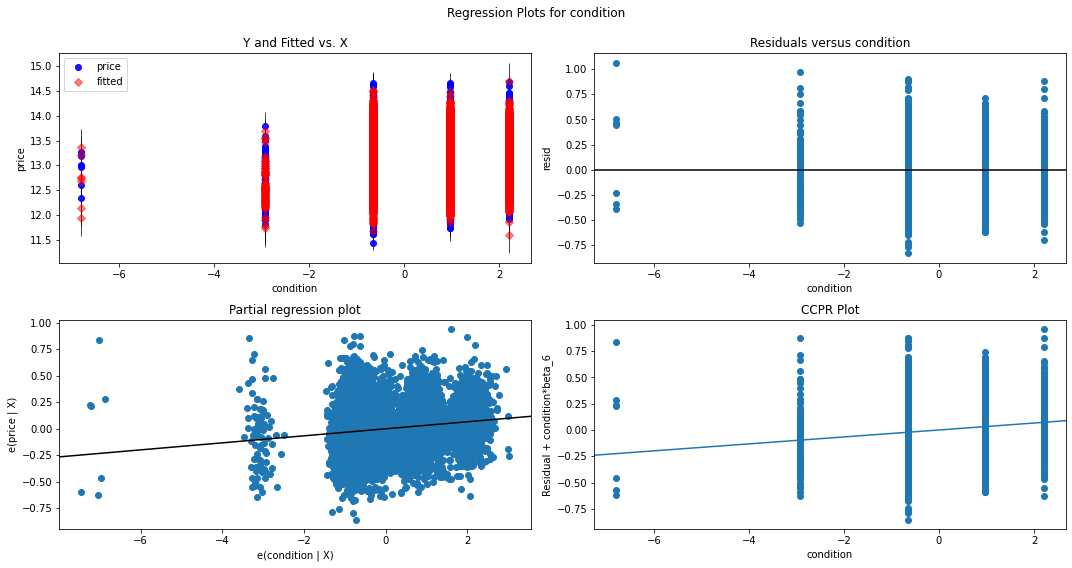

In [114]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "condition", fig=fig)
plt.show()

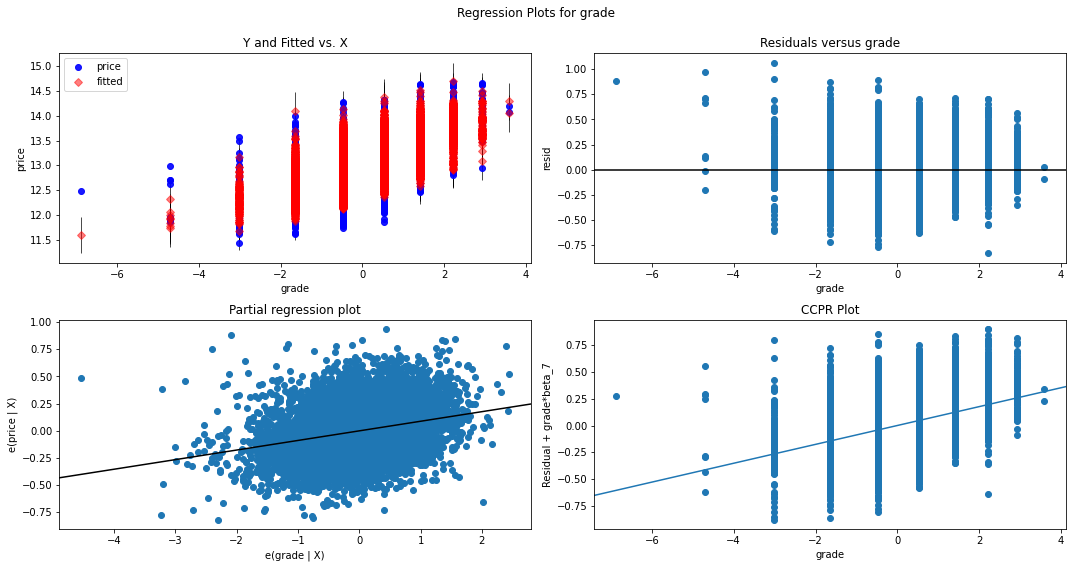

In [115]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "grade", fig=fig)
plt.show()

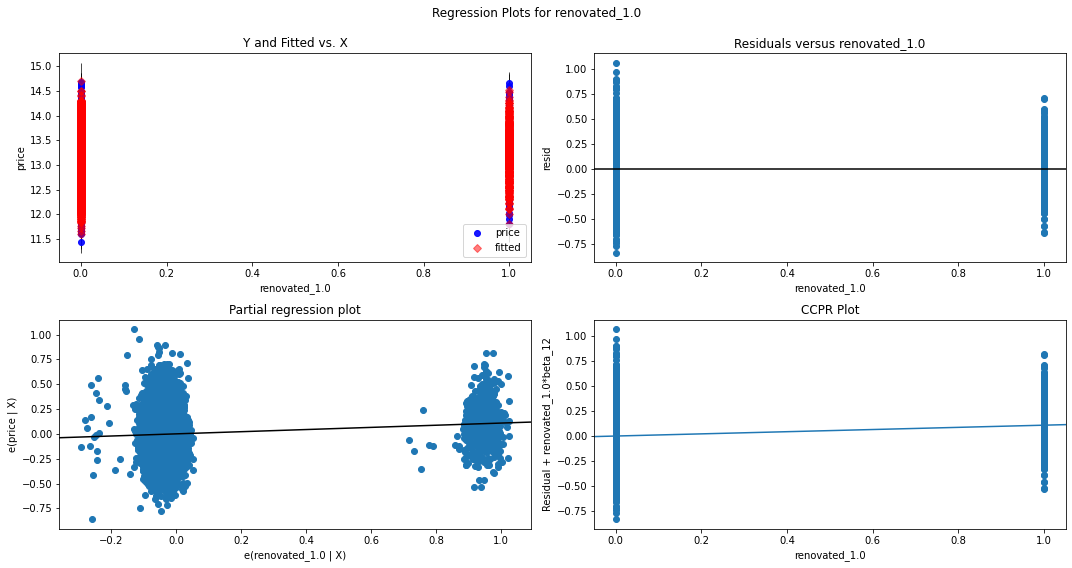

In [116]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "renovated_1.0", fig=fig)
plt.show()

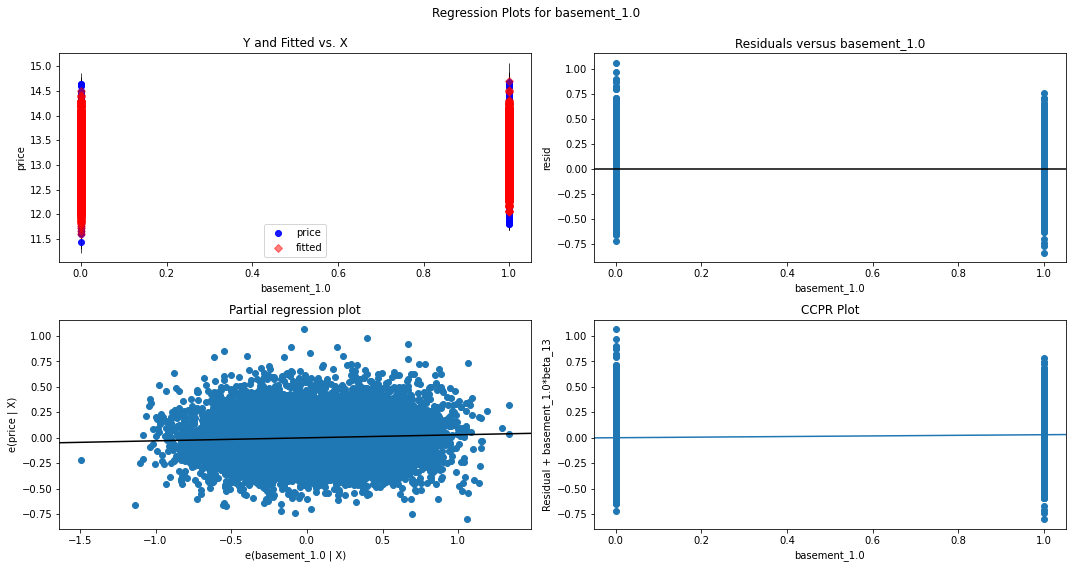

In [117]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "basement_1.0", fig=fig)
plt.show()

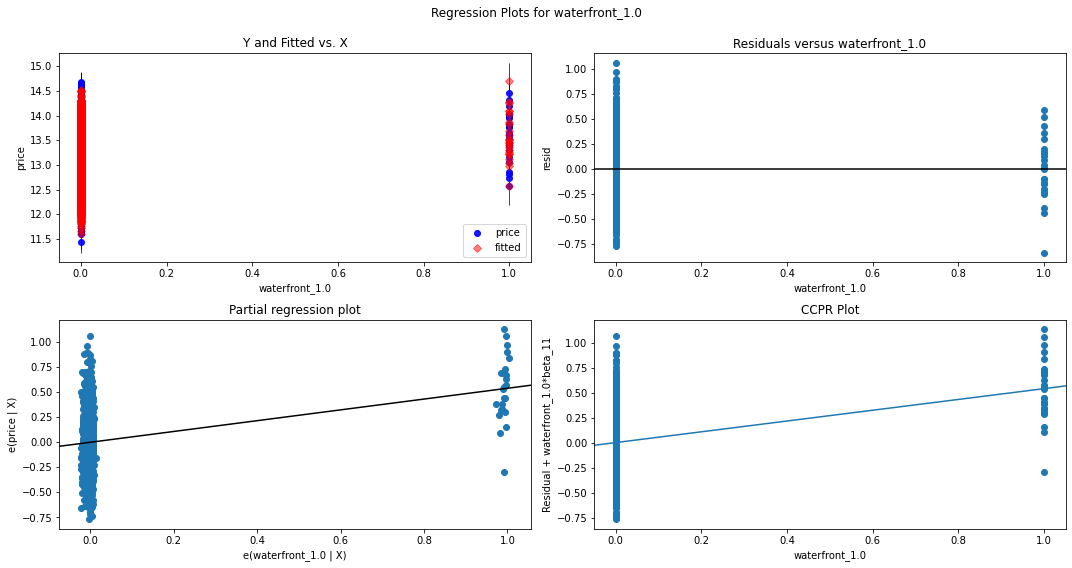

In [118]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "waterfront_1.0", fig=fig)
plt.show()

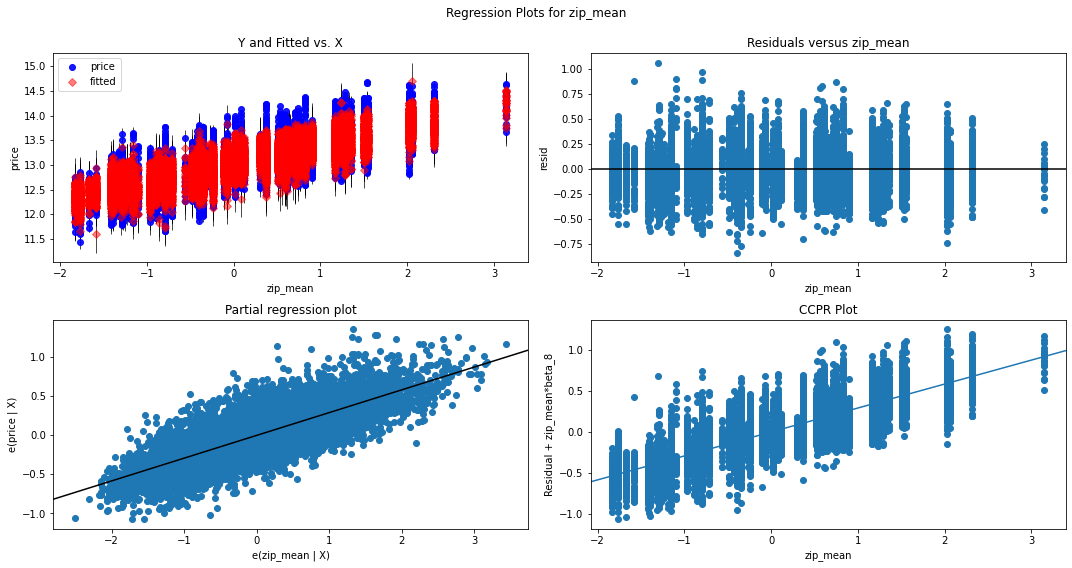

In [119]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "zip_mean", fig=fig)
plt.show()

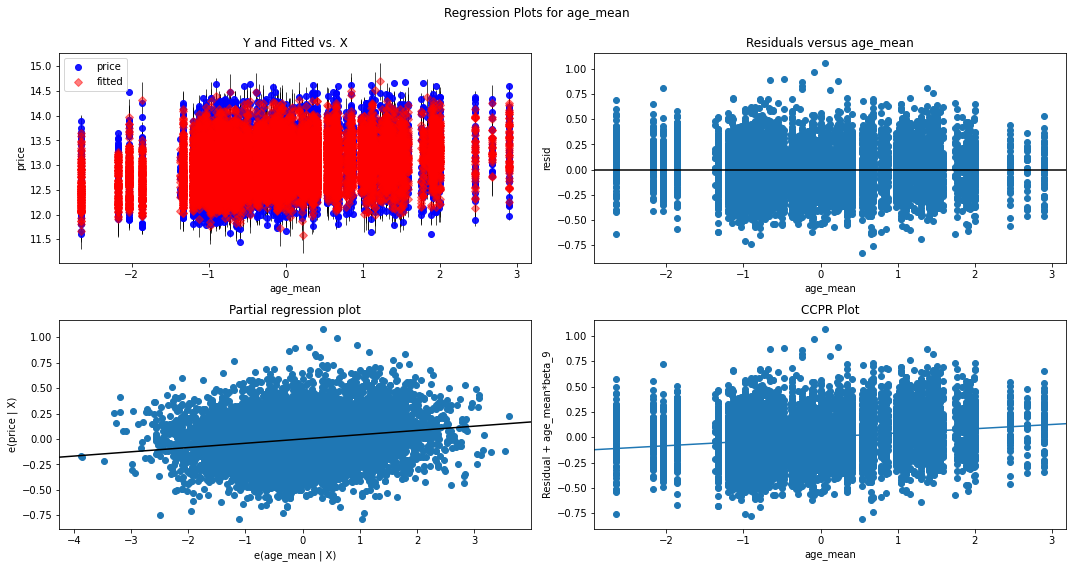

In [120]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "age_mean", fig=fig)
plt.show()

### Find/Add Interactions

I wrote a function which finds all of the feature combinations possible in our dataset. Then for each combination, the function runs a linear regression with cross validation on 5 folds and gets the r^2 score for the regression including that feature combination. All scores are recorded and r^2 score improvement is assessed, with the resulting table giving the increase in model improvement from a feature combo. 

In [121]:
def test_feature_combinations(price, variables):
    
    """Function takes in target price and a dataframe of independent variables, and 
    tests model improvement for each combination of variables"""
    
    # select our estimator and our cross validation plan
    regression = LinearRegression()
    cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)
    
    # prepare our scoring dataframe
    scoring_df = pd.DataFrame()
    
    # prepare our lists to store our features and scores as we iterate
    scores = []
    feature1 = []
    feature2 = []
    
    # Get a list of all of our features, and remove our target variable 'price' from the list
    features = list(variables.columns)

    # make a list of all of our possible feature combinations
    feature_combos = itertools.combinations(features, 2)
    feature_combos = list(feature_combos)
    
    # set our y-value as our target variable
    y = price
    
    # prepare our x-value with our independent variables. We do an initial split here in order to run a 
    # linear regression to get a base r^2 on our basic model without interactions
    X = variables
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=randomstate)
    base_score = round(np.mean(cross_val_score(regression, X_train, y_train, scoring='r2', cv=cv)), 4)   
    print("Model base score is ",base_score)
    
    # now we run the regression on each feature combo
    for feature in feature_combos:
        feat1, feat2 = feature[0], feature[1]
        
        # create the test interaction on our data set
        variables['test_interaction'] = variables[feat1] * variables[feat2]
        # create a new X which includes the test interaction and drops our target value
        X = variables
        # make a new split so that our x-splits include the test interaction
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=randomstate)
        
        # Run a linear regression with cross-val just like our base model, and append the score to our scores list
        new_score = round(np.mean(cross_val_score(regression, X_train, y_train, scoring='r2', cv=cv)), 4)
        scores.append(new_score)
        # put feature 1 on a list
        feature1.append(feat1)
        # put feature 2 on a list
        feature2.append(feat2)
        print(feat1, feat2, new_score)
    
    # load all of our lists into the scoring dataframe
    scoring_df['feature1'] = feature1
    scoring_df['feature2'] = feature2
    scoring_df['scores'] = scores
    scoring_df['improvement'] = scoring_df['scores'] - base_score
    
    # return our scoring dataframe to the function
    return scoring_df

In [122]:
# running our function on our continuous variables to look for improvement
# our R2 is much lower for model base score because we aren't including our categorical variables in this improvement assessment

scoring_df = test_feature_combinations(y_train, transformed_scaled_continuous)

Model base score is  0.8319
sqft_living sqft_lot 0.8324
sqft_living floors 0.8347
sqft_living bedrooms 0.8337
sqft_living bathrooms 0.8365
sqft_living condition 0.8319
sqft_living grade 0.8365
sqft_living zip_mean 0.8319
sqft_living age_mean 0.8325
sqft_living month_mean 0.8319
sqft_lot floors 0.8335
sqft_lot bedrooms 0.8335
sqft_lot bathrooms 0.8322
sqft_lot condition 0.8331
sqft_lot grade 0.8319
sqft_lot zip_mean 0.8319
sqft_lot age_mean 0.8327
sqft_lot month_mean 0.8319
floors bedrooms 0.8344
floors bathrooms 0.8323
floors condition 0.833
floors grade 0.8331
floors zip_mean 0.8319
floors age_mean 0.8319
floors month_mean 0.8319
bedrooms bathrooms 0.8343
bedrooms condition 0.8318
bedrooms grade 0.8343
bedrooms zip_mean 0.832
bedrooms age_mean 0.833
bedrooms month_mean 0.8317
bathrooms condition 0.8321
bathrooms grade 0.8348
bathrooms zip_mean 0.8319
bathrooms age_mean 0.8319
bathrooms month_mean 0.8319
condition grade 0.8321
condition zip_mean 0.8321
condition age_mean 0.8321
conditi

In [123]:
# showing our improvement scores for our interactions

scoring_df.sort_values('improvement', ascending=False)

feature1    feature2  scores  improvement
3   sqft_living   bathrooms  0.8365       0.0046
5   sqft_living       grade  0.8365       0.0046
31    bathrooms       grade  0.8348       0.0029
1   sqft_living      floors  0.8347       0.0028
17       floors    bedrooms  0.8344       0.0025
26     bedrooms       grade  0.8343       0.0024
24     bedrooms   bathrooms  0.8343       0.0024
2   sqft_living    bedrooms  0.8337       0.0018
9      sqft_lot      floors  0.8335       0.0016
10     sqft_lot    bedrooms  0.8335       0.0016
12     sqft_lot   condition  0.8331       0.0012
20       floors       grade  0.8331       0.0012
28     bedrooms    age_mean  0.8330       0.0011
19       floors   condition  0.8330       0.0011
15     sqft_lot    age_mean  0.8327       0.0008
7   sqft_living    age_mean  0.8325       0.0006
0   sqft_living    sqft_lot  0.8324       0.0005
40        grade    age_mean  0.8324       0.0005
18       floors   bathrooms  0.8323       0.0004
11     sqft_lot   bathrooms  0.8322       0.0003
36    condition    zip_mean  0.8321       0.0002
35    condition       grade  0.8321       0.0002
30    bathrooms   condition  0.8321       0.0002
37    condition    age_mean  0.8321       0.0002
27     bedrooms    zip_mean  0.8320       0.0001
32    bathrooms    zip_mean  0.8319       0.0000
38    condition  month_mean  0.8319       0.0000
39        grade    zip_mean  0.8319       0.0000
34    bathrooms  month_mean  0.8319       0.0000
42     zip_mean    age_mean  0.8319       0.0000
43     zip_mean  month_mean  0.8319       0.0000
33    bathrooms    age_mean  0.8319       0.0000
22       floors    age_mean  0.8319       0.0000
23       floors  month_mean  0.8319       0.0000
21       floors    zip_mean  0.8319       0.0000
16     sqft_lot  month_mean  0.8319       0.0000
14     sqft_lot    zip_mean  0.8319       0.0000
13     sqft_lot       grade  0.8319       0.0000
8   sqft_living  month_mean  0.8319       0.0000
6   sqft_living    zip_mean  0.8319       0.0000
4   sqft_living   condition  0.8319       0.0000
44     age_mean  month_mean  0.8319       0.0000
25     bedrooms   condition  0.8318      -0.0001
41        grade  month_mean  0.8318      -0.0001
29     bedrooms  month_mean  0.8317      -0.0002

We won't add any interactions. None of these improvements were significant enough.

## Linear Regression - Feature Selectors

### Forward-Backward Selector

First we'll try a simple forward-backward feature selection model based on p-value, using a statsmodel OLS linear regression model.

This model gives us a list of the important features based on their p-value.

This model takes quite some time to run, so is commented out with the results replicated in markdown following.

In [124]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ 
    Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = included[pvalues.argmax()]
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included


result = stepwise_selection(X_train_val, y_train, verbose=True)

print('resulting features:', result)


Add  grade                          with p-value 0.0
Add  zip_mean                       with p-value 0.0
Add  sqft_living                    with p-value 0.0
Add  age_mean                       with p-value 5.72557e-79
Add  condition                      with p-value 1.59096e-97
Add  waterfront_1.0                 with p-value 1.75154e-51
Add  comparative_sf_2               with p-value 2.97529e-44
Add  renovated_1.0                  with p-value 9.41706e-33
Add  comparative_sf_3               with p-value 3.0521e-22
Add  basement_1.0                   with p-value 1.21794e-12
Add  sqft_lot                       with p-value 1.33274e-16
Add  month_mean                     with p-value 5.44956e-13
Add  bedrooms                       with p-value 3.15557e-11
Add  bathrooms                      with p-value 0.000316569
resulting features: ['grade', 'zip_mean', 'sqft_living', 'age_mean', 'condition', 'waterfront_1.0', 'comparative_sf_2', 'renovated_1.0', 'comparative_sf_3', 'basement_1.0'

['grade', 'sqft_living', 'year_block_(1914.0, 1925.0]', 'lat_block_(47.375, 47.394]', 'lat_block_(47.394, 47.43]', 'lat_block_(47.43, 47.451]', 'condition', 'lat_block_(47.451, 47.474]', 'lat_block_(47.363, 47.375]', 'lat_block_(47.35, 47.363]', 'lat_block_(47.489, 47.5]', 'lat_block_(47.474, 47.489]', 'lat_block_(47.5, 47.512]', 'lat_block_(47.331, 47.35]', 'zipcode_98004', 'zipcode_98106', 'year_block_(1925.0, 1939.0]', 'lat_block_(47.655, 47.666]', 'lat_block_(47.633, 47.643]', 'lat_block_(47.674, 47.68]', 'lat_block_(47.643, 47.655]', 'lat_block_(47.666, 47.674]', 'lat_block_(47.68, 47.686]', 'zipcode_98040', 'waterfront_1.0', 'lat_block_(47.607, 47.621]', 'lat_block_(47.621, 47.633]', 'lat_block_(47.686, 47.692]', 'zipcode_98116', 'zipcode_98074', 'lat_block_(47.593, 47.607]', 'lat_block_(47.692, 47.698]', 'zipcode_98006', 'zipcode_98136', 'lat_block_(47.582, 47.593]', 'lat_block_(47.698, 47.707]', 'zipcode_98168', 'lat_block_(47.707, 47.718]', 'sqft_lot', 'zipcode_98027', 'zipcode_98014', 'year_block_(2011.0, 2015.0]', 'bedrooms', 'zipcode_98059', 'zipcode_98166', 'lat_block_(47.718, 47.727]', 'lat_block_(47.571, 47.582]', 'lat_block_(47.554, 47.564]', 'lat_block_(47.564, 47.571]', 'comparative_sf_3', 'lat_block_(47.547, 47.554]', 'zipcode_98108', 'lat_block_(47.54, 47.547]', 'lat_block_(47.727, 47.736]', 'lat_block_(47.532, 47.54]', 'zipcode_98177', 'zipcode_98032', 'renovated_1.0', 'zipcode_98019', 'zipcode_98075', 'lat_block_(47.524, 47.532]', 'lat_block_(47.736, 47.747]', 'lat_block_(47.747, 47.764]', 'lat_block_(47.764, 47.778]', 'lat_block_(47.512, 47.524]', 'basement_1.0', 'bathrooms', 'zipcode_98133', 'year_block_(1971.0, 1977.0]', 'year_block_(1962.0, 1967.0]', 'year_block_(1977.0, 1981.0]', 'year_block_(1959.0, 1962.0]', 'year_block_(1954.0, 1959.0]', 'year_block_(1967.0, 1971.0]', 'month_sold_4', 'zipcode_98112', 'zipcode_98119', 'zipcode_98102', 'zipcode_98109', 'zipcode_98024', 'zipcode_98010', 'zipcode_98038', 'month_sold_5', 'month_sold_6', 'zipcode_98039', 'zipcode_98103', 'zipcode_98117', 'zipcode_98115', 'comparative_lot_3', 'year_block_(2007.0, 2011.0]', 'zipcode_98122', 'zipcode_98199', 'zipcode_98105', 'zipcode_98107', 'zipcode_98033', 'month_sold_7', 'month_sold_3', 'zipcode_98188', 'zipcode_98070', 'zipcode_98198', 'floors', 'year_block_(1950.0, 1954.0]', 'month_sold_8', 'zipcode_98005', 'zipcode_98146', 'zipcode_98126', 'zipcode_98144', 'zipcode_98029', 'zipcode_98028', 'zipcode_98056', 'month_sold_9', 'year_block_(1981.0, 1987.0]', 'year_block_(1987.0, 1991.0]', 'year_block_(1945.0, 1950.0]', 'year_block_(1991.0, 1997.0]']

In [125]:
# Run our linear regression again, using only the features recommended by our feature selector

X_train_refined = X_train_val[result]
X_test_refined = X_test[result]

predictors_int = sm.add_constant(X_train_refined)
model = sm.OLS(y_train, predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     5262.
Date:                Mon, 03 May 2021   Prob (F-statistic):               0.00
Time:                        21:30:34   Log-Likelihood:                 3543.1
No. Observations:               14040   AIC:                            -7056.
Df Residuals:                   14025   BIC:                            -6943.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               13.0585      0.006   2325.461      0.000      13.047      13.070
grade                0.0884      0.003     35.270      0.000       0.083       0.093
zip_mean             0.2916      0.002    161.415      0.000       0.288       0.295
sqft_living          0.1697      0.004     45.829      0.000       0.162       0.177
age_mean             0.0421      0.002     22.777      0.000       0.039       0.046
condition            0.0330      0.002     19.732      0.000       0.030       0.036
waterfront_1.0       0.5401      0.039     14.017      0.000       0.465       0.616
comparative_sf_2    -0.0811      0.006    -13.840      0.000      -0.093      -0.070
renovated_1.0        0.1085      0.009     12.146      0.000       0.091       0.126
comparative_sf_3    -0.0633      0.008     -8.121      0.000      -0.079      -0.048
basement_1.0         0.0284      0.004      8.023      0.000       0.021       0.035
sqft_lot             0.0153      0.002      7.361      0.000       0.011       0.019
month_mean           0.0115      0.002      7.226      0.000       0.008       0.015
bedrooms            -0.0133      0.002     -6.124      0.000      -0.018      -0.009
bathrooms           -0.0092      0.003     -3.602      0.000      -0.014      -0.004
==============================================================================
Omnibus:                      402.859   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              690.689
Skew:                           0.252   Prob(JB):                    1.04e-150
Kurtosis:                       3.963   Cond. No.                         41.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [126]:
print("{} predictors used".format(len(result)))

14 predictors used


In [127]:
model = LinearRegression()
model.fit(X_train_refined, y_train)
cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)

cv_5 = cross_val_score(model, X_train_refined, y_train, cv=cv)
r2 = cv_5.mean()
r2

0.8394081985323435

In [128]:
# apply our model to our test set and get predicted values
test_predictions_refined = model.predict(X_test_refined)

# reverse log transform our predicted values
test_predictions_refined_unscaled = np.exp(test_predictions_refined)
test_predictions_refined_unscaled = test_predictions_refined_unscaled.flatten().astype(int)

In [129]:
mae = round(mean_absolute_error(test_actual, test_predictions_refined_unscaled), 2)
mae

122057.19

In [130]:
rmse = round(np.sqrt(mean_squared_error(test_actual, test_predictions_refined_unscaled)), 2)
rmse

11708.18

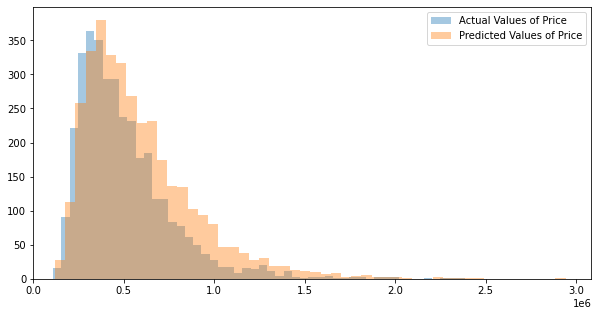

In [131]:
plt.figure(figsize=(10,5))
sns.distplot(np.exp(y_test), hist=True, kde=False)
sns.distplot(test_predictions_refined_unscaled, hist=True, kde=False)
plt.legend(labels=['Actual Values of Price', 'Predicted Values of Price'])
plt.xlim(0,);

In [132]:
models['Models'].append('Forw-Back Selector')
models['r2'].append(r2)
models['mae'].append(mae)
models['rmse'].append(rmse)

### Permutation Importance

Next we will study feature selection via permutation importance, using a sklearn LinearRegression model and the library eli5. For permutation importance, each column is individually scrambled, and the resulting error informs the feature weight. If the scramble causes high error in the results, the feature is considered important. If the scramble causes low error, the feature is considered unimportant.

This model gives us a list of important features based on how much error scrambling their columns produces.

In [133]:
'''import eli5
from eli5.sklearn import PermutationImportance

regressor = LinearRegression()
regressor.fit(X_train_val, y_train)

perm = PermutationImportance(regressor, random_state=1).fit(X_train_val, y_train)
eli5.show_weights(perm, feature_names = X_train_val.columns.tolist())'''

'import eli5\nfrom eli5.sklearn import PermutationImportance\n\nregressor = LinearRegression()\nregressor.fit(X_train_val, y_train)\n\nperm = PermutationImportance(regressor, random_state=1).fit(X_train_val, y_train)\neli5.show_weights(perm, feature_names = X_train_val.columns.tolist())'

In [134]:
'''# sorted list of relative feature importance via permutation importance - bottom 30 features

eli = pd.DataFrame(zip(X_train_val.columns.tolist(), perm.feature_importances_))
eli.sort_values(1, ascending=False, inplace=True)
eli.reset_index(inplace=True)
eli.drop('index', axis=1, inplace=True)
eli.tail(30)
'''

"# sorted list of relative feature importance via permutation importance - bottom 30 features\n\neli = pd.DataFrame(zip(X_train_val.columns.tolist(), perm.feature_importances_))\neli.sort_values(1, ascending=False, inplace=True)\neli.reset_index(inplace=True)\neli.drop('index', axis=1, inplace=True)\neli.tail(30)\n"

One thing that permutation importance does NOT do is help us pick how many features we should use. So we will just use the same number of predictors as our forward-backward selector.

In [135]:
'''result_eli5 = list(eli[:7][0])'''

'result_eli5 = list(eli[:7][0])'

In [136]:
# Run our linear regression again, using the features recommended by our feature selector

'''X_eli5 = X_train_val[result_eli5]

predictors_int = sm.add_constant(X_eli5)
model = sm.OLS(y_train, predictors_int).fit()
model.summary()'''


'X_eli5 = X_train_val[result_eli5]\n\npredictors_int = sm.add_constant(X_eli5)\nmodel = sm.OLS(y_train, predictors_int).fit()\nmodel.summary()'

In [137]:
'''model = LinearRegression()
model.fit(X_eli5, y_train)
cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)

cv_5 = cross_val_score(model, X_eli5, y_train, cv=cv)
r2 = cv_5.mean()
r2'''

'model = LinearRegression()\nmodel.fit(X_eli5, y_train)\ncv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)\n\ncv_5 = cross_val_score(model, X_eli5, y_train, cv=cv)\nr2 = cv_5.mean()\nr2'

In [138]:
'''X_test_eli5 = X_test[result_eli5]

eli5_predictions = model.predict(X_test_eli5)

eli5_predictions_unscaled = np.exp(eli5_predictions)
eli5_predictions_unscaled = eli5_predictions_unscaled.flatten().astype(int)

predicted_prices_eli5 = pd.DataFrame({"Actual": test_actual, "Predicted": eli5_predictions_unscaled})
predicted_prices_eli5'''

'X_test_eli5 = X_test[result_eli5]\n\neli5_predictions = model.predict(X_test_eli5)\n\neli5_predictions_unscaled = np.exp(eli5_predictions)\neli5_predictions_unscaled = eli5_predictions_unscaled.flatten().astype(int)\n\npredicted_prices_eli5 = pd.DataFrame({"Actual": test_actual, "Predicted": eli5_predictions_unscaled})\npredicted_prices_eli5'

In [139]:
'''mae = round(mean_absolute_error(test_actual, eli5_predictions_unscaled), 2)
mae'''

'mae = round(mean_absolute_error(test_actual, eli5_predictions_unscaled), 2)\nmae'

In [140]:
'''rmse = round(np.sqrt(mean_squared_error(test_actual, eli5_predictions_unscaled)), 2)
rmse'''

'rmse = round(np.sqrt(mean_squared_error(test_actual, eli5_predictions_unscaled)), 2)\nrmse'

In [141]:
'''plt.figure(figsize=(10,5))
sns.distplot(np.exp(y_test), hist=True, kde=False)
sns.distplot(eli5_predictions_unscaled, hist=True, kde=False)
plt.legend(labels=['Actual Values of Price', 'Predicted Values of Price'])
plt.xlim(0,);'''

"plt.figure(figsize=(10,5))\nsns.distplot(np.exp(y_test), hist=True, kde=False)\nsns.distplot(eli5_predictions_unscaled, hist=True, kde=False)\nplt.legend(labels=['Actual Values of Price', 'Predicted Values of Price'])\nplt.xlim(0,);"

This also did not improve on our basic linear regression using all features.

In [142]:
'''models['Models'].append('Permutation Importance')
models['r2'].append(r2)
models['mae'].append(mae)
models['rmse'].append(rmse)'''

"models['Models'].append('Permutation Importance')\nmodels['r2'].append(r2)\nmodels['mae'].append(mae)\nmodels['rmse'].append(rmse)"

### Recursive Feature Elimination with Cross Validation - Linear Regression

RFECV uses the model's scores to determine how many and which features should be included in the model. It also has integrated cross-validation, so it's a great one-step tool. RFECV is not a model itself! It takes an estimator as a parameter to use in its testing.

In [143]:
# Using sklearn RFECV to perform integrated CV while picking the number of features
# picks the number of features itself

model = LinearRegression()
cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)

rfecv = RFECV(estimator=model, step=1, cv=cv, scoring='neg_mean_absolute_error')

rfecv.fit(X_train_val, y_train)

RFECV(cv=RepeatedKFold(n_repeats=2, n_splits=5, random_state=1),
      estimator=LinearRegression(), scoring='neg_mean_absolute_error')

In [144]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 14


In [145]:
dset = pd.DataFrame()
dset['attr'] = X_train_val.columns
dset['used'] = rfecv.support_

# The fearures that RFECV did not use
dset[dset['used']==False]

attr   used
2  floors  False

In [146]:
# make a list of the features used in the rfecv
rfecv_result = list(dset[(dset['used'] == True)]['attr'])

In [147]:
# Run our linear regression again in statsmodels, using the features recommended by our feature selector

X_train_rfecv = X_train_val[rfecv_result]
X_test_rfecv = X_test[rfecv_result]

predictors_int = sm.add_constant(X_train_rfecv)
model = sm.OLS(y_train, predictors_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     5262.
Date:                Mon, 03 May 2021   Prob (F-statistic):               0.00
Time:                        21:30:37   Log-Likelihood:                 3543.1
No. Observations:               14040   AIC:                            -7056.
Df Residuals:                   14025   BIC:                            -6943.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               13.0585      0.006   2325.461      0.000      13.047      13.070
sqft_living          0.1697      0.004     45.829      0.000       0.162       0.177
sqft_lot             0.0153      0.002      7.361      0.000       0.011       0.019
bedrooms            -0.0133      0.002     -6.124      0.000      -0.018      -0.009
bathrooms           -0.0092      0.003     -3.602      0.000      -0.014      -0.004
condition            0.0330      0.002     19.732      0.000       0.030       0.036
grade                0.0884      0.003     35.270      0.000       0.083       0.093
zip_mean             0.2916      0.002    161.415      0.000       0.288       0.295
age_mean             0.0421      0.002     22.777      0.000       0.039       0.046
month_mean           0.0115      0.002      7.226      0.000       0.008       0.015
waterfront_1.0       0.5401      0.039     14.017      0.000       0.465       0.616
renovated_1.0        0.1085      0.009     12.146      0.000       0.091       0.126
basement_1.0         0.0284      0.004      8.023      0.000       0.021       0.035
comparative_sf_2    -0.0811      0.006    -13.840      0.000      -0.093      -0.070
comparative_sf_3    -0.0633      0.008     -8.121      0.000      -0.079      -0.048
==============================================================================
Omnibus:                      402.859   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              690.689
Skew:                           0.252   Prob(JB):                    1.04e-150
Kurtosis:                       3.963   Cond. No.                         41.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [148]:
# getting the r2 score of our best feature set
r2 = model.rsquared
r2

0.8400625252218921

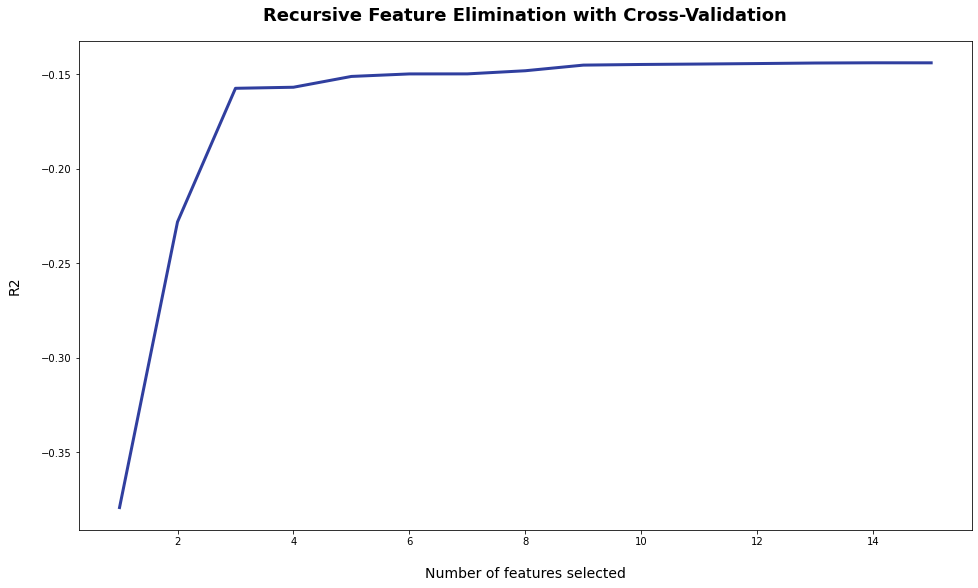

In [149]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('R2', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

In [150]:
rfecv_predictions = rfecv.predict(X_test)

rfecv_predictions_unscaled = np.exp(rfecv_predictions)
rfecv_predictions_unscaled = rfecv_predictions_unscaled.flatten().astype(int)

predicted_prices_rfecv = pd.DataFrame({"actual": test_actual, "predicted": rfecv_predictions_unscaled})

predicted_prices_rfecv

actual  predicted
0     422112     495660
1     644999     450682
2     570716     508344
3     402765     437700
4     543321     665330
...      ...        ...
3506  669547     483948
3507  346735     296817
3508  870435     797025
3509  446678     494617
3510  836620     986230

[3511 rows x 2 columns]

In [151]:
mae = round(mean_absolute_error(test_actual, rfecv_predictions_unscaled), 2)
mae

71119.79

In [152]:
rmse = round(np.sqrt(mean_squared_error(test_actual, rfecv_predictions_unscaled)), 2)
rmse

14258.98

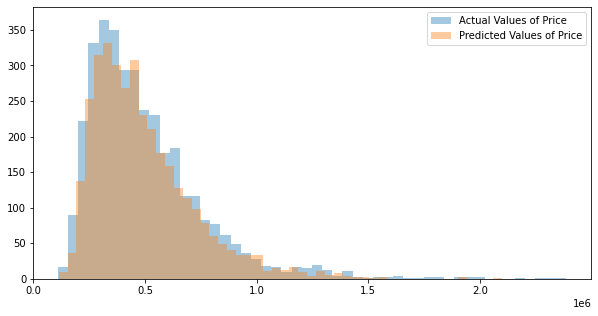

In [153]:
plt.figure(figsize=(10,5))
sns.distplot(np.exp(y_test), hist=True, kde=False)
sns.distplot(rfecv_predictions_unscaled, hist=True, kde=False)
plt.legend(labels=['Actual Values of Price', 'Predicted Values of Price'])
plt.xlim(0,);

In [154]:
models['Models'].append('RFECV')
models['r2'].append(r2)
models['mae'].append(mae)
models['rmse'].append(rmse)

### Visualizing R2 at different features selected (OLS LR)

In [155]:

# explore the number of selected features for RFE

# get a list of these_models to evaluate
def get_models():
    these_models = dict()
    for i in range(2, 16):
        rfe = RFE(estimator=LinearRegression(), n_features_to_select=i)
        these_models[str(i)] = rfe
    return these_models

# evaluate a given model using cross-validation and return r2 score for model
def evaluate_model(model, X, y):
    scores = cross_val_score(model, X, y, scoring='r2', cv=5, n_jobs=-1, error_score='raise')
    return scores

these_models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in these_models.items():
    scores = evaluate_model(model, X_train_val, y_train)
    results.append(scores)
    names.append(name)
    print('>%s features: %.3f R^squared' % (name, mean(scores)))



>2 features: 0.619 R^squared
>3 features: 0.809 R^squared
>4 features: 0.811 R^squared
>5 features: 0.824 R^squared
>6 features: 0.826 R^squared
>7 features: 0.827 R^squared
>8 features: 0.831 R^squared
>9 features: 0.837 R^squared
>10 features: 0.838 R^squared
>11 features: 0.838 R^squared
>12 features: 0.839 R^squared
>13 features: 0.839 R^squared
>14 features: 0.839 R^squared
>15 features: 0.839 R^squared


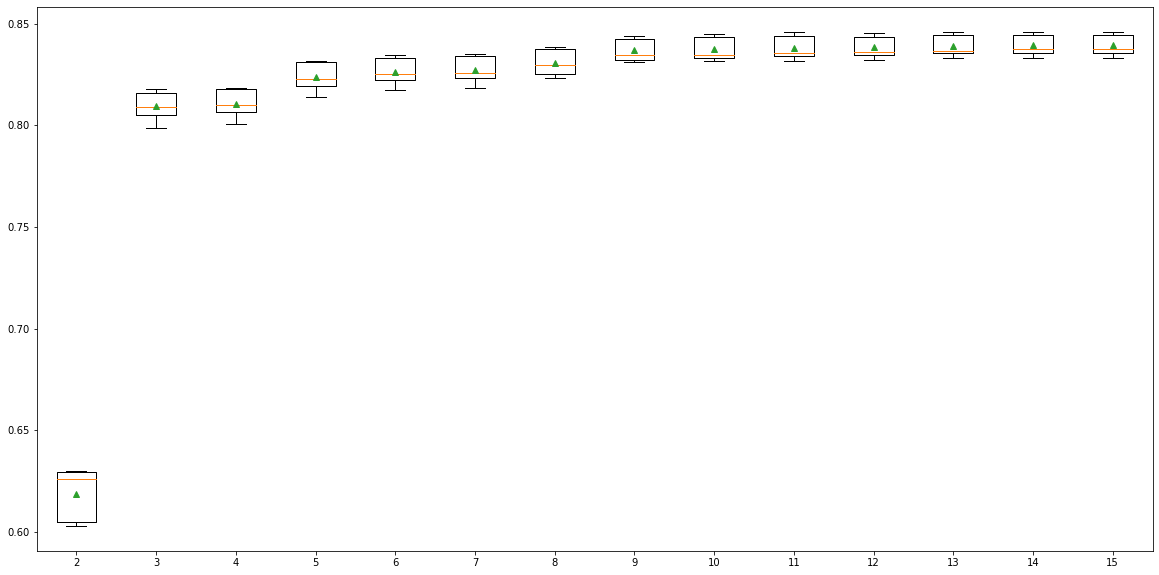

In [156]:
#plot model performance for comparison

fig = plt.figure(figsize=(20,10))
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

There isn't much improvement past 11 features.

In [157]:
model = LinearRegression()
cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)

rfe = RFE(estimator=LinearRegression(), n_features_to_select=11, step=1)

rfe.fit(X_train_val, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=11)

In [158]:
rfe_predictions = rfe.predict(X_test)

rfe_predictions_unscaled = np.exp(rfe_predictions)
rfe_predictions_unscaled = rfe_predictions_unscaled.flatten().astype(int)

predicted_prices_rfe = pd.DataFrame({"actual": test_actual, "predicted": rfe_predictions_unscaled})

predicted_prices_rfe

actual  predicted
0     422112     483104
1     644999     440966
2     570716     505260
3     402765     417852
4     543321     597089
...      ...        ...
3506  669547     436170
3507  346735     289351
3508  870435     696494
3509  446678     482616
3510  836620     954022

[3511 rows x 2 columns]

In [159]:
mae = round(mean_absolute_error(test_actual, rfe_predictions_unscaled), 2)
mae

76727.99

In [160]:
rmse = round(np.sqrt(mean_squared_error(test_actual, rfe_predictions_unscaled)), 2)
rmse

13864.49

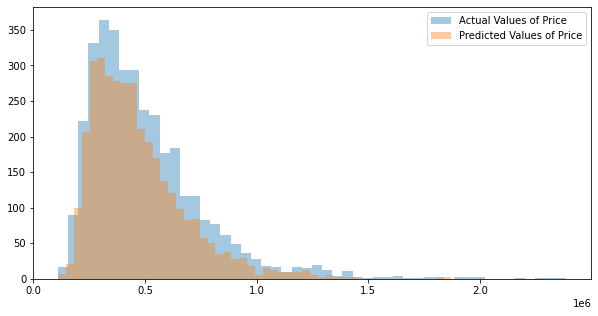

In [161]:
plt.figure(figsize=(10,5))
sns.distplot(np.exp(y_test), hist=True, kde=False)
sns.distplot(rfe_predictions_unscaled, hist=True, kde=False)
plt.legend(labels=['Actual Values of Price', 'Predicted Values of Price'])
plt.xlim(0,);

In [162]:
models['Models'].append('RFE')
models['r2'].append(r2)
models['mae'].append(mae)
models['rmse'].append(rmse)

## Custom LAD Regression Model

Least Absolute Deviations model (uses MAE to optimize model)

Written by Robert Kubler: https://towardsdatascience.com/build-your-own-custom-scikit-learn-regression-5d0d718f289

In [163]:
# Prepare our custom LAD regression, using the features recommended by our forward-backward feature selector

X_train_refined = X_train_val[result]
X_test_refined = X_test[result]

In [164]:
from scipy.optimize import minimize
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted

class LADRegression(BaseEstimator, RegressorMixin):
    def fit(self, X, y):
        X, y = check_X_y(X, y)
        
        d = X.shape[1]
        mae_loss = lambda coefs: np.mean(np.abs(y - X@coefs[:-1] - coefs[-1]))
        *self.coef_, self.intercept_ = minimize(mae_loss, x0=np.array((d+1)*[0.])).x # the heavy lifting
        
        return self
    
    def predict(self, X):
        check_is_fitted(self)
        X = check_array(X)
        
        return X@self.coef_ + self.intercept_

In [165]:
model = LADRegression()

model.fit(X_train_refined, y_train)

LADRegression()

In [166]:
cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)

cv_5 = cross_val_score(model, X_train_refined, y_train, cv=cv)
r2 = cv_5.mean()
r2

0.8390876624524128

In [167]:
predictions_LAD = model.predict(X_test_refined)
predictions_LAD_unscaled = np.exp(predictions_LAD)

In [168]:
mae = round(mean_absolute_error(test_actual, predictions_LAD_unscaled), 2)
mae

121847.77

In [169]:
rmse = round(np.sqrt(mean_squared_error(test_actual, predictions_LAD_unscaled)), 2)
rmse

172714.67

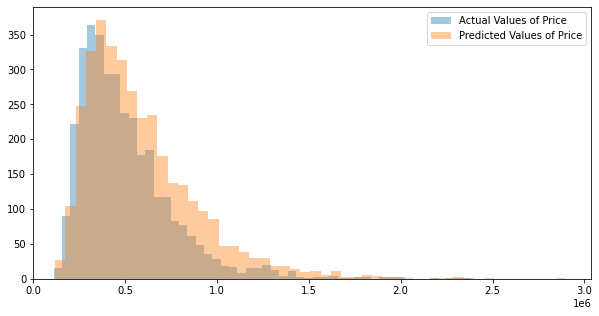

In [170]:
plt.figure(figsize=(10,5))
sns.distplot(np.exp(y_test), hist=True, kde=False)
sns.distplot(predictions_LAD_unscaled, hist=True, kde=False)
plt.legend(labels=['Actual Values of Price', 'Predicted Values of Price'])
plt.xlim(0,);

In [171]:
models['Models'].append('LAD Regression')
models['r2'].append(r2)
models['mae'].append(mae)
models['rmse'].append(rmse)

## Regularization models

### Lasso Regression

Lasso is a regularized model. These models try to simplify the model, in order to prevent overfitting, make the model more interpretable, and simplify feature selection. Lasso will try to solve the regression using fewer features in the final model, and therefore minimizing complexity. 

Lasso assigns penalties to strong coefficients that the model may overemphasize. Some coefficients therefore end up being reduced to 0, and removed from the model.

In [172]:
parameters = {'alpha':[1, 0.1, 0.001, 0.0005]}
lasso = Lasso()
grid = GridSearchCV(lasso, parameters, scoring='neg_mean_absolute_error',cv=5)
grid.fit(X_train_val, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1, 0.1, 0.001, 0.0005]},
             scoring='neg_mean_absolute_error')

In [173]:
print("Best parameters set found on train set: \n")
print(grid.best_params_)
print("\nGrid scores on train set:\n")
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
#y_true, y_pred = test_actual, np.exp(grid.predict(X_test))

Best parameters set found on train set: 

{'alpha': 0.0005}

Grid scores on train set:

-0.380 (+/-0.009) for {'alpha': 1}
-0.184 (+/-0.006) for {'alpha': 0.1}
-0.145 (+/-0.005) for {'alpha': 0.001}
-0.144 (+/-0.004) for {'alpha': 0.0005}


In [174]:
lasso = Lasso(alpha = [0.0005])
lasso.fit(X_train_val, y_train)
cv_5 = cross_val_score(lasso, X_train_refined, y_train, cv=5)
r2 = cv_5.mean()
r2

0.8385775878085736

In [175]:
coef = pd.Series(lasso.coef_, index = X_train_val.columns)

In [176]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 14 variables and eliminated the other 1 variables


In [177]:
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

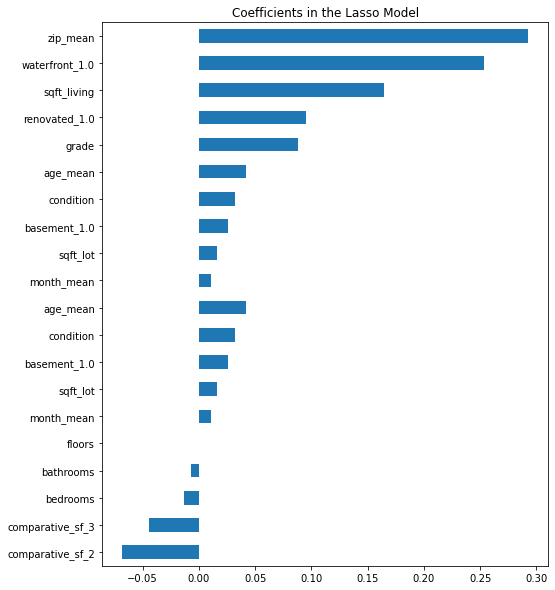

In [178]:
fig, ax = plt.subplots(1, 1, figsize=(8, 10))
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model");

In [179]:
predictions_lasso = lasso.predict(X_test)
predictions_lasso_unscaled = np.exp(predictions_lasso)

In [180]:
mae = round(mean_absolute_error(test_actual, predictions_lasso_unscaled), 2)
mae

71340.53

In [181]:
rmse = round(np.sqrt(mean_squared_error(test_actual, predictions_lasso_unscaled)), 2)
rmse

110384.21

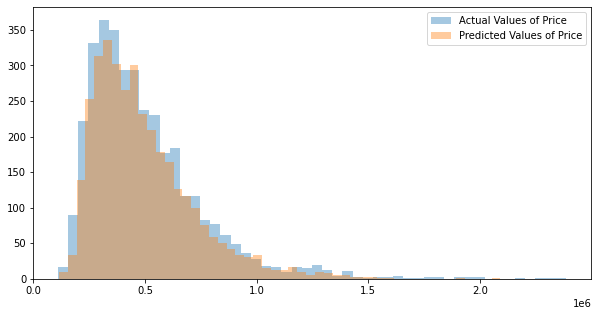

In [182]:
plt.figure(figsize=(10,5))
sns.distplot(np.exp(y_test), hist=True, kde=False)
sns.distplot(predictions_lasso_unscaled, hist=True, kde=False)
plt.legend(labels=['Actual Values of Price', 'Predicted Values of Price'])
plt.xlim(0,);

In [183]:
models['Models'].append('Lasso')
models['r2'].append(r2)
models['mae'].append(mae)
models['rmse'].append(rmse)

### Ridge Regression

Unlike Lasso,  Ridge does not seek to reduce coefficients. Like Lasso, it will penalize coefficients that the model overemphasizes.

In [184]:
parameters = {'alpha':[1, 0.1, 0.001, 0.0005]}
ridge = Ridge()
grid = GridSearchCV(ridge, parameters, scoring='neg_mean_absolute_error',cv=5)
grid.fit(X_train_val, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 0.1, 0.001, 0.0005]},
             scoring='neg_mean_absolute_error')

In [185]:
print("Best parameters set found on train set: \n")
print(grid.best_params_)
print("\nGrid scores on train set:\n")
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
#y_true, y_pred = test_actual, np.exp(grid.predict(X_test))

Best parameters set found on train set: 

{'alpha': 0.0005}

Grid scores on train set:

-0.144 (+/-0.004) for {'alpha': 1}
-0.144 (+/-0.004) for {'alpha': 0.1}
-0.144 (+/-0.004) for {'alpha': 0.001}
-0.144 (+/-0.004) for {'alpha': 0.0005}


In [186]:
ridge = Ridge(alpha = [0.0005])
ridge.fit(X_train_val, y_train)
cv_5 = cross_val_score(ridge, X_train_refined, y_train, cv=5)
r2 = cv_5.mean()
r2

0.8394045668818446

In [187]:
predictions_ridge = ridge.predict(X_test)
predictions_ridge_unscaled = np.exp(predictions_ridge)

In [188]:
print("Ridge picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Ridge picked 14 variables and eliminated the other 1 variables


In [189]:
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

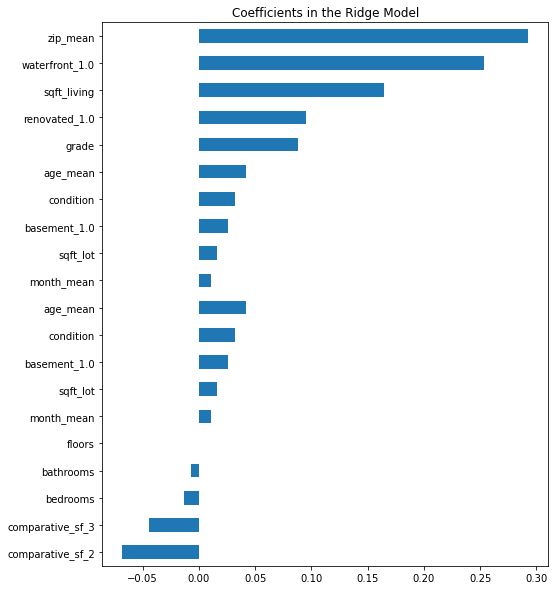

In [190]:
fig, ax = plt.subplots(1, 1, figsize=(8, 10))
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model");

In [191]:
mae = round(mean_absolute_error(test_actual, predictions_ridge_unscaled), 2)
mae

71128.22

In [192]:
rmse = round(np.sqrt(mean_squared_error(test_actual, predictions_ridge_unscaled)), 2)
rmse

109543.99

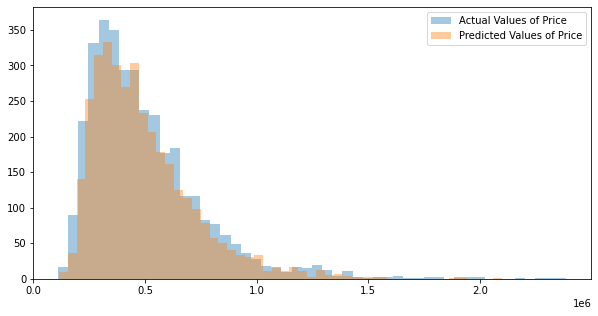

In [193]:
plt.figure(figsize=(10,5))
sns.distplot(np.exp(y_test), hist=True, kde=False)
sns.distplot(predictions_ridge_unscaled, hist=True, kde=False)
plt.legend(labels=['Actual Values of Price', 'Predicted Values of Price'])
plt.xlim(0,);

In [194]:
models['Models'].append('Ridge')
models['r2'].append(r2)
models['mae'].append(mae)
models['rmse'].append(rmse)

### Elastic Net Regression

Elastic Net is another regularlized model that uses elements of Lasso in penalizing over-emphasized coefficients, without eliminating any (is actually a combo of Lasso and Ridge, the latter of which penalizes coefficients in a different way from Lasso, but doesn't eliminate coefficients).

In [195]:
parameters = {'alpha':[1, 0.1, 0.001, 0.0005]}
elasticnet = ElasticNet()
grid = GridSearchCV(elasticnet, parameters, scoring='neg_mean_absolute_error',cv=5)
grid.fit(X_train_val, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1, 0.1, 0.001, 0.0005]},
             scoring='neg_mean_absolute_error')

In [196]:
print("Best parameters set found on train set: \n")
print(grid.best_params_)
print("\nGrid scores on train set:\n")
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
#y_true, y_pred = test_actual, np.exp(grid.predict(X_test))

Best parameters set found on train set: 

{'alpha': 0.0005}

Grid scores on train set:

-0.380 (+/-0.009) for {'alpha': 1}
-0.164 (+/-0.005) for {'alpha': 0.1}
-0.144 (+/-0.004) for {'alpha': 0.001}
-0.144 (+/-0.004) for {'alpha': 0.0005}


In [197]:
elasticnet = ElasticNet(alpha = [0.0005])
elasticnet.fit(X_train_val, y_train)
cv_5 = cross_val_score(elasticnet, X_train_refined, y_train, cv=5)
r2 = cv_5.mean()
r2

0.8390527867384214

In [198]:
predictions_elastic = elasticnet.predict(X_test)
predictions_elastic_unscaled = np.exp(predictions_elastic)

In [199]:
coef = pd.Series(elasticnet.coef_, index = X_train_val.columns)

In [200]:
print("Elastic Net picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Elastic Net picked 15 variables and eliminated the other 0 variables


In [201]:
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

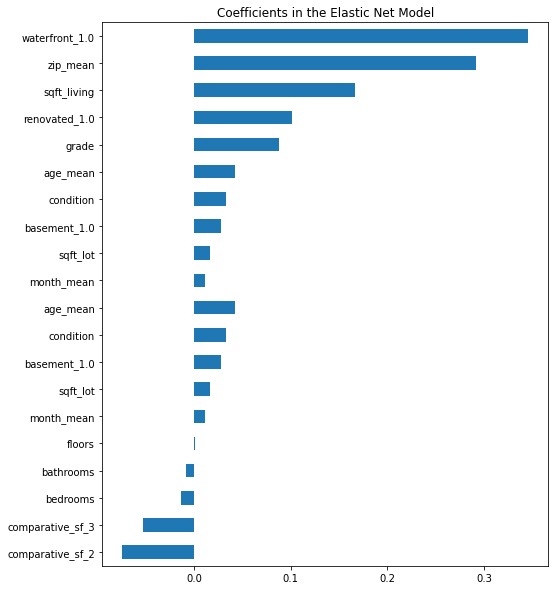

In [202]:
fig, ax = plt.subplots(1, 1, figsize=(8, 10))
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Elastic Net Model");

In [203]:
mae = round(mean_absolute_error(test_actual, predictions_elastic_unscaled), 2)
mae

71262.39

In [204]:
rmse = round(np.sqrt(mean_squared_error(test_actual, predictions_elastic_unscaled)), 2)
rmse

109982.59

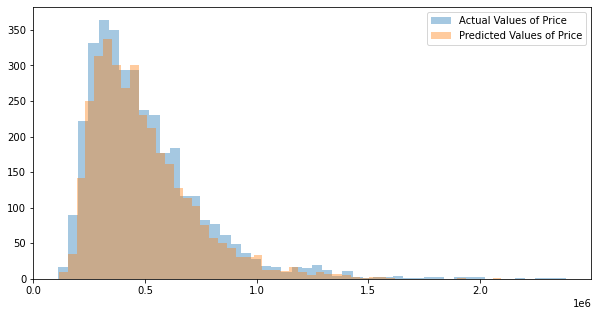

In [205]:
plt.figure(figsize=(10,5))
sns.distplot(np.exp(y_test), hist=True, kde=False)
sns.distplot(predictions_elastic_unscaled, hist=True, kde=False)
plt.legend(labels=['Actual Values of Price', 'Predicted Values of Price'])
plt.xlim(0,);

In [206]:
models['Models'].append('Elastic Net')
models['r2'].append(r2)
models['mae'].append(mae)
models['rmse'].append(rmse)

## K-Nearest Neighbors Model

K-Nearest Neighbors is more commonly used for classification. Its basic premise is to determine "what is this like" in making a prediction, by looking at other things that are close in value/type. We can pick how many neighbors it assesses to make a classification. As we will see, it doesn't work very well for this type of application (or, I've not tuned the hyperparameters properly and/or don't know how to use it well).

In [207]:
mae_val = [] #to store rmse values for different k

for K in range(20):
    K = K+1
    
    # set up the KNN regressor
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train_val, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = mean_absolute_error(y_test,pred) #calculate rmse
    mae_val.append(error) #store mae values
    print('MAE value for k= ' , K , 'is:', error)

MAE value for k=  1 is: 0.2107502823234029
MAE value for k=  2 is: 0.18403173485632157
MAE value for k=  3 is: 0.1756988072300567
MAE value for k=  4 is: 0.17069823632479564
MAE value for k=  5 is: 0.16596148026335744
MAE value for k=  6 is: 0.1645802520678421
MAE value for k=  7 is: 0.16344671743359307
MAE value for k=  8 is: 0.16170239524903116
MAE value for k=  9 is: 0.16125478596013573
MAE value for k=  10 is: 0.16104366372681375
MAE value for k=  11 is: 0.1605409398268969
MAE value for k=  12 is: 0.1601072987431173
MAE value for k=  13 is: 0.1598645054692963
MAE value for k=  14 is: 0.15979865142916813
MAE value for k=  15 is: 0.1597992545643333
MAE value for k=  16 is: 0.1602437317861522
MAE value for k=  17 is: 0.16006905228215046
MAE value for k=  18 is: 0.16009980575688487
MAE value for k=  19 is: 0.15996017444901156
MAE value for k=  20 is: 0.16010387385362532


In [208]:
index_min = np.argmin(mae_val) + 1

In [209]:
model = neighbors.KNeighborsRegressor(n_neighbors = index_min)
model.fit(X_train_val, y_train)  #fit the model
pred_knn = model.predict(X_test) #make prediction on test set
pred_knn = np.exp(pred_knn)

In [210]:
scores = cross_val_score(model, X_train_val, y_train, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
r2 = np.mean(scores)
r2

0.8171578589073112

In [211]:
mae = round(mean_absolute_error(test_actual, pred_knn), 2)
mae

83975.73

In [212]:
rmse = round(np.sqrt(mean_squared_error(test_actual, pred_knn)), 2)
rmse

139379.02

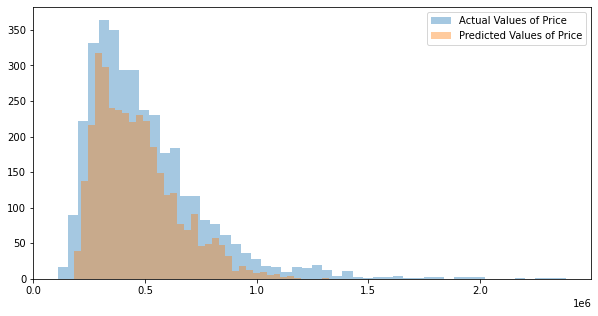

In [213]:
plt.figure(figsize=(10,5))
sns.distplot(np.exp(y_test), hist=True, kde=False)
sns.distplot(pred_knn, hist=True, kde=False)
plt.legend(labels=['Actual Values of Price', 'Predicted Values of Price'])
plt.xlim(0,);

In [214]:
models['Models'].append('KNN')
models['r2'].append(r2)
models['mae'].append(mae)
models['rmse'].append(rmse)

## Support Vector Regression

Support vector regression is a form of regression that allows us to define the acceptable error in our model and then finds the line that best fits that data, according to our specifications. This is really useful with something like housing price predictions, where we are ok with our prediction being within a certain dollar amount. SVR will attempt to get all of the predictions within that dollar amount when possible. This will result in a fit line that is different than a linear regression would have produced, but should result in a lower absolute error, which is a reasonable scoring metric for housing price predictions.

We're going to use sklearn's GridSearchCV to find the optimal hyperparameters to use with our SVM! Here are the parameters we are trying out:

* kernel: linear is parametric, and rbf is non-parametric. One of these should perform better. Our data is not totally normal, so it might be rbf.
* epsilon: This value is how much error we're ok with accepting without assigning a penalty to the model
* C: The error that we will accept from a point outside our epsilon

Our C and epsilon need to be in scale with our output variable, which is our log-transformed price.


In [215]:
param_grid = [
    {'kernel' : ['linear', 'rbf'], 'C' : [1, 3, 5], 'epsilon' : [.1, .5, 1]} ]

Running this GridSearch took about 90 minutes, so we commented it out after running the first time

In [216]:
#svr = SVR()
#grid = GridSearchCV(svr, param_grid, scoring='neg_mean_absolute_error', cv=5)
#grid.fit(X_train_val, y_train)

The following cannot produce results with the above commented out, but results have been replicated in the markdown following.

In [217]:
'''
print("Best parameters set found on train set: \n")
print(grid.best_params_)
print("\nGrid scores on train set:\n")
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
y_true, y_pred = test_actual, np.exp(grid.predict(X_test))
'''

'\nprint("Best parameters set found on train set: \n")\nprint(grid.best_params_)\nprint("\nGrid scores on train set:\n")\nmeans = grid.cv_results_[\'mean_test_score\']\nstds = grid.cv_results_[\'std_test_score\']\nfor mean, std, params in zip(means, stds, grid.cv_results_[\'params\']):\n    print("%0.3f (+/-%0.03f) for %r"\n              % (mean, std * 2, params))\ny_true, y_pred = test_actual, np.exp(grid.predict(X_test))\n'

Best parameters set found on train set: 

{'C': 1, 'epsilon': 0.1, 'kernel': 'rbf'}

Grid scores on train set:

-0.137 (+/-0.004) for {'C': 1, 'epsilon': 0.1, 'kernel': 'linear'}
-0.123 (+/-0.005) for {'C': 1, 'epsilon': 0.1, 'kernel': 'rbf'}
-0.150 (+/-0.005) for {'C': 1, 'epsilon': 0.5, 'kernel': 'linear'}
-0.164 (+/-0.005) for {'C': 1, 'epsilon': 0.5, 'kernel': 'rbf'}
-0.277 (+/-0.014) for {'C': 1, 'epsilon': 1, 'kernel': 'linear'}
-0.306 (+/-0.009) for {'C': 1, 'epsilon': 1, 'kernel': 'rbf'}
-0.137 (+/-0.004) for {'C': 3, 'epsilon': 0.1, 'kernel': 'linear'}
-0.126 (+/-0.005) for {'C': 3, 'epsilon': 0.1, 'kernel': 'rbf'}
-0.151 (+/-0.005) for {'C': 3, 'epsilon': 0.5, 'kernel': 'linear'}
-0.166 (+/-0.005) for {'C': 3, 'epsilon': 0.5, 'kernel': 'rbf'}
-0.277 (+/-0.014) for {'C': 3, 'epsilon': 1, 'kernel': 'linear'}
-0.306 (+/-0.009) for {'C': 3, 'epsilon': 1, 'kernel': 'rbf'}
-0.137 (+/-0.004) for {'C': 5, 'epsilon': 0.1, 'kernel': 'linear'}
-0.129 (+/-0.005) for {'C': 5, 'epsilon': 0.1, 'kernel': 'rbf'}
-0.151 (+/-0.004) for {'C': 5, 'epsilon': 0.5, 'kernel': 'linear'}
-0.166 (+/-0.006) for {'C': 5, 'epsilon': 0.5, 'kernel': 'rbf'}
-0.277 (+/-0.014) for {'C': 5, 'epsilon': 1, 'kernel': 'linear'}
-0.306 (+/-0.009) for {'C': 5, 'epsilon': 1, 'kernel': 'rbf'}

In [218]:
params = {'kernel' : 'rbf', 'C' : 1, 'epsilon' : .1}
svr = SVR(**params)

svr.fit(X_train_val, y_train)

#cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
# commented out because it takes forever to run and doing a simple cv-5

cv_5 = cross_val_score(svr, X_train_val, y_train, cv=5)
r2 = cv_5.mean()
r2

0.8572533059926524

In [219]:
predictions_SVR = svr.predict(X_test)
predictions_SVR_unscaled = np.exp(predictions_SVR)
residuals= predictions_SVR_unscaled - test_actual

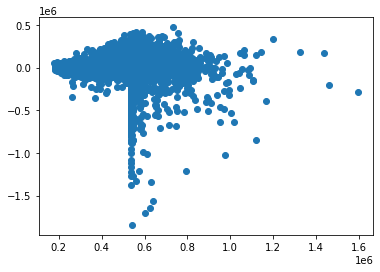

In [220]:
plt.scatter(predictions_SVR_unscaled, residuals)

# our residuals show some heteroskedasticity
# but our model's Durbin-Watson score falls between 1 and 2, which is still acceptable
# Just BARELY - at 1.983

In [221]:
mae = round(mean_absolute_error(test_actual, predictions_SVR_unscaled), 2)
mae

139660.7

In [222]:
rmse = round(np.sqrt(mean_squared_error(test_actual, predictions_SVR_unscaled)), 2)
rmse

208282.19

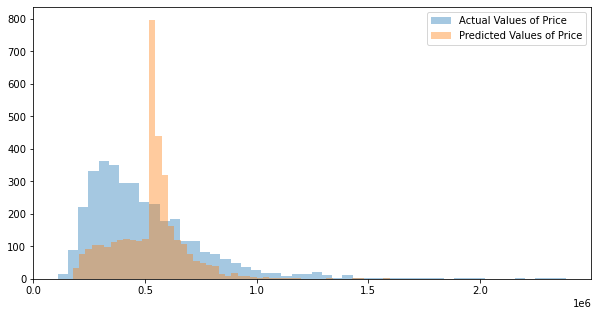

In [223]:
plt.figure(figsize=(10,5))
sns.distplot(np.exp(y_test), hist=True, kde=False)
sns.distplot(predictions_SVR_unscaled, hist=True, kde=False)
plt.legend(labels=['Actual Values of Price', 'Predicted Values of Price'])
plt.xlim(0,);

In [224]:
models['Models'].append('SVR')
models['r2'].append(r2)
models['mae'].append(mae)
models['rmse'].append(rmse)

## Gradient Boosting Regressor

Gradient Boosting performs best with optimal parameter tuning. We're going to use sklearn's GridSearchCV to find the optimal hyperparameters to use with our gradient booster! Here are the parameters we are trying out:

* Loss: Loss function to be optimized. We are using lad for all of these, which is least absolute deviation
* n_estimators: Number of boosts to perform. Gradient boosting is, according to sklearn, pretty robust to over-fitting so more is usually better
* max_depth: This determines how many tree nodes the estimator looks at before making a prediction. We don't know what is best here, but I read with high-cardinality variables that 4-8 is usually good, so we are trying everything from 3-8 to see what works the best
* learning_rate: Tuning this setting alters how much the model corrects after it runs a boost. .1 is a common rate and we will test a lower and higher rate as well.

In [225]:
param_grid = [
    {'loss': ['lad'], 'n_estimators' : [250, 500],'max_depth' : [3, 5, 7, 9, 13, 15], 'learning_rate': [.05, .1, .3]}] # 

Running this GridSearch took a while, so we commented it out

In [226]:
#model = GradientBoostingRegressor()
#grid = GridSearchCV(model, param_grid, scoring='neg_mean_absolute_error', cv=5)
#grid.fit(X_train_val, y_train)

The following cannot produce results with the above commented out, but results have been replicated in the markdown following.

In [227]:
'''
print("Best parameters set found on train set: \n")
print(grid.best_params_)
print("\nGrid scores on train set:\n")
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
y_true, y_pred = test_actual, np.exp(grid.predict(X_test))
'''

'\nprint("Best parameters set found on train set: \n")\nprint(grid.best_params_)\nprint("\nGrid scores on train set:\n")\nmeans = grid.cv_results_[\'mean_test_score\']\nstds = grid.cv_results_[\'std_test_score\']\nfor mean, std, params in zip(means, stds, grid.cv_results_[\'params\']):\n    print("%0.3f (+/-%0.03f) for %r"\n              % (mean, std * 2, params))\ny_true, y_pred = test_actual, np.exp(grid.predict(X_test))\n'

Best parameters set found on train set: 

{'learning_rate': 0.1, 'loss': 'lad', 'max_depth': 7, 'n_estimators': 500}

Grid scores on train set:

-0.133 (+/-0.005) for {'learning_rate': 0.05, 'loss': 'lad', 'max_depth': 3, 'n_estimators': 250}
-0.128 (+/-0.006) for {'learning_rate': 0.05, 'loss': 'lad', 'max_depth': 3, 'n_estimators': 500}
-0.127 (+/-0.006) for {'learning_rate': 0.05, 'loss': 'lad', 'max_depth': 5, 'n_estimators': 250}
-0.126 (+/-0.005) for {'learning_rate': 0.05, 'loss': 'lad', 'max_depth': 5, 'n_estimators': 500}
-0.125 (+/-0.006) for {'learning_rate': 0.05, 'loss': 'lad', 'max_depth': 7, 'n_estimators': 250}
-0.125 (+/-0.005) for {'learning_rate': 0.05, 'loss': 'lad', 'max_depth': 7, 'n_estimators': 500}
-0.125 (+/-0.005) for {'learning_rate': 0.05, 'loss': 'lad', 'max_depth': 9, 'n_estimators': 250}
-0.125 (+/-0.005) for {'learning_rate': 0.05, 'loss': 'lad', 'max_depth': 9, 'n_estimators': 500}
-0.128 (+/-0.006) for {'learning_rate': 0.05, 'loss': 'lad', 'max_depth': 13, 'n_estimators': 250}
-0.128 (+/-0.005) for {'learning_rate': 0.05, 'loss': 'lad', 'max_depth': 13, 'n_estimators': 500}
-0.128 (+/-0.005) for {'learning_rate': 0.05, 'loss': 'lad', 'max_depth': 15, 'n_estimators': 250}
-0.128 (+/-0.005) for {'learning_rate': 0.05, 'loss': 'lad', 'max_depth': 15, 'n_estimators': 500}
-0.128 (+/-0.006) for {'learning_rate': 0.1, 'loss': 'lad', 'max_depth': 3, 'n_estimators': 250}
-0.126 (+/-0.006) for {'learning_rate': 0.1, 'loss': 'lad', 'max_depth': 3, 'n_estimators': 500}
-0.125 (+/-0.006) for {'learning_rate': 0.1, 'loss': 'lad', 'max_depth': 5, 'n_estimators': 250}
-0.125 (+/-0.006) for {'learning_rate': 0.1, 'loss': 'lad', 'max_depth': 5, 'n_estimators': 500}
-0.125 (+/-0.004) for {'learning_rate': 0.1, 'loss': 'lad', 'max_depth': 7, 'n_estimators': 250}
-0.125 (+/-0.005) for {'learning_rate': 0.1, 'loss': 'lad', 'max_depth': 7, 'n_estimators': 500}
-0.126 (+/-0.006) for {'learning_rate': 0.1, 'loss': 'lad', 'max_depth': 9, 'n_estimators': 250}
-0.126 (+/-0.006) for {'learning_rate': 0.1, 'loss': 'lad', 'max_depth': 9, 'n_estimators': 500}
-0.129 (+/-0.003) for {'learning_rate': 0.1, 'loss': 'lad', 'max_depth': 13, 'n_estimators': 250}
-0.129 (+/-0.006) for {'learning_rate': 0.1, 'loss': 'lad', 'max_depth': 13, 'n_estimators': 500}
-0.130 (+/-0.005) for {'learning_rate': 0.1, 'loss': 'lad', 'max_depth': 15, 'n_estimators': 250}
-0.130 (+/-0.005) for {'learning_rate': 0.1, 'loss': 'lad', 'max_depth': 15, 'n_estimators': 500}
-0.127 (+/-0.005) for {'learning_rate': 0.3, 'loss': 'lad', 'max_depth': 3, 'n_estimators': 250}
-0.127 (+/-0.006) for {'learning_rate': 0.3, 'loss': 'lad', 'max_depth': 3, 'n_estimators': 500}
-0.126 (+/-0.005) for {'learning_rate': 0.3, 'loss': 'lad', 'max_depth': 5, 'n_estimators': 250}
-0.127 (+/-0.005) for {'learning_rate': 0.3, 'loss': 'lad', 'max_depth': 5, 'n_estimators': 500}
-0.127 (+/-0.005) for {'learning_rate': 0.3, 'loss': 'lad', 'max_depth': 7, 'n_estimators': 250}
-0.127 (+/-0.005) for {'learning_rate': 0.3, 'loss': 'lad', 'max_depth': 7, 'n_estimators': 500}
-0.130 (+/-0.006) for {'learning_rate': 0.3, 'loss': 'lad', 'max_depth': 9, 'n_estimators': 250}
-0.129 (+/-0.006) for {'learning_rate': 0.3, 'loss': 'lad', 'max_depth': 9, 'n_estimators': 500}
-0.135 (+/-0.005) for {'learning_rate': 0.3, 'loss': 'lad', 'max_depth': 13, 'n_estimators': 250}
-0.134 (+/-0.004) for {'learning_rate': 0.3, 'loss': 'lad', 'max_depth': 13, 'n_estimators': 500}
-0.136 (+/-0.005) for {'learning_rate': 0.3, 'loss': 'lad', 'max_depth': 15, 'n_estimators': 250}
-0.137 (+/-0.005) for {'learning_rate': 0.3, 'loss': 'lad', 'max_depth': 15, 'n_estimators': 500}

Having found the optimal n_estimators, max_depth and learning_rate with our GridSearchCV, we run our regressor on the train_val set with the chosen options.

In [228]:
params = {'loss': 'lad', 'n_estimators': 500, 'max_depth': 7, 'learning_rate': .1}  
model = GradientBoostingRegressor(**params)

model.fit(X_train_val, y_train)

cv_5 = cross_val_score(model, X_train_val, y_train, cv=5)
r2 = cv_5.mean()
r2

0.8744352561869858

In [229]:
# apply our model to our test set and get predicted values
gradient_boosted_preds = np.exp(model.predict(X_test))

# compare our predicted values to the actual values
predicted_prices_gradientboost = pd.DataFrame({"Actual": test_actual, "Predicted": gradient_boosted_preds})
predicted_prices_gradientboost

Actual     Predicted
0     422112  4.726948e+05
1     644999  4.834437e+05
2     570716  5.139296e+05
3     402765  4.124004e+05
4     543321  6.022160e+05
...      ...           ...
3506  669547  4.875120e+05
3507  346735  3.318420e+05
3508  870435  8.103588e+05
3509  446678  4.623326e+05
3510  836620  1.083410e+06

[3511 rows x 2 columns]

In [230]:
# Calculate our mean absolute error

mae = round(mean_absolute_error(test_actual, gradient_boosted_preds), 2)
mae

64317.18

In [231]:
rmse = round(np.sqrt(mean_squared_error(test_actual, gradient_boosted_preds)), 2)
rmse

101804.06

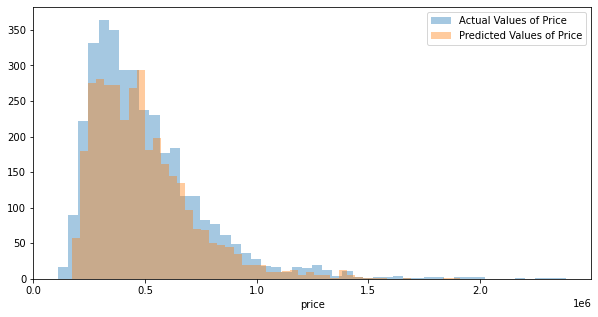

In [232]:
plt.figure(figsize=(10,5))
sns.distplot(test_actual, hist=True, kde=False)
sns.distplot(gradient_boosted_preds, hist=True, kde=False)
plt.legend(labels=['Actual Values of Price', 'Predicted Values of Price'])
plt.xlim(0,);

In [233]:
models['Models'].append('Gradient Boosting')
models['r2'].append(r2)
models['mae'].append(mae)
models['rmse'].append(rmse)

## Random Forest Regressor

In [234]:
param_grid = [
    {'bootstrap': [True, False], 'n_estimators' : [100, 250],'max_depth' : [10, 15, 20], 'max_features': ['auto'], 'min_samples_leaf': [.005, .01], 'min_samples_split': [.005, .01]}
]

Grid Search for optimal parameters. Took a long time to run, so commented out after storing results.

In [235]:
#model = RandomForestRegressor()
#grid = GridSearchCV(model, param_grid, scoring='neg_mean_absolute_error', cv=5)
#grid.fit(X_train_val, y_train)

In [236]:
'''
print("Best parameters set found on train set: \n")
print(grid.best_params_)
print("\nGrid scores on train set:\n")
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
#y_true, y_pred = test_actual, np.exp(grid.predict(X_test))
'''

'\nprint("Best parameters set found on train set: \n")\nprint(grid.best_params_)\nprint("\nGrid scores on train set:\n")\nmeans = grid.cv_results_[\'mean_test_score\']\nstds = grid.cv_results_[\'std_test_score\']\nfor mean, std, params in zip(means, stds, grid.cv_results_[\'params\']):\n    print("%0.3f (+/-%0.03f) for %r"\n              % (mean, std * 2, params))\n#y_true, y_pred = test_actual, np.exp(grid.predict(X_test))\n'

Best parameters set found on train set: 

{'bootstrap': True, 'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 0.005, 'min_samples_split': 0.01, 'n_estimators': 100}

Grid scores on train set:

-0.145 (+/-0.005) for {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 0.005, 'min_samples_split': 0.005, 'n_estimators': 100}
-0.145 (+/-0.005) for {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 0.005, 'min_samples_split': 0.005, 'n_estimators': 250}
-0.145 (+/-0.005) for {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 0.005, 'min_samples_split': 0.01, 'n_estimators': 100}
-0.145 (+/-0.005) for {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 0.005, 'min_samples_split': 0.01, 'n_estimators': 250}
-0.151 (+/-0.005) for {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 0.01, 'min_samples_split': 0.005, 'n_estimators': 100}
-0.151 (+/-0.005) for {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 0.01, 'min_samples_split': 0.005, 'n_estimators': 250}
-0.151 (+/-0.005) for {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 0.01, 'min_samples_split': 0.01, 'n_estimators': 100}
-0.151 (+/-0.005) for {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 0.01, 'min_samples_split': 0.01, 'n_estimators': 250}
-0.145 (+/-0.005) for {'bootstrap': True, 'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 0.005, 'min_samples_split': 0.005, 'n_estimators': 100}
-0.145 (+/-0.005) for {'bootstrap': True, 'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 0.005, 'min_samples_split': 0.005, 'n_estimators': 250}
-0.145 (+/-0.005) for {'bootstrap': True, 'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 0.005, 'min_samples_split': 0.01, 'n_estimators': 100}
-0.145 (+/-0.005) for {'bootstrap': True, 'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 0.005, 'min_samples_split': 0.01, 'n_estimators': 250}
-0.151 (+/-0.005) for {'bootstrap': True, 'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 0.01, 'min_samples_split': 0.005, 'n_estimators': 100}
-0.151 (+/-0.005) for {'bootstrap': True, 'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 0.01, 'min_samples_split': 0.005, 'n_estimators': 250}
-0.151 (+/-0.005) for {'bootstrap': True, 'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 0.01, 'min_samples_split': 0.01, 'n_estimators': 100}
-0.151 (+/-0.005) for {'bootstrap': True, 'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 0.01, 'min_samples_split': 0.01, 'n_estimators': 250}
-0.145 (+/-0.005) for {'bootstrap': True, 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 0.005, 'min_samples_split': 0.005, 'n_estimators': 100}
-0.145 (+/-0.005) for {'bootstrap': True, 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 0.005, 'min_samples_split': 0.005, 'n_estimators': 250}
-0.145 (+/-0.005) for {'bootstrap': True, 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 0.005, 'min_samples_split': 0.01, 'n_estimators': 100}
-0.145 (+/-0.005) for {'bootstrap': True, 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 0.005, 'min_samples_split': 0.01, 'n_estimators': 250}
-0.151 (+/-0.005) for {'bootstrap': True, 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 0.01, 'min_samples_split': 0.005, 'n_estimators': 100}
-0.151 (+/-0.005) for {'bootstrap': True, 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 0.01, 'min_samples_split': 0.005, 'n_estimators': 250}
-0.151 (+/-0.005) for {'bootstrap': True, 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 0.01, 'min_samples_split': 0.01, 'n_estimators': 100}
-0.151 (+/-0.005) for {'bootstrap': True, 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 0.01, 'min_samples_split': 0.01, 'n_estimators': 250}
-0.150 (+/-0.005) for {'bootstrap': False, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 0.005, 'min_samples_split': 0.005, 'n_estimators': 100}
-0.150 (+/-0.005) for {'bootstrap': False, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 0.005, 'min_samples_split': 0.005, 'n_estimators': 250}
-0.150 (+/-0.005) for {'bootstrap': False, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 0.005, 'min_samples_split': 0.01, 'n_estimators': 100}
-0.150 (+/-0.005) for {'bootstrap': False, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 0.005, 'min_samples_split': 0.01, 'n_estimators': 250}
-0.155 (+/-0.005) for {'bootstrap': False, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 0.01, 'min_samples_split': 0.005, 'n_estimators': 100}
-0.155 (+/-0.005) for {'bootstrap': False, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 0.01, 'min_samples_split': 0.005, 'n_estimators': 250}
-0.155 (+/-0.005) for {'bootstrap': False, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 0.01, 'min_samples_split': 0.01, 'n_estimators': 100}
-0.155 (+/-0.005) for {'bootstrap': False, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 0.01, 'min_samples_split': 0.01, 'n_estimators': 250}
-0.150 (+/-0.006) for {'bootstrap': False, 'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 0.005, 'min_samples_split': 0.005, 'n_estimators': 100}
-0.150 (+/-0.006) for {'bootstrap': False, 'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 0.005, 'min_samples_split': 0.005, 'n_estimators': 250}
-0.150 (+/-0.006) for {'bootstrap': False, 'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 0.005, 'min_samples_split': 0.01, 'n_estimators': 100}
-0.150 (+/-0.006) for {'bootstrap': False, 'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 0.005, 'min_samples_split': 0.01, 'n_estimators': 250}
-0.155 (+/-0.005) for {'bootstrap': False, 'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 0.01, 'min_samples_split': 0.005, 'n_estimators': 100}
-0.155 (+/-0.005) for {'bootstrap': False, 'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 0.01, 'min_samples_split': 0.005, 'n_estimators': 250}
-0.155 (+/-0.005) for {'bootstrap': False, 'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 0.01, 'min_samples_split': 0.01, 'n_estimators': 100}
-0.155 (+/-0.005) for {'bootstrap': False, 'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 0.01, 'min_samples_split': 0.01, 'n_estimators': 250}
-0.150 (+/-0.006) for {'bootstrap': False, 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 0.005, 'min_samples_split': 0.005, 'n_estimators': 100}
-0.150 (+/-0.006) for {'bootstrap': False, 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 0.005, 'min_samples_split': 0.005, 'n_estimators': 250}
-0.150 (+/-0.006) for {'bootstrap': False, 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 0.005, 'min_samples_split': 0.01, 'n_estimators': 100}
-0.150 (+/-0.006) for {'bootstrap': False, 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 0.005, 'min_samples_split': 0.01, 'n_estimators': 250}
-0.155 (+/-0.005) for {'bootstrap': False, 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 0.01, 'min_samples_split': 0.005, 'n_estimators': 100}
-0.155 (+/-0.005) for {'bootstrap': False, 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 0.01, 'min_samples_split': 0.005, 'n_estimators': 250}
-0.155 (+/-0.005) for {'bootstrap': False, 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 0.01, 'min_samples_split': 0.01, 'n_estimators': 100}
-0.155 (+/-0.005) for {'bootstrap': False, 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 0.01, 'min_samples_split': 0.01, 'n_estimators': 250}

In [237]:
params = {'bootstrap': True, 'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 0.005, 'min_samples_split': 0.01, 'n_estimators': 100}  
model = RandomForestRegressor(**params)

model.fit(X_train_val, y_train)

cv_5 = cross_val_score(model, X_train_val, y_train, cv=5)
r2 = cv_5.mean()
r2

0.8426956044605008

In [238]:
# apply our model to our test set and get predicted values
forest_predictions = model.predict(X_test)
forest_predictions = np.exp(forest_predictions).astype(int)

# compare our predicted values to the actual values
predicted_prices_gradientboost = pd.DataFrame({"Actual": test_actual, "Predicted": forest_predictions})
predicted_prices_gradientboost

Actual  Predicted
0     422112     443842
1     644999     444271
2     570716     464797
3     402765     431487
4     543321     582811
...      ...        ...
3506  669547     455225
3507  346735     294021
3508  870435     786994
3509  446678     474616
3510  836620    1024517

[3511 rows x 2 columns]

In [239]:
# Calculate our mean absolute error

mae = round(mean_absolute_error(test_actual, forest_predictions), 2)
mae

72733.81

In [240]:
rmse = round(np.sqrt(mean_squared_error(test_actual, forest_predictions)), 2)
rmse

14563.44

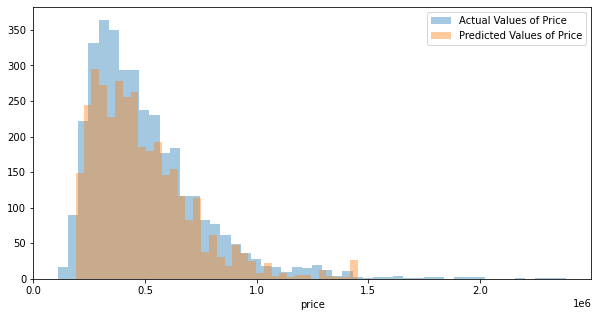

In [241]:
plt.figure(figsize=(10,5))
sns.distplot(test_actual, hist=True, kde=False)
sns.distplot(forest_predictions, hist=True, kde=False)
plt.legend(labels=['Actual Values of Price', 'Predicted Values of Price'])
plt.xlim(0,);

In [242]:
models['Models'].append('Random Forest')
models['r2'].append(r2)
models['mae'].append(mae)
models['rmse'].append(rmse)

In [243]:
'''from sklearn.model_selection import validation_curve
def ValidationCurve(estimator, predictors, target, param_name, hyperparam):
    
    train_score, test_score = validation_curve(estimator, predictors, target, param_name, np.arange(5,20), cv=5, scoring='r2')
    Rsqaured_train = train_score.mean(axis=1)
    Rsquared_test= test_score.mean(axis=1)
    
    plt.figure(figsize=(10,5))
    plt.plot(np.arange(5,20), Rsqaured_train, color='r', linestyle='-', marker='o', label='Training Set')
    plt.plot(np.arange(5,20), Rsquared_test, color='b', linestyle='-', marker='x', label='Testing Set')
    plt.legend(labels=['Training Set', 'Testing Set'])
    plt.xlabel(hyperparam)
    plt.ylabel('R_squared')
    
ValidationCurve(RandomForestRegressor(), X_train_val, y_train, 'max_depth', 'Maximum Depth')'''

"from sklearn.model_selection import validation_curve\ndef ValidationCurve(estimator, predictors, target, param_name, hyperparam):\n    \n    train_score, test_score = validation_curve(estimator, predictors, target, param_name, np.arange(5,20), cv=5, scoring='r2')\n    Rsqaured_train = train_score.mean(axis=1)\n    Rsquared_test= test_score.mean(axis=1)\n    \n    plt.figure(figsize=(10,5))\n    plt.plot(np.arange(5,20), Rsqaured_train, color='r', linestyle='-', marker='o', label='Training Set')\n    plt.plot(np.arange(5,20), Rsquared_test, color='b', linestyle='-', marker='x', label='Testing Set')\n    plt.legend(labels=['Training Set', 'Testing Set'])\n    plt.xlabel(hyperparam)\n    plt.ylabel('R_squared')\n    \nValidationCurve(RandomForestRegressor(), X_train_val, y_train, 'max_depth', 'Maximum Depth')"

# Visualizations with Geopandas

We're going to use the Geopandas library and publicly available GIS maps to visualize the importance of location as a feature.

In [244]:
# reading in our downloaded shape files for king county, downloaded from the king county public GIS site

# we're loading this in as a geopandas data frame, which will read similar to a pandas data frame, but is different!

king_county_surrounding = gpd.read_file('gis/Zipcodes_for_King_County_and_Surrounding_Area_(Shorelines)___zipcode_shore_area.shp')

In [245]:
# check out our data

king_county_surrounding

OBJECTID    ZIP ZIPCODE COUNTY  ZIP_TYPE     Shape_Leng    Shape_Area  \
0           1  98031   98031    033  Standard  117508.231410  2.280129e+08   
1           2  98032   98032    033  Standard  166737.665152  4.826754e+08   
2           3  98033   98033    033  Standard  101363.832386  2.566747e+08   
3           4  98034   98034    033  Standard   98550.460072  2.725072e+08   
4           5  98030   98030    033  Standard   94351.274949  2.000954e+08   
..        ...    ...     ...    ...       ...            ...           ...   
199       200  98402   98402    053  Standard   30734.175856  2.612224e+07   
200       201  98403   98403    053  Standard   23495.033353  2.890938e+07   
201       202  98404   98404    053  Standard   61572.153248  2.160645e+08   
202       203  98405   98405    053  Standard   50261.100128  1.193118e+08   
203       204  98406   98406    053  Standard   74118.971224  1.088373e+08   

                                              geometry  
0    POLYGON ((-122.21842 47.43750, -122.21935 47.4...  
1    MULTIPOLYGON (((-122.24187 47.44122, -122.2411...  
2    POLYGON ((-122.20571 47.65170, -122.20511 47.6...  
3    POLYGON ((-122.17551 47.73706, -122.17554 47.7...  
4    POLYGON ((-122.16746 47.38549, -122.16746 47.3...  
..                                                 ...  
199  POLYGON ((-122.44279 47.26479, -122.44272 47.2...  
200  POLYGON ((-122.44382 47.26617, -122.44434 47.2...  
201  POLYGON ((-122.38900 47.23495, -122.38932 47.2...  
202  POLYGON ((-122.44092 47.23639, -122.44944 47.2...  
203  MULTIPOLYGON (((-122.52125 47.27121, -122.5191...  

[204 rows x 8 columns]

In [246]:
# what type is all of this data?

king_county_surrounding.dtypes

# As a geopandas object, it has this data type "geometry" where it describes the shapes and coordinates

OBJECTID         int64
ZIP              int64
ZIPCODE         object
COUNTY          object
ZIP_TYPE        object
Shape_Leng     float64
Shape_Area     float64
geometry      geometry
dtype: object

In [247]:
# This particular GIS map is king county and surrounding, but we want ONLY king county, so we filter out the other counties

king_county = king_county_surrounding[(king_county_surrounding['COUNTY'] == '033')]

In [248]:
# Ready to work with this data frame

king_county

OBJECTID    ZIP ZIPCODE COUNTY  ZIP_TYPE     Shape_Leng    Shape_Area  \
0           1  98031   98031    033  Standard  117508.231410  2.280129e+08   
1           2  98032   98032    033  Standard  166737.665152  4.826754e+08   
2           3  98033   98033    033  Standard  101363.832386  2.566747e+08   
3           4  98034   98034    033  Standard   98550.460072  2.725072e+08   
4           5  98030   98030    033  Standard   94351.274949  2.000954e+08   
..        ...    ...     ...    ...       ...            ...           ...   
124       125  98288   98288    033    PO Box  484750.182616  8.748980e+09   
127       128  98188   98188    033  Standard   94574.310332  2.187023e+08   
128       129  98195   98195    033  Standard   23454.900804  2.170139e+07   
137       138  98354   98354    033  Standard   13089.520224  8.506824e+06   
187       188  98422   98422    033  Standard    9173.558049  1.574725e+06   

                                              geometry  
0    POLYGON ((-122.21842 47.43750, -122.21935 47.4...  
1    MULTIPOLYGON (((-122.24187 47.44122, -122.2411...  
2    POLYGON ((-122.20571 47.65170, -122.20511 47.6...  
3    POLYGON ((-122.17551 47.73706, -122.17554 47.7...  
4    POLYGON ((-122.16746 47.38549, -122.16746 47.3...  
..                                                 ...  
124  POLYGON ((-121.11918 47.77994, -121.11918 47.7...  
127  POLYGON ((-122.24187 47.44122, -122.24363 47.4...  
128  POLYGON ((-122.29028 47.65501, -122.29032 47.6...  
137  POLYGON ((-122.31230 47.26090, -122.31385 47.2...  
187  MULTIPOLYGON (((-122.33147 47.26071, -122.3304...  

[85 rows x 8 columns]

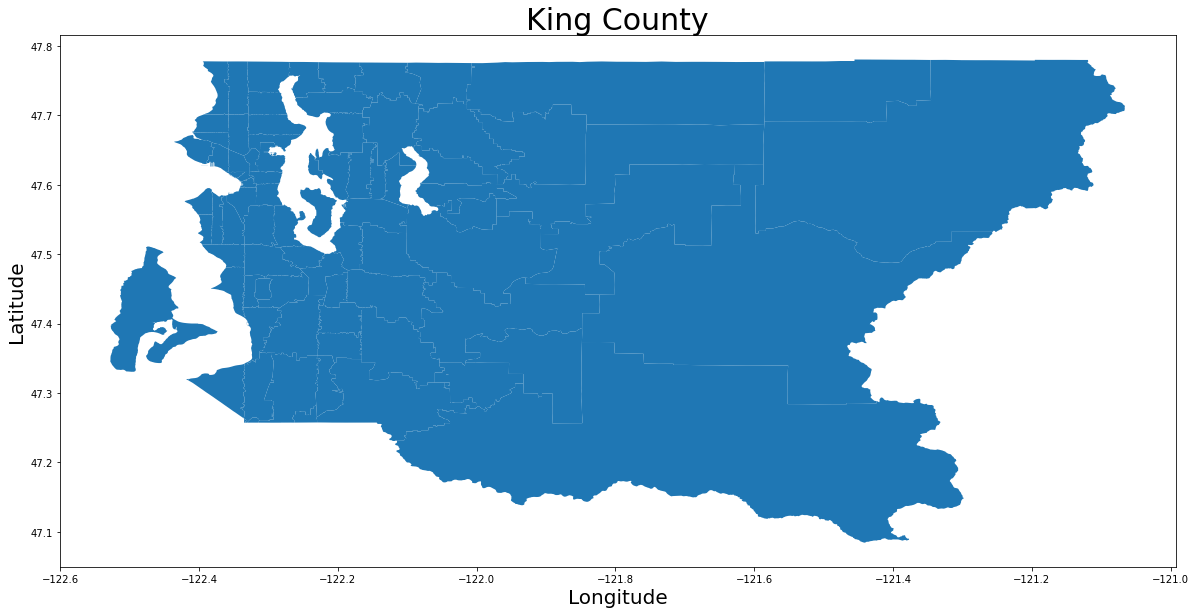

In [249]:
# the heart of a geopandas data frame is visualization, and it is perfectly integrated to do that in a few lines. Here is King County

fig, ax = plt.subplots(figsize = (20,40))
king_county.plot(ax=ax)
ax.set_title('King County',fontdict = {'fontsize': 30})
ax.set_ylabel('Latitude',fontdict = {'fontsize': 20})
ax.set_xlabel('Longitude',fontdict = {'fontsize': 20});

In [250]:
# Our map looks squat and ugly. We are going to figure out how to fix that. First let's check what kind of projection the data
# frame is using

king_county.crs

{'init': 'epsg:4326'}

In [251]:
# We are changing our data into a mercator projection which is the standard world map-style projection that elongates latitude
# and will make the map look more the way we are used to

# Project the data into Mercator Projection epsg=3395
king_county_projected = king_county.to_crs({'init': 'epsg:3395'})

# See the geometry column of the projected countries
king_county_projected['geometry'][:5] 

RuntimeError: b'no arguments in initialization list'

In [ ]:
# We're making a new dataframe which is a groupby of our original data grouped by zipcode then sorted by median value
zipsorted = pd.DataFrame(df.groupby('zipcode')['price'].median().sort_values(ascending=True))

# renaming our price column to median
zipsorted.rename(columns={'price':'median'}, inplace=True)

In [ ]:
# merging our median home value onto the king county geopandas data frame, on zip code
merged = king_county_projected.set_index('ZIP').join(zipsorted)
merged.head()

In [ ]:
# Making a choropleth which is a geo heat map 

# set the range for the choropleth
vmin, vmax = 120, 220

# create figure and axes for Matplotlib
fig, ax = plt.subplots(figsize=(20,40))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

ax.set_axis_off()
ax.set_title('Median home price per zip code', fontdict={'fontsize': '25', 'fontweight' : '3'})

# create map
merged.plot(column='median', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True, cax=cax);

Now we're going to build a different type of map, which will have all of our sales plotted in a scatter overlaid on our king county zip code map. We'll use the latitidue and longitude coordinates in our original data frame to do this.

In [ ]:
crs = {'init': 'epsg:4326'} # initiating my coordinate system
geometry = [Point(x,y) 
           for x,y in zip(df.long,df.lat)] # creating points
geo_df = gpd.GeoDataFrame(df, # the dataframe
                          crs = crs, # coordinate system that the data is using - lat/long uses the crs we initiated
                          geometry = geometry) # geometric points

# Project the coordinates into Mercator Projection epsg=3395 which is what we made our King County map into (otherwise
# our data points would not line up with our map properly)
geo_df_p = geo_df.to_crs({'init': 'epsg:3395'})

In [ ]:
# looking at our data to get our quantiles for price

geo_df_p.describe()

In [ ]:
# dividing our data into four quantiles

first = geo_df_p[geo_df_p['price'] < 194000]

second = geo_df_p[(geo_df_p['price'] >= 194000) & (geo_df['price'] < 310000)]

third = geo_df_p[(geo_df_p['price'] >= 310000) & (geo_df['price'] < 369950)]

fourth = geo_df_p[(geo_df_p['price'] >= 369950) & (geo_df['price'] < 429900)]

fifth = geo_df_p[(geo_df_p['price'] >= 429900) & (geo_df['price'] < 511950)]

sixth = geo_df_p[(geo_df_p['price'] >= 511950) & (geo_df['price'] < 594000)]

seventh = geo_df_p[(geo_df_p['price'] >= 594000) & (geo_df['price'] < 902000)]

eighth = geo_df_p[geo_df_p['price'] >= 902000]

In [ ]:
# plotting our quantiles on our map with increasing color depth for price

fig, ax = plt.subplots(figsize = (20,40))
ax.set_aspect(2)
king_county_projected.plot(ax=ax, alpha = 0.8, color = 'grey')

first.plot(ax = ax , markersize = 1, color = '#FFFFFF',marker = 'o',label = '<= 194k')
second.plot(ax = ax , markersize = 1, color = '#FFFFCC',marker = 'o',label = '194k to 310k')
third.plot(ax = ax , markersize = 1, color = '#FFFF00',marker = 'o',label = '310k to 370k')
fourth.plot(ax = ax , markersize = 1, color = '#FFB266',marker = 'o',label = '370k to 430k')
fifth.plot(ax = ax , markersize = 1, color = '#FF8000',marker = 'o',label = '430k to 512k')
sixth.plot(ax = ax , markersize = 1, color = '#FF0000',marker = 'o',label = '512k to 594k')
seventh.plot(ax = ax , markersize = 1, color = '#990000',marker = 'o',label = '594k to 902k')
eighth.plot(ax = ax , markersize = 1, color = '#000000',marker = 'o',label = '>= 902k')


plt.legend(prop = {'size':20} )


lgnd = plt.legend(loc="upper right", scatterpoints=1, fontsize=20)
for handle in lgnd.legendHandles:
    handle.set_sizes([80.0])

ax.set_title('Houses in King County, WA', fontdict = {'fontsize':
                20})

ax.set_axis_off()

After seeing this particular visualization, we went back and included latitude as a predictor in our model, independent of zip code.

# Comps "Model"

Realtors have, traditionally, used a more grassroots method for predicting sales prices - the comps model. "Comps" are comparative properties, which are located in a nearby geographical area and have similar feature stats. With comps, a realtor looks for other similar houses in the area of the house being listed, and selects a price appropriately. It's a very literal application of K-nearest neighbors where the 2-dimensional grid is the latitude and longitude, and a neighbor is defined as the points having the closest physical feature similarities. We are going to build a comps "model" and see how our regression model compares. I use "model" in quotes because this isn't a model in machine learning terms. It requires the entire dataset to produce an answer, rather than a regression model which is a mathematical expression that we can save and utilize independently. It is essentially a "realtor simulator" which simulates the behavior of a realtor looking for comps. However for the purposes of our research, this is a Comps Model.

## Data Prep

In [252]:
# our data set for a comps model looks a lot simpler, and requires no feature scaling

df_comps = df[['lat', 'long', 'price', 'sqft_living', 'sqft_lot', 'bedrooms', 'condition', 'grade']]
df_comps['price'] = df['price']
df_comps

lat     long     price  sqft_living  sqft_lot  bedrooms  condition  \
0      47.5112 -122.257  222876.0         1180      5650         3          3   
1      47.7210 -122.319  539691.0         2570      7242         3          3   
3      47.5208 -122.393  605898.0         1960      5000         4          5   
4      47.6168 -122.045  510962.0         1680      8080         3          3   
6      47.3097 -122.327  259280.0         1715      6819         3          3   
...        ...      ...       ...          ...       ...       ...        ...   
21592  47.6993 -122.346  362715.0         1530      1131         3          3   
21593  47.5107 -122.362  400754.0         2310      5813         4          3   
21594  47.5944 -122.299  404881.0         1020      1350         2          3   
21595  47.5345 -122.069  401006.0         1600      2388         3          3   
21596  47.5941 -122.299  326430.0         1020      1076         2          3   

       grade  
0          7  
1          7  
3          7  
4          8  
6          7  
...      ...  
21592      8  
21593      8  
21594      7  
21595      8  
21596      7  

[17551 rows x 8 columns]

In [253]:
# our descriptors can help us figure out the appropriate range to use when seeking a comp for each of these features

df_comps.describe()

lat          long         price   sqft_living      sqft_lot  \
count  17551.000000  17551.000000  1.755100e+04  17551.000000  17551.000000   
mean      47.562166   -122.232157  4.992736e+05   1951.479802   7354.194519   
std        0.137369      0.124292  2.595857e+05    729.039101   3548.594659   
min       47.177500   -122.512000  9.263600e+04    380.000000    520.000000   
25%       47.478700   -122.336000  3.168850e+05   1400.000000   4945.000000   
50%       47.574300   -122.266000  4.384660e+05   1840.000000   7200.000000   
75%       47.679300   -122.154000  6.134500e+05   2400.000000   9314.500000   
max       47.777600   -121.820000  2.397949e+06   4250.000000  19290.000000   

           bedrooms     condition         grade  
count  17551.000000  17551.000000  17551.000000  
mean       3.343000      3.423907      7.526637  
std        0.874949      0.652505      1.007304  
min        1.000000      1.000000      3.000000  
25%        3.000000      3.000000      7.000000  
50%        3.000000      3.000000      7.000000  
75%        4.000000      4.000000      8.000000  
max        9.000000      5.000000     12.000000

In [254]:
# We want both latitude and longitude together in order to locate the exact location of a property.
# We make a new column in our data frame that groups this coordinate location together
# We also prepare our data column of predictions and populate it with NaN

dataset = list(zip(df_comps['lat'],df_comps['long']))
df_comps['coordinates'] = dataset
#df_comps['comps_est'] = np.NaN
df_comps.reset_index(inplace=True, drop=True)
df_comps

lat     long     price  sqft_living  sqft_lot  bedrooms  condition  \
0      47.5112 -122.257  222876.0         1180      5650         3          3   
1      47.7210 -122.319  539691.0         2570      7242         3          3   
2      47.5208 -122.393  605898.0         1960      5000         4          5   
3      47.6168 -122.045  510962.0         1680      8080         3          3   
4      47.3097 -122.327  259280.0         1715      6819         3          3   
...        ...      ...       ...          ...       ...       ...        ...   
17546  47.6993 -122.346  362715.0         1530      1131         3          3   
17547  47.5107 -122.362  400754.0         2310      5813         4          3   
17548  47.5944 -122.299  404881.0         1020      1350         2          3   
17549  47.5345 -122.069  401006.0         1600      2388         3          3   
17550  47.5941 -122.299  326430.0         1020      1076         2          3   

       grade          coordinates  
0          7  (47.5112, -122.257)  
1          7   (47.721, -122.319)  
2          7  (47.5208, -122.393)  
3          8  (47.6168, -122.045)  
4          7  (47.3097, -122.327)  
...      ...                  ...  
17546      8  (47.6993, -122.346)  
17547      8  (47.5107, -122.362)  
17548      7  (47.5944, -122.299)  
17549      8  (47.5345, -122.069)  
17550      7  (47.5941, -122.299)  

[17551 rows x 9 columns]

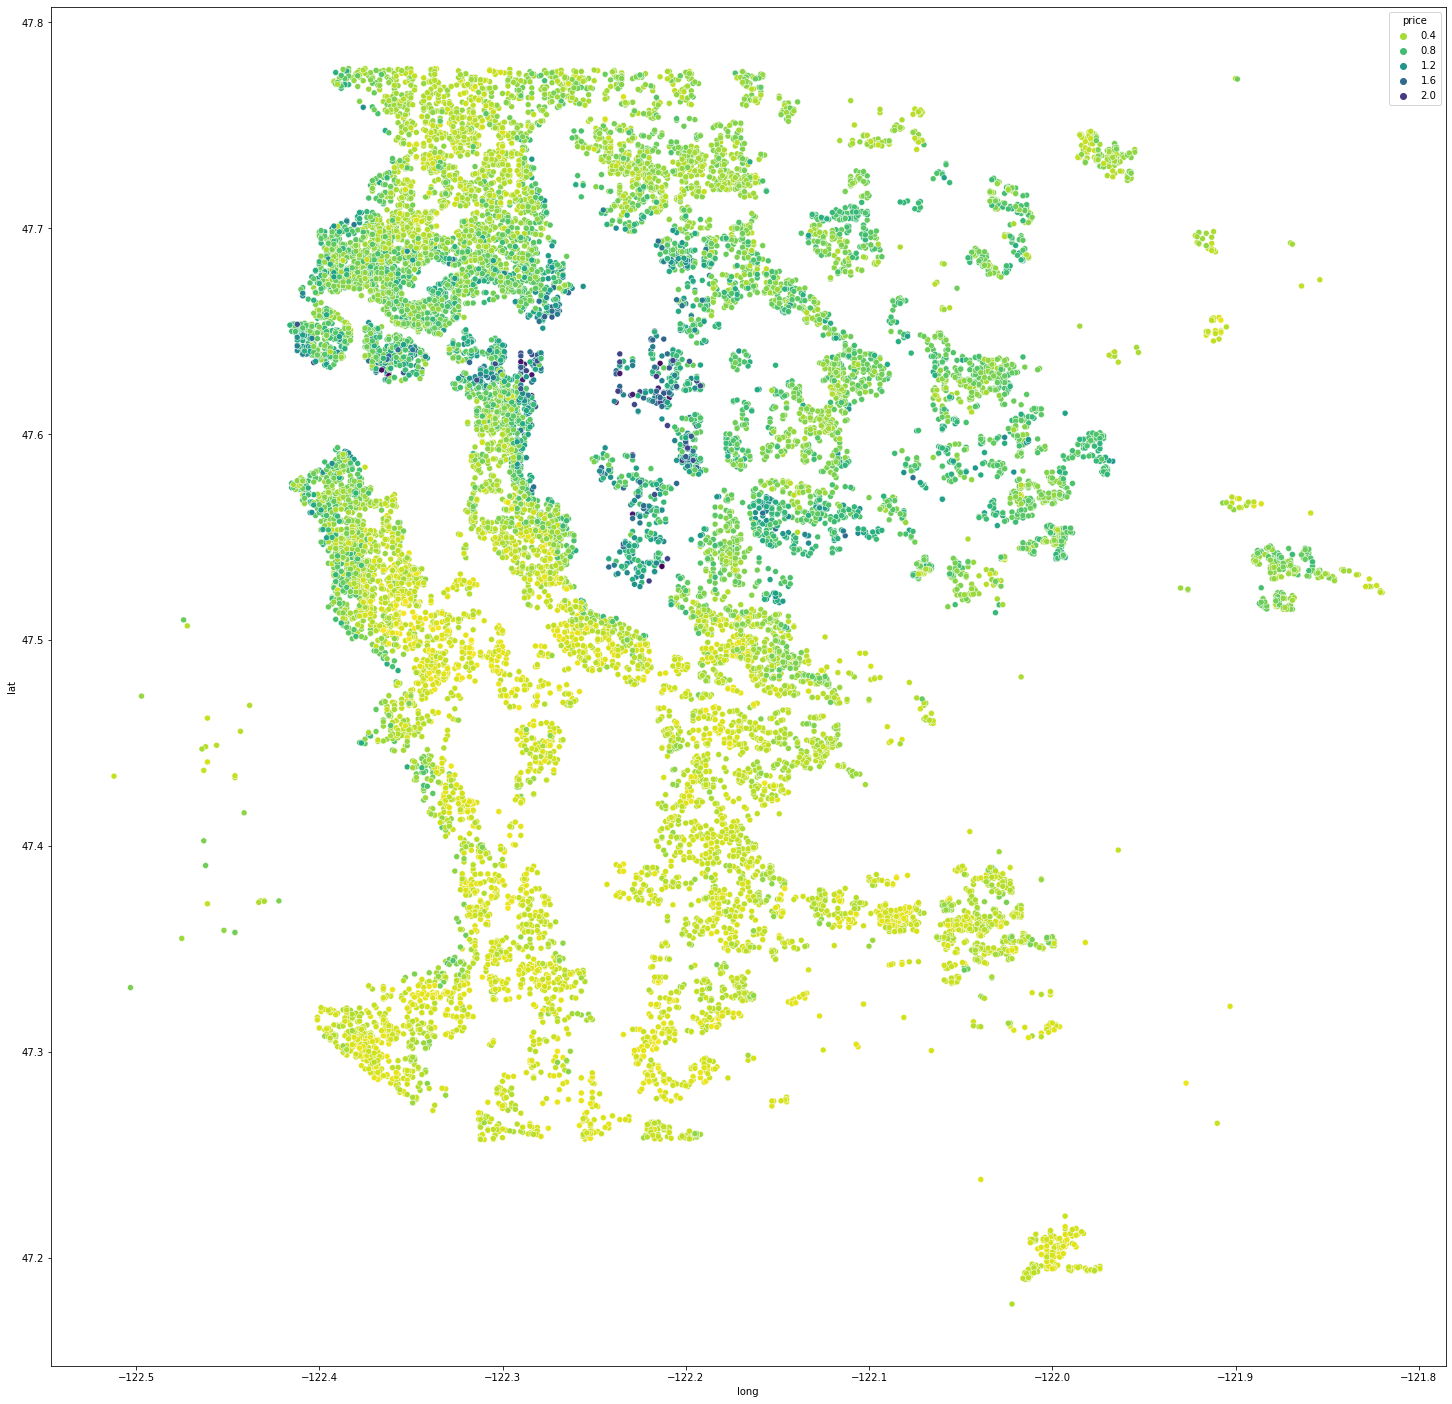

In [255]:
# A fun visual to see how using lat/long and comps makes a k-nearest neighbors problem.
# When we plot the latitude and longitude, we end up with a map of king county home sales!

plt.figure(figsize=(25,25))

sns.scatterplot(data=df_comps, x="long", y="lat", hue="price", palette="viridis_r");

Generate comps

* Generate a sq footage % range
* Generate a lot size % range
* Decide if +/- 1 bedroom is acceptable
* Decide if +/- 1 condition is acceptable


* For KNN:
    * For each entry:
    * establish comp requirements
    * create comp dataframe
    * determine neighborhood inclusion zone using within reasonable lat/long
    * create check dataframe which only includes entries within the inclusion zone
    * make sure there are at least x entries available. If not, increase inclusion zone.
    * calculate euclidian distance against all entries in inclusion zone
    * store euclidian distance to dataframe column for local zone
    * accept top x entries by euclidian distance


## Comps Functions

In [256]:
def inclusion_zone(base_property, housing_set):
    lat = base_property['lat']
    long = base_property['long']
    eligible_zone = housing_set.loc[(housing_set['lat'] >= (lat-latrange)) & 
                                        (housing_set['lat'] <= (lat+latrange))&
                                      (housing_set['long'] >= (long-longrange)) & 
                                       (housing_set['long'] <= (long+longrange))]
    return eligible_zone

def find_comps(base_property, housing_set, bedrooms, condition, grade):
    eligible_zone = inclusion_zone(base_property, housing_set)
    sqft = base_property['sqft_living']
    lot = base_property['sqft_lot']
    
    eligible_homes = eligible_zone.loc[(eligible_zone['sqft_living'] >= (sqft*(1-sqftrange))) & 
                                   (eligible_zone['sqft_living'] <= (sqft*(1+sqftrange))) &
                                  (eligible_zone['sqft_lot'] >= (lot*(1-lotrange))) & 
                                   (eligible_zone['sqft_lot'] <= (lot*(1+lotrange))) &
                                  (eligible_zone['bedrooms'] >= (bedrooms-(1+bedmod))) & 
                                   (eligible_zone['bedrooms'] <= (bedrooms+(1+bedmod))) &
                                  (eligible_zone['condition'] >= (condition-(1+condmod))) & 
                                   (eligible_zone['condition'] <= (condition + (1+condmod))) & 
                                       (eligible_zone['grade'] >= (grade-(1+grademod))) & 
                                       (eligible_zone['grade'] <= (grade + (1+grademod)))]
    return eligible_homes


from math import sqrt
 
# calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)

def comp_value(base_property, housing_set):
    bedrooms = base_property['bedrooms']
    condition = base_property['condition']
    grade = base_property['grade']
    start_coordinates = base_property['coordinates']
    eligible_homes = find_comps(base_property, housing_set, bedrooms, condition, grade)
    if eligible_homes.shape[0] >= 11:
        eligible_homes['distance'] = eligible_homes['coordinates'].apply(lambda x: euclidean_distance(start_coordinates, x))
        eligible_homes = eligible_homes.sort_values('distance', ascending=True)
        current_index = base_property.name
        comps = eligible_homes.iloc[:6]
        sq_footage = comps['sqft_living'].sum()
        total_price = comps['price'].sum()
        pr_sqft = total_price/sq_footage
        comp_value = base_property['sqft_living'] * pr_sqft
        comp_value = round(comp_value, 0)      
        return comp_value
    else:
        return np.nan
    

## Comps Model

In [257]:
X = df_comps.drop('price', axis=1)
y = df_comps['price']

compsfinder, getcomps, y_train, actual = train_test_split(X, y, test_size=0.2, random_state=randomstate)

In [258]:
compsfinder['price'] = y_train
getcomps['actual'] = actual

In [259]:
getcomps

lat     long  sqft_living  sqft_lot  bedrooms  condition  grade  \
13387  47.7027 -122.198         1140      8558         3          4      7   
981    47.5559 -122.379         2340      6350         4          4      7   
11783  47.7106 -122.285         2460     10401         4          5      7   
13231  47.7583 -122.343         2420      7927         4          4      7   
17113  47.6514 -122.386         1580      1487         3          3      9   
...        ...      ...          ...       ...       ...        ...    ...   
17069  47.5090 -122.240         3190      7081         5          3      9   
16804  47.5663 -122.290          860       696         2          3      9   
16338  47.7246 -122.363         3190      8160         5          3      9   
5690   47.6211 -122.153         1510      2001         2          4      8   
11227  47.6272 -122.297         2550      4089         3          3      9   

                        coordinates    actual  
13387           (47.7027, -122.198)  422112.0  
981             (47.5559, -122.379)  645000.0  
11783           (47.7106, -122.285)  570716.0  
13231           (47.7583, -122.343)  402765.0  
17113           (47.6514, -122.386)  543322.0  
...                             ...       ...  
17069  (47.50899999999999, -122.24)  669547.0  
16804            (47.5663, -122.29)  346735.0  
16338           (47.7246, -122.363)  870436.0  
5690            (47.6211, -122.153)  446678.0  
11227           (47.6272, -122.297)  836621.0  

[3511 rows x 9 columns]

How can we figure out what parameters give us the best comps results? We want to use something similar to GridSearchCV, but we haven't written a custom estimator. To do this, we will use sklearn's ParameterGrid. It puts together parameter combinations for us to use in whatever custom fashion we wish.

In [260]:
from sklearn.model_selection import ParameterGrid

param_grid = {'latrange': [.005, .01], 'longrange': [.005, .01], 'sqftrange': [.025, .05], 'lotrange': [.1, .2], 'bedmod': [.25], 'condmod': [.5, 1], 'grademod': [.5, 1, 1.5], }

combos = list(ParameterGrid(param_grid))

len(combos)

96

We're going to apply our 54 different parameter combinations to our testing dataframe. Afterward we'll check which parameters gave us the best results, and use those parameters for our final "comps model". Unfortunately, we don't have cv for this task. That's bad news for us.

Testing our parameters took a couple of hours, so after running it once, I comment it out and store the results.

In [261]:
'''
comps_scores = {}

for i in range(len(combos)):
    parameters = combos[i]
    getcomps[i] = None
    latrange = .02
    longrange = .02
    sqftrange = .1
    lotrange = .5
    bedmod = 0
    condmod = 0
    grademod = 1
    while getcomps.isna().sum()[i] != 0:
        getcomps.loc[getcomps[i].isna(), i] = getcomps.loc[getcomps[i].isna()].apply(lambda x: comp_value(x, compsfinder), axis=1)
        latrange += combos[i]['latrange']
        longrange += combos[i]['longrange']
        sqftrange += combos[i]['sqftrange']
        lotrange += combos[i]['lotrange']
        bedmod += combos[i]['bedmod']
        condmod += combos[i]['condmod']
        grademod += combos[i]['grademod']
    key = str(combos[i])
    value = round(mean_absolute_error(getcomps['actual'], getcomps[i]), 2)
    comps_scores[key] = value
    print(i+1, value, parameters)
'''

"\ncomps_scores = {}\n\nfor i in range(len(combos)):\n    parameters = combos[i]\n    getcomps[i] = None\n    latrange = .02\n    longrange = .02\n    sqftrange = .1\n    lotrange = .5\n    bedmod = 0\n    condmod = 0\n    grademod = 1\n    while getcomps.isna().sum()[i] != 0:\n        getcomps.loc[getcomps[i].isna(), i] = getcomps.loc[getcomps[i].isna()].apply(lambda x: comp_value(x, compsfinder), axis=1)\n        latrange += combos[i]['latrange']\n        longrange += combos[i]['longrange']\n        sqftrange += combos[i]['sqftrange']\n        lotrange += combos[i]['lotrange']\n        bedmod += combos[i]['bedmod']\n        condmod += combos[i]['condmod']\n        grademod += combos[i]['grademod']\n    key = str(combos[i])\n    value = round(mean_absolute_error(getcomps['actual'], getcomps[i]), 2)\n    comps_scores[key] = value\n    print(i+1, value, parameters)\n"

1 120176.49 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 0.5, 'latrange': 0.005, 'longrange': 0.005, 'lotrange': 0.1, 'sqftrange': 0.025}
2 118470.94 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 0.5, 'latrange': 0.005, 'longrange': 0.005, 'lotrange': 0.1, 'sqftrange': 0.05}
3 120092.22 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 0.5, 'latrange': 0.005, 'longrange': 0.005, 'lotrange': 0.2, 'sqftrange': 0.025}
4 119308.61 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 0.5, 'latrange': 0.005, 'longrange': 0.005, 'lotrange': 0.2, 'sqftrange': 0.05}
5 125567.83 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 0.5, 'latrange': 0.005, 'longrange': 0.01, 'lotrange': 0.1, 'sqftrange': 0.025}
6 125818.76 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 0.5, 'latrange': 0.005, 'longrange': 0.01, 'lotrange': 0.1, 'sqftrange': 0.05}
7 125678.26 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 0.5, 'latrange': 0.005, 'longrange': 0.01, 'lotrange': 0.2, 'sqftrange': 0.025}
8 126838.63 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 0.5, 'latrange': 0.005, 'longrange': 0.01, 'lotrange': 0.2, 'sqftrange': 0.05}
9 124148.03 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 0.5, 'latrange': 0.01, 'longrange': 0.005, 'lotrange': 0.1, 'sqftrange': 0.025}
10 123145.39 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 0.5, 'latrange': 0.01, 'longrange': 0.005, 'lotrange': 0.1, 'sqftrange': 0.05}
11 123884.52 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 0.5, 'latrange': 0.01, 'longrange': 0.005, 'lotrange': 0.2, 'sqftrange': 0.025}
12 123974.23 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 0.5, 'latrange': 0.01, 'longrange': 0.005, 'lotrange': 0.2, 'sqftrange': 0.05}
13 130806.52 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 0.5, 'latrange': 0.01, 'longrange': 0.01, 'lotrange': 0.1, 'sqftrange': 0.025}
14 130229.15 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 0.5, 'latrange': 0.01, 'longrange': 0.01, 'lotrange': 0.1, 'sqftrange': 0.05}
15 130912.94 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 0.5, 'latrange': 0.01, 'longrange': 0.01, 'lotrange': 0.2, 'sqftrange': 0.025}
16 131376.29 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 0.5, 'latrange': 0.01, 'longrange': 0.01, 'lotrange': 0.2, 'sqftrange': 0.05}
17 109069.36 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1, 'latrange': 0.005, 'longrange': 0.005, 'lotrange': 0.1, 'sqftrange': 0.025}
18 109410.56 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1, 'latrange': 0.005, 'longrange': 0.005, 'lotrange': 0.1, 'sqftrange': 0.05}
19 109501.47 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1, 'latrange': 0.005, 'longrange': 0.005, 'lotrange': 0.2, 'sqftrange': 0.025}
20 109628.37 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1, 'latrange': 0.005, 'longrange': 0.005, 'lotrange': 0.2, 'sqftrange': 0.05}
21 113711.81 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1, 'latrange': 0.005, 'longrange': 0.01, 'lotrange': 0.1, 'sqftrange': 0.025}
22 112078.32 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1, 'latrange': 0.005, 'longrange': 0.01, 'lotrange': 0.1, 'sqftrange': 0.05}
23 114349.97 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1, 'latrange': 0.005, 'longrange': 0.01, 'lotrange': 0.2, 'sqftrange': 0.025}
24 112635.79 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1, 'latrange': 0.005, 'longrange': 0.01, 'lotrange': 0.2, 'sqftrange': 0.05}
25 112416.4 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1, 'latrange': 0.01, 'longrange': 0.005, 'lotrange': 0.1, 'sqftrange': 0.025}
26 111906.24 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1, 'latrange': 0.01, 'longrange': 0.005, 'lotrange': 0.1, 'sqftrange': 0.05}
27 113546.95 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1, 'latrange': 0.01, 'longrange': 0.005, 'lotrange': 0.2, 'sqftrange': 0.025}
28 111855.1 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1, 'latrange': 0.01, 'longrange': 0.005, 'lotrange': 0.2, 'sqftrange': 0.05}
29 115435.05 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1, 'latrange': 0.01, 'longrange': 0.01, 'lotrange': 0.1, 'sqftrange': 0.025}
30 114966.29 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1, 'latrange': 0.01, 'longrange': 0.01, 'lotrange': 0.1, 'sqftrange': 0.05}
31 115853.64 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1, 'latrange': 0.01, 'longrange': 0.01, 'lotrange': 0.2, 'sqftrange': 0.025}
32 115724.15 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1, 'latrange': 0.01, 'longrange': 0.01, 'lotrange': 0.2, 'sqftrange': 0.05}
33 103109.21 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1.5, 'latrange': 0.005, 'longrange': 0.005, 'lotrange': 0.1, 'sqftrange': 0.025}
34 105918.24 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1.5, 'latrange': 0.005, 'longrange': 0.005, 'lotrange': 0.1, 'sqftrange': 0.05}
35 103308.97 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1.5, 'latrange': 0.005, 'longrange': 0.005, 'lotrange': 0.2, 'sqftrange': 0.025}
36 106624.58 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1.5, 'latrange': 0.005, 'longrange': 0.005, 'lotrange': 0.2, 'sqftrange': 0.05}
37 106770.74 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1.5, 'latrange': 0.005, 'longrange': 0.01, 'lotrange': 0.1, 'sqftrange': 0.025}
38 108781.33 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1.5, 'latrange': 0.005, 'longrange': 0.01, 'lotrange': 0.1, 'sqftrange': 0.05}
39 107146.03 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1.5, 'latrange': 0.005, 'longrange': 0.01, 'lotrange': 0.2, 'sqftrange': 0.025}
40 109315.67 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1.5, 'latrange': 0.005, 'longrange': 0.01, 'lotrange': 0.2, 'sqftrange': 0.05}
41 104331.4 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1.5, 'latrange': 0.01, 'longrange': 0.005, 'lotrange': 0.1, 'sqftrange': 0.025}
42 107826.18 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1.5, 'latrange': 0.01, 'longrange': 0.005, 'lotrange': 0.1, 'sqftrange': 0.05}
43 105042.17 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1.5, 'latrange': 0.01, 'longrange': 0.005, 'lotrange': 0.2, 'sqftrange': 0.025}
44 108565.07 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1.5, 'latrange': 0.01, 'longrange': 0.005, 'lotrange': 0.2, 'sqftrange': 0.05}
45 108125.17 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1.5, 'latrange': 0.01, 'longrange': 0.01, 'lotrange': 0.1, 'sqftrange': 0.025}
46 110442.01 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1.5, 'latrange': 0.01, 'longrange': 0.01, 'lotrange': 0.1, 'sqftrange': 0.05}
47 108365.6 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1.5, 'latrange': 0.01, 'longrange': 0.01, 'lotrange': 0.2, 'sqftrange': 0.025}
48 111155.63 {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1.5, 'latrange': 0.01, 'longrange': 0.01, 'lotrange': 0.2, 'sqftrange': 0.05}
49 120177.97 {'bedmod': 0.25, 'condmod': 1, 'grademod': 0.5, 'latrange': 0.005, 'longrange': 0.005, 'lotrange': 0.1, 'sqftrange': 0.025}
50 118484.18 {'bedmod': 0.25, 'condmod': 1, 'grademod': 0.5, 'latrange': 0.005, 'longrange': 0.005, 'lotrange': 0.1, 'sqftrange': 0.05}
51 120098.53 {'bedmod': 0.25, 'condmod': 1, 'grademod': 0.5, 'latrange': 0.005, 'longrange': 0.005, 'lotrange': 0.2, 'sqftrange': 0.025}
52 119321.76 {'bedmod': 0.25, 'condmod': 1, 'grademod': 0.5, 'latrange': 0.005, 'longrange': 0.005, 'lotrange': 0.2, 'sqftrange': 0.05}
53 125568.8 {'bedmod': 0.25, 'condmod': 1, 'grademod': 0.5, 'latrange': 0.005, 'longrange': 0.01, 'lotrange': 0.1, 'sqftrange': 0.025}
54 125822.89 {'bedmod': 0.25, 'condmod': 1, 'grademod': 0.5, 'latrange': 0.005, 'longrange': 0.01, 'lotrange': 0.1, 'sqftrange': 0.05}
55 125679.46 {'bedmod': 0.25, 'condmod': 1, 'grademod': 0.5, 'latrange': 0.005, 'longrange': 0.01, 'lotrange': 0.2, 'sqftrange': 0.025}
56 126842.73 {'bedmod': 0.25, 'condmod': 1, 'grademod': 0.5, 'latrange': 0.005, 'longrange': 0.01, 'lotrange': 0.2, 'sqftrange': 0.05}
57 124146.01 {'bedmod': 0.25, 'condmod': 1, 'grademod': 0.5, 'latrange': 0.01, 'longrange': 0.005, 'lotrange': 0.1, 'sqftrange': 0.025}
58 123145.33 {'bedmod': 0.25, 'condmod': 1, 'grademod': 0.5, 'latrange': 0.01, 'longrange': 0.005, 'lotrange': 0.1, 'sqftrange': 0.05}
59 123887.17 {'bedmod': 0.25, 'condmod': 1, 'grademod': 0.5, 'latrange': 0.01, 'longrange': 0.005, 'lotrange': 0.2, 'sqftrange': 0.025}
60 123974.17 {'bedmod': 0.25, 'condmod': 1, 'grademod': 0.5, 'latrange': 0.01, 'longrange': 0.005, 'lotrange': 0.2, 'sqftrange': 0.05}
61 130803.34 {'bedmod': 0.25, 'condmod': 1, 'grademod': 0.5, 'latrange': 0.01, 'longrange': 0.01, 'lotrange': 0.1, 'sqftrange': 0.025}
62 130232.94 {'bedmod': 0.25, 'condmod': 1, 'grademod': 0.5, 'latrange': 0.01, 'longrange': 0.01, 'lotrange': 0.1, 'sqftrange': 0.05}
63 130910.0 {'bedmod': 0.25, 'condmod': 1, 'grademod': 0.5, 'latrange': 0.01, 'longrange': 0.01, 'lotrange': 0.2, 'sqftrange': 0.025}
64 131384.24 {'bedmod': 0.25, 'condmod': 1, 'grademod': 0.5, 'latrange': 0.01, 'longrange': 0.01, 'lotrange': 0.2, 'sqftrange': 0.05}
65 109067.73 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1, 'latrange': 0.005, 'longrange': 0.005, 'lotrange': 0.1, 'sqftrange': 0.025}
66 109557.09 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1, 'latrange': 0.005, 'longrange': 0.005, 'lotrange': 0.1, 'sqftrange': 0.05}
67 109569.0 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1, 'latrange': 0.005, 'longrange': 0.005, 'lotrange': 0.2, 'sqftrange': 0.025}
68 109577.98 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1, 'latrange': 0.005, 'longrange': 0.005, 'lotrange': 0.2, 'sqftrange': 0.05}
69 113897.47 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1, 'latrange': 0.005, 'longrange': 0.01, 'lotrange': 0.1, 'sqftrange': 0.025}
70 112456.21 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1, 'latrange': 0.005, 'longrange': 0.01, 'lotrange': 0.1, 'sqftrange': 0.05}
71 114595.74 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1, 'latrange': 0.005, 'longrange': 0.01, 'lotrange': 0.2, 'sqftrange': 0.025}
72 113084.43 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1, 'latrange': 0.005, 'longrange': 0.01, 'lotrange': 0.2, 'sqftrange': 0.05}
73 112575.32 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1, 'latrange': 0.01, 'longrange': 0.005, 'lotrange': 0.1, 'sqftrange': 0.025}
74 112204.46 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1, 'latrange': 0.01, 'longrange': 0.005, 'lotrange': 0.1, 'sqftrange': 0.05}
75 113676.87 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1, 'latrange': 0.01, 'longrange': 0.005, 'lotrange': 0.2, 'sqftrange': 0.025}
76 112159.97 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1, 'latrange': 0.01, 'longrange': 0.005, 'lotrange': 0.2, 'sqftrange': 0.05}
77 115689.08 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1, 'latrange': 0.01, 'longrange': 0.01, 'lotrange': 0.1, 'sqftrange': 0.025}
78 115554.46 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1, 'latrange': 0.01, 'longrange': 0.01, 'lotrange': 0.1, 'sqftrange': 0.05}
79 116208.53 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1, 'latrange': 0.01, 'longrange': 0.01, 'lotrange': 0.2, 'sqftrange': 0.025}
80 116353.97 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1, 'latrange': 0.01, 'longrange': 0.01, 'lotrange': 0.2, 'sqftrange': 0.05}
81 103123.19 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1.5, 'latrange': 0.005, 'longrange': 0.005, 'lotrange': 0.1, 'sqftrange': 0.025}
82 105915.06 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1.5, 'latrange': 0.005, 'longrange': 0.005, 'lotrange': 0.1, 'sqftrange': 0.05}
83 103389.54 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1.5, 'latrange': 0.005, 'longrange': 0.005, 'lotrange': 0.2, 'sqftrange': 0.025}
84 106626.86 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1.5, 'latrange': 0.005, 'longrange': 0.005, 'lotrange': 0.2, 'sqftrange': 0.05}
85 106836.31 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1.5, 'latrange': 0.005, 'longrange': 0.01, 'lotrange': 0.1, 'sqftrange': 0.025}
86 108882.75 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1.5, 'latrange': 0.005, 'longrange': 0.01, 'lotrange': 0.1, 'sqftrange': 0.05}
87 107222.31 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1.5, 'latrange': 0.005, 'longrange': 0.01, 'lotrange': 0.2, 'sqftrange': 0.025}
88 109326.32 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1.5, 'latrange': 0.005, 'longrange': 0.01, 'lotrange': 0.2, 'sqftrange': 0.05}
89 104428.36 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1.5, 'latrange': 0.01, 'longrange': 0.005, 'lotrange': 0.1, 'sqftrange': 0.025}
90 107945.19 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1.5, 'latrange': 0.01, 'longrange': 0.005, 'lotrange': 0.1, 'sqftrange': 0.05}
91 105094.56 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1.5, 'latrange': 0.01, 'longrange': 0.005, 'lotrange': 0.2, 'sqftrange': 0.025}
92 108595.39 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1.5, 'latrange': 0.01, 'longrange': 0.005, 'lotrange': 0.2, 'sqftrange': 0.05}
93 108237.1 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1.5, 'latrange': 0.01, 'longrange': 0.01, 'lotrange': 0.1, 'sqftrange': 0.025}
94 110556.68 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1.5, 'latrange': 0.01, 'longrange': 0.01, 'lotrange': 0.1, 'sqftrange': 0.05}
95 108496.59 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1.5, 'latrange': 0.01, 'longrange': 0.01, 'lotrange': 0.2, 'sqftrange': 0.025}
96 111199.52 {'bedmod': 0.25, 'condmod': 1, 'grademod': 1.5, 'latrange': 0.01, 'longrange': 0.01, 'lotrange': 0.2, 'sqftrange': 0.05}

In [262]:
# picked out the best scoring combination

#key_min = min(comps_scores.keys(), key=(lambda k: comps_scores[k]))
#key_max = max(comps_scores.keys(), key=(lambda k: comps_scores[k]))
#print('Best: '+key_min, '\nWorst: '+key_max)

    Best: {'bedmod': 0.25, 'condmod': 0.5, 'grademod': 1.5, 'latrange': 0.005, 'longrange': 0.005, 'lotrange': 0.1, 'sqftrange': 0.025} 
    Worst: {'bedmod': 0.25, 'condmod': 1, 'grademod': 0.5, 'latrange': 0.01, 'longrange': 0.01, 'lotrange': 0.2, 'sqftrange': 0.05}

In [263]:
compsfinder

lat     long  sqft_living  sqft_lot  bedrooms  condition  grade  \
5761   47.6265 -122.300         3560      4000         4          3      9   
17343  47.5758 -122.309         1240      1101         2          3      8   
8262   47.3654 -122.164         1940      8347         3          3      8   
13929  47.6874 -122.178         2060      4730         3          4      8   
16797  47.3771 -122.186         1578      7340         3          3      7   
...        ...      ...          ...       ...       ...        ...    ...   
12411  47.5253 -122.201         2770      9350         3          3      8   
6500   47.5822 -122.077         1790      9927         3          4      7   
14528  47.6639 -122.399         1320      3420         2          3      7   
899    47.2093 -122.000         1020      8437         3          5      6   
12706  47.6304 -122.205         2500      8725         4          4      8   

               coordinates      price  
5761     (47.6265, -122.3)  1055939.0  
17343  (47.5758, -122.309)   404520.0  
8262   (47.3654, -122.164)   325425.0  
13929  (47.6874, -122.178)   625343.0  
16797  (47.3771, -122.186)   261584.0  
...                    ...        ...  
12411  (47.5253, -122.201)   682841.0  
6500   (47.5822, -122.077)   650409.0  
14528  (47.6639, -122.399)   477090.0  
899      (47.2093, -122.0)   225424.0  
12706  (47.6304, -122.205)   966407.0  

[14040 rows x 9 columns]

In [264]:
getcomps['comps_est'] = np.NaN

latrange = .02
longrange = .02
sqftrange = .1
lotrange = .5
bedmod = 0
condmod = 0
grademod = 1

while getcomps.isna().sum()['comps_est'] != 0:
    getcomps.loc[getcomps.comps_est.isna(), 'comps_est'] = getcomps.loc[getcomps.comps_est.isna()].apply(lambda x: comp_value(x, compsfinder), axis=1)
    latrange += .005
    longrange += .005
    sqftrange += .025
    lotrange += .1
    bedmod += .25
    condmod += .5
    grademod += 1.5


In [265]:
comps_predictions = getcomps[['actual', 'comps_est']]
comps_predictions

actual  comps_est
13387  422112.0   407474.0
981    645000.0   464601.0
11783  570716.0   639149.0
13231  402765.0   455465.0
17113  543322.0   494341.0
...         ...        ...
17069  669547.0   522202.0
16804  346735.0   331920.0
16338  870436.0   674385.0
5690   446678.0   537948.0
11227  836621.0   886020.0

[3511 rows x 2 columns]

In [266]:
# Calculate our mean absolute error

mae = round(mean_absolute_error(getcomps['actual'], getcomps['comps_est']), 2)
mae

66345.75

In [267]:
rmse = round(np.sqrt(mean_squared_error(getcomps['actual'], getcomps['comps_est'])), 2)
rmse

105345.4

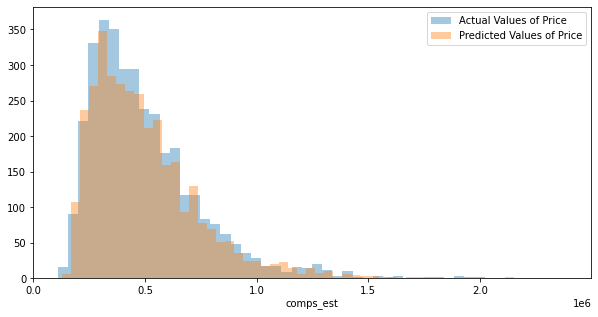

In [268]:
plt.figure(figsize=(10,5))
sns.distplot(getcomps['actual'], hist=True, kde=False)
sns.distplot(getcomps['comps_est'], hist=True, kde=False)
plt.legend(labels=['Actual Values of Price', 'Predicted Values of Price'])
plt.xlim(0,);

In [269]:
models['Models'].append('Realtor Simulator')
models['r2'].append(None)
models['mae'].append(mae)
models['rmse'].append(rmse)

It would seem that our "realtor simulator" performs worse than our regression model, but not by a lot.

# Model Selection

We ran several different types of models, and logged the r^squared and mean absolute error for each model type. Which model performed the best for us?

In [270]:
model_types = pd.DataFrame(models)

In [271]:
model_types = model_types.sort_values('mae', ascending=True).reset_index()
model_types.drop('index',axis=1, inplace=True)

In [272]:
model_types

Models        r2        mae       rmse
0    Gradient Boosting  0.874435   64317.18  101804.06
1    Realtor Simulator       NaN   66345.75  105345.40
2                RFECV  0.840063   71119.79   14258.98
3             Basic LR  0.839385   71128.20   14272.88
4                Ridge  0.839405   71128.22  109543.99
5          Elastic Net  0.839053   71262.39  109982.59
6                Lasso  0.838578   71340.53  110384.21
7        Random Forest  0.842696   72733.81   14563.44
8                  RFE  0.840063   76727.99   13864.49
9                  KNN  0.817158   83975.73  139379.02
10      LAD Regression  0.839088  121847.77  172714.67
11  Forw-Back Selector  0.839408  122057.19   11708.18
12                 SVR  0.857253  139660.70  208282.19

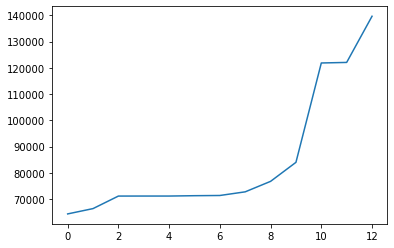

In [273]:
plt.plot(model_types['mae'])

In [ ]:
break

## TO DO make this nice

# Final Model

Now that we've chosen a favorite regression for this problem (Ridge), we want to be able to actually use the model to predict new data. Our steps are as follows:

* Build a model using our ENTIRE dataset for deployment
* Write our own standardization functions that we can apply to incoming new data
* Prepare a more intuitive GUI for predicting on new data

In [ ]:
# our continuous variables before we applied the StandardScaler. 
# This is where we need to write and store our own scaling function, which we will use to scale any new incoming
# data that we want to predict from!



## Train model on entire data set

In [ ]:


scaler=StandardScaler()
final_continuous_standardized = df_continuous_log.apply(standardize)

In [ ]:
preprocessed_scaled = pd.concat([df_target_log, final_continuous_standardized, df_categoricals_processed], axis=1)

In [ ]:
# prepare regression data set

X = preprocessed_scaled.drop('price', axis=1)
y = preprocessed_scaled['price']

In [ ]:
# Using sklearn RFECV to perform integrated CV while picking the number of features
# picks the number of features itself

model = LinearRegression()
cv = RepeatedKFold(n_splits=5, n_repeats=2, random_state=1)
final_model = RFECV(estimator=model, step=1, cv=cv, scoring='neg_mean_absolute_error')
final_model.fit(X, y)

In [ ]:
#final_model = Ridge(alpha = [0.1])
#final_model.fit(X, y)

### Save model to file

In [ ]:
#from joblib import dump
#dump(final_model, 'final_model.joblib') 

### Other modeling things we need to save

lat_bins and year_bins
features columns

# Making New Predictions

    sqft_living - number
    sqft_lot - number
    floors - number
    bedrooms - number
    bathrooms - number
    condition - pick from range
    grade - pick from range
    comparative_sf - pick from range
    zipcode - number
    month - number
    age_group - enter year built
    lat_round - enter address for lookup
    waterfront - yes/no
    renovated - yes/no
    basement - yes/no

## Set up empty/default predictive data frame

In [ ]:
# Get the columns that we use from our final model
columns = X.columns

## Predictive Functions

In [ ]:
# Function to standardize new data according to the mean and std deviation that we saved for each column

def standardize_continuous(key, value):
    """Standardize a value according to saved mean and standard deviation saved values"""
    transformed = (np.log(value) - standardization_coeffs[key+'_mean']) / standardization_coeffs[key+'_std']
    return transformed

In [ ]:
def predict_from_one(continuous, dichotomous, high_card_cat, binned):
    """Takes in a series of dictionaries with predictive variables. Pre-processes the variables
    to conform with model predictors. Runs model on submitted predictors and returns a prediction."""
    
    # create an empty dictionary to store our predictor parameters
    test_parameters = {}
    
    # create our predictor data frame full of 0s
    test_frame = pd.DataFrame(0, index=range(1), columns=columns)

    # standardize and store our continuous variables in our predictor dictionary
    for item in continuous:
        test_parameters[item] = standardize_continuous(item, continuous[item])
    
    # for our categoricals, not all are used in our model. For each categorical that we would create with our entered data,
    # we check first and see if it's in our model at all. If the column is there, it stores
    # the predictor in our predictor dictionary as a 1, otherwise it is ignored.
    
    # This code first checks if the column we want is in our data frame. If the column is there, it stores
    # this predictor in our predictor dictionary as a 1
    for item in high_card_cat:
        if item+'_'+str(high_card_cat[item]) in test_frame.columns:
            test_parameters[item+'_'+str(high_card_cat[item])] = 1
        
    # This code first checks if the column we want is in our data frame. If the column is there, it stores
    # this predictor in our predictor dictionary as a 1
    for item in dichotomous:
        if dichotomous[item]:
            test_parameters[item+'_1.0']=1

    # function to find lower and upper bin bounds for our age blocks
    def age_block_finder(year, bins):
        for i in range(len(bins)):
            if year > bins[i] and year < bins[i+1]:
                lower_year, upper_year = bins[i], bins[i+1]
            else: continue
        return lower_year, upper_year

    # function to find lower and upper bin bounds for our latitude blocks
    def lat_block_finder(lat, bins):
        for i in range(len(bins)):
            if lat_round > bins[i] and lat_round < bins[i+1]:
                lower_lat, upper_lat = round(bins[i], 3), round(bins[i+1], 3)
            else: continue
        return lower_lat, upper_lat

    # find the lower and upper bounds for age block and lat block
    lower_year, upper_year = age_block_finder(year_built, year_bins) # lower and upper bounds for our age block
    lower_lat, upper_lat = lat_block_finder(lat_round, lat_bins) # lower and upper bounds for our latitude block

    # This code first checks if the column we want is in our data frame. If the column is there, it stores
    # this predictor in our predictor dictionary as a 1
    if 'year_block_('+str(lower_year)+', '+str(upper_year)+']' in test_frame.columns:
        test_parameters['year_block_('+str(lower_year)+', '+str(upper_year)+']'] = 1

    # This code first checks if the column we want is in our data frame. If the column is there, it stores
    # this predictor in our predictor dictionary as a 1
    if 'lat_block_('+str(lower_lat)+', '+str(upper_lat)+']' in test_frame.columns:
        test_parameters['lat_block_('+str(lower_lat)+', '+str(upper_lat)+']'] = 1
        
    # enter all of our predictors into our predictor data frame
    for item in test_parameters:
        value = test_parameters[item]
        test_frame[item] = value
    
    # send the predictor data frame to the model and get a prediction
    predicted_price = int(np.exp(final_model.predict(test_frame)))    
    
    # return the prediction
    return predicted_price

In [ ]:
def prepare_line(x):
    sqft_living = x['sqft_living']
    sqft_lot = x['sqft_lot']
    floors = x['floors']
    bedrooms = x['bedrooms']
    bathrooms = x['bathrooms']
    zipcode = x['zipcode']
    month = x['month_sold']
    condition = x['condition']
    grade = x['grade']
    comparative_sf = x['comparative_sf']
    year_built = x['year_built']
    lat_round = round(x['lat'], 3)
    waterfront = x['waterfront']
    renovated = x['renovated']
    basement = x['basement']

    continuous = {'sqft_living':sqft_living, 'sqft_lot':sqft_lot, 'floors':floors, 'bedrooms':bedrooms, 'bathrooms':bathrooms, 'condition':condition, 'grade':grade}
    dichotomous = {'waterfront':waterfront, 'renovated':renovated, 'basement':basement}
    high_card_cat = {'zipcode': zipcode, 'month_sold':month, 'comparative_sf':comparative_sf}
    binned = {'year_built':year_built, 'lat_round':lat_round}
    
    predicted_price = predict_from_one(continuous, dichotomous, high_card_cat, binned)
 
    return predicted_price

In [ ]:
def predict_from_dataframe(new_data):
    predictions = []
    actuals = []
    actuals = new_data.apply(lambda x: get_actual(x), axis=1)
    predictions = new_data.apply(lambda x: prepare_line(x), axis=1)
    new_predictions = pd.DataFrame()
    new_predictions['actual'] = actuals
    new_predictions['predictions'] = predictions
    return new_predictions

In [ ]:
def get_actual(line):
    actual = line['actual']
    return actual

## Enter Predictors

### Future Work - GUI

This section could be a GUI, where a realtor can enter these various details into a user-friendly interface and have the details converted to proper format for our predictor behind the scenes.

We're not going to create this GUI here, so some of our data will be pre-processed when entered into our predictive matrix.

## Predict one independent entry

In [ ]:
sqft_living = 1960
sqft_lot = 5000
floors = 2
bedrooms = 2.5
bathrooms = 4
zipcode = 98136
month = 12

# The description here is: Overall property condition
# The choices here are: Poor, Okay, Average, Good, Excellent
# provide examples to indicate that this variable indicates property repair/maintenance level, not quality of materials
# GUI: checkbox, check only one
condition = 3

# The description here is: Quality of property materials
# The choices here are: Low Quality, Below Average Quality, Average/Builder Grade, Above Average Quality, Very High Quality
# Give examples within each category so they can make a best guess. Ex. Low Quality - Linoleum >20 yrs old, Laminate counters
# ex. continued - Very High Quality - crown moulding, solid slab granite. 
# provide examples to allow proper selection of grade
# GUI: checkbox, check only one
grade = 5

# subjective variable - how does this home's square footage relate in size to its neighbors?
# smaller, average or larger
# GUI: checkbox, check only one
comparative_sf = 2

# provide year built
year_built = 1965

# provide address here for lookup, use lookup service to get latitude. We are not doing that here
# for time expediency reasons. we're just directly entering a latitude
# GUI: enter an address
lat_round = round(47.5208, 3)

# these are binary flags, put 1/0
#GUI: Checkbox, check to include
waterfront = 0
renovated = 1
basement = 0

# Storing all of our variables to process them to populate our data frame

continuous = {'sqft_living':sqft_living, 'sqft_lot':sqft_lot, 'floors':floors, 'bedrooms':bedrooms, 'bathrooms':bathrooms, 'condition':condition, 'grade':grade}
dichotomous = {'waterfront':waterfront, 'renovated':renovated, 'basement':basement}
high_card_cat = {'zipcode': zipcode, 'month_sold':month, 'comparative_sf':comparative_sf}
binned = {'year_built':year_built, 'lat_round':lat_round}

In [ ]:
predicted_price = predict_from_one(continuous, dichotomous, high_card_cat, binned)

In [ ]:
predicted_price

## Load and predict from csv

I used the sales lookup tool at https://info.kingcounty.gov/assessor/esales/Residential.aspx to get a sample of properties from King County sold in June of 2015.

In [ ]:
# load and look at our king county housing data
new_data = pd.read_csv('newhousedata.csv')
new_data

In [ ]:
compsfinder = df_comps

new_data['comps_est'] = np.NaN
dataset = list(zip(new_data['lat'],new_data['long']))
new_data['coordinates'] = dataset

latrange = .02
longrange = .02
sqftrange = .1
lotrange = .5
bedmod = 0
condmod = 0
grademod = 1

while new_data.isna().sum()['comps_est'] != 0:
    new_data.loc[new_data.comps_est.isna(), 'comps_est'] = new_data.loc[new_data.comps_est.isna()].apply(lambda x: comp_value(x, compsfinder), axis=1)
    latrange += .005
    longrange += .005
    sqftrange += .025
    lotrange += .1
    bedmod += .25
    condmod += .5
    grademod += 1.5

In [ ]:
stuff = predict_from_dataframe(new_data)
stuff['predictions'] = round(stuff['predictions']*(1+monthly_appreciation), 0)
stuff['comps_est'] = round(new_data['comps_est']*(1+monthly_appreciation), 0)
stuff

In [ ]:
x_stuff = stuff['actual']
y_stuff = (stuff['predictions'] - stuff['actual'])

plt.scatter(x_stuff, y_stuff)

In [ ]:
# Calculate our mean absolute error for regression

mae = round(mean_absolute_error(stuff['actual'], stuff['predictions']), 2)
mae

In [ ]:
# calculate our rmse for regression

rmse = round(np.sqrt(mean_squared_error(stuff['actual'], stuff['predictions'])), 2)
rmse

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(stuff['predictions'], hist=True, kde=False, bins=20)
sns.distplot(stuff['actual'], hist=True, kde=False, bins=20)
plt.legend(labels=['Actual Values of Price', 'Predicted Values of Price'])
plt.xlim(0,);

In [ ]:
x_stuff = stuff['actual']
y_stuff = (stuff['comps_est'] - stuff['actual'])

plt.scatter(x_stuff, y_stuff)

In [ ]:
# Calculate our mean absolute error for realtor simulator

mae = round(mean_absolute_error(stuff['actual'], stuff['comps_est']), 2)
mae

In [ ]:
# calculate our rmse for realtor simulator

rmse = round(np.sqrt(mean_squared_error(stuff['actual'], stuff['comps_est'])), 2)
rmse

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(stuff['comps_est'], hist=True, kde=False, bins=20)
sns.distplot(stuff['actual'], hist=True, kde=False, bins=20)
plt.legend(labels=['Actual Values of Price', 'Comps Prediction'])
plt.xlim(0,);

# Explanation of Attempts - Feature Engineering/Selection

A lot of efforts were made to retain granularity while decreasing model complexity, but generally, keeping categoricals one-hot encoded as granularly as possible resulted in the best performance.

These are things I tried that did not improve the model:

* Month ranked on mean sales price, then expressed with polynomial relationship with price (one-hot encoded all 12 was better)
* Month binned into 4 quarters (one-hot encoded all 12 was better)
* Zip code as ordinal, ranked based on median home value per zip code (one-hot encoded all 70 was better)
* Zip code in bins (ex 7, 10 bins)
* Zip code, ranked as ordinal, then expressed with polynomial relationship with price (one-hot encoded all 70 was better)
* sqft_living expressed as polynomial relationship with price (ineffective)
* feature engineered "location" attempting to correlate with zip code based on housing quality using condition and grade (did not correlate). Needed more neighborhood quality metrics.
* ranking property based on its relationship to the sqft_15 categories by ranking it either smaller, medium or higher than neighbors, hypothetically penalizes being the biggest house in the neighborhood. Made this but feature selectors generally eliminated.
* Age of house, rather than bins of year built, as ordinal with relationship to price (high-cardinality one-hot encoded bins was better)
* Latitude relationship with Price as polynomial relationship. Although relationship was clear on scatter, addition of feature was not meaningful.

# TO DO

Other:

* Add statistical evaluations to selected model
* determine ranges and confidence level for predictions


# Conclusions

# Recommendations

# Future Work

King County GIS offers maps for tons of metrics that can help us more granularly determine neighborhood quality and price, including average household income which should be a strong predictor.

However we want a tool that a realtor can use to price, or a homebuyer can use to budget, so we need predictors that can be effectively rated by a realtor or understood by a buyer.

School district is one of these and is understood anecdotally to impact house prices. King County has GIS maps available for both school district and actual school locations.

We can get actual school district assignments by first utilizing King County's plot lookup tool with our lat/longs, and entering this address into GreatSchools.org with web scraper, getting back school name and rating for elementary, middle, high. We can test if overall school district and individual school levels have a unique effect on property price, and determine which metric there is most appropriate to use. This is information that a realtor has or a buyer can provide as desirable, on at least the district level.

We can also study other metrics used by the value predictor on Redfin to make our own predictions. Walkability is a metric to study, and this can be determined using those same GIS maps. King County has them available for all public services and public parks.

In [ ]:
break

# Deprecated/Unused

This section represents code written for the project that was not used, but that I wish to retain for reference purposes

## Month/Price as polynomial feature

In [ ]:
# we're using the mean house value for a month to determine the month's sort

# group our dataframe by zipcode on median home price, sorted ascending. We want to bin like-medians together.
monthsorted = pd.DataFrame(df_bins.groupby('month_sold')['price'].mean().sort_values(ascending=True))
monthsorted

# set the entries per segment into which to bin our variable
entries = 1

# divide our dataframe into groups with entries per group as specified above,
# and assign this number to a new column
monthsorted['rank'] = np.divmod(np.arange(len(monthsorted)),entries)[0]+1

# make a new column on our dataframe. Look up each zip entry's group, and append to the column.
df_bins['monthsorted'] = df_bins['month_sold'].apply(lambda x: make_group(x, monthsorted, 'rank'))

In [ ]:
df_bins

In [ ]:
y = df_target_log
x = df_bins['monthsorted']

In [ ]:
y = np.array(y)
x = np.array(x)
x = x.reshape(-1, 1)

In [ ]:
y = y[x[:,0].argsort()]
x = x[x[:, 0].argsort()]

In [ ]:
plt.figure(figsize=(16, 8))

linreg = LinearRegression()
linreg.fit(x, y)

poly2 = PolynomialFeatures(degree=2)
x_poly2 = poly2.fit_transform(x)
poly_reg2 = LinearRegression()
poly_reg2.fit(x_poly2, y)

poly3 = PolynomialFeatures(degree=3)
x_poly3 = poly3.fit_transform(x)
poly_reg3 = LinearRegression()
poly_reg3.fit(x_poly3, y)

pred = linreg.predict(x)
pred2 = poly_reg2.predict(x_poly2)
pred3 = poly_reg3.predict(x_poly3)

plt.scatter(x, y)
plt.yscale('log')
plt.title("Train data")
plt.plot(x, pred, c='red', label='Linear regression line')
plt.plot(x, pred2, c='yellow', label='Polynomial regression line 2')
plt.plot(x, pred3, c='#a3cfa3', label='Polynomial regression line 3');

I see no reason to express this with a polynomial relationship. We will proceed with our plan to bin the months into four quarters.

## Month binned into 4 quarters

In [ ]:
# group our dataframe by month with average price
monthranks = pd.DataFrame(df_categoricals.groupby('month_sold')['price'].mean())

# set the entries per segment into which to bin our variable
entries = 3

# divide our dataframe into groups with entries per group as specified above,
# and assign this number to a new column
monthranks['quarter'] = np.divmod(np.arange(len(monthranks)),entries)[0]+1

# make a new column on our dataframe. Look up each month entry's segment, and append to the column.
df_categoricals['quarter'] = df_categoricals['month_sold'].apply(lambda x: make_group(x, monthranks, 'quarter'))

## Zip code ranking as ordinal

In [ ]:
# we're using the median house value for a zip code to determine the zip code's sort

# group our dataframe by zipcode on median home price, sorted ascending. We want to bin like-medians together.
zipsorted = pd.DataFrame(df_bins.groupby('zipcode')['price'].median().sort_values(ascending=True))
zipsorted

# set the entries per segment into which to bin our variable
entries = 1

# divide our dataframe into groups with entries per group as specified above,
# and assign this number to a new column
zipsorted['rank'] = np.divmod(np.arange(len(zipsorted)),entries)[0]+1


zipsorted
# make a new column on our dataframe. Look up each zip entry's group, and append to the column.
df_bins['zip_median_rank'] = df_bins['zipcode'].apply(lambda x: make_group(x, zipsorted, 'rank'))

## Zip Code/price as polynomial feature

I am very confident that Zip Code's relationship with price is best expressed via a polynomial. Our steps to doing this are as follows:
* rank our individual zip codes by median home price and sort from low to high
* Assign a rank number of 1-70 to the zips
* Apply zip code ranks to data by zip code
* Log transform the zip code ranks
* Test different polynomial degrees on the zip code/price relationship

In [ ]:
# we're using the median house value for a zip code to determine the zip code's sort

# group our dataframe by zipcode on median home price, sorted ascending. We want to bin like-medians together.
zipsorted = pd.DataFrame(df_bins.groupby('zipcode')['price'].median().sort_values(ascending=True))
zipsorted

# set the entries per segment into which to bin our variable
#entries = 1

# divide our dataframe into groups with entries per group as specified above,
# and assign this number to a new column
zipsorted['rank'] = np.divmod(np.arange(len(zipsorted)),1)[0]+1


zipsorted
# make a new column on our dataframe. Look up each zip entry's group, and append to the column.
df_bins['zip_median_rank'] = df_bins['zipcode'].apply(lambda x: make_group(x, zipsorted, 'rank'))

In [ ]:
# we're dropping our price column; we don't need to do that from a programming standpoint,
# but we'll able to use this zipsorted table as our zipcode lookup for our rank numbers,
# so it's helpful if it's tidy.
# to that end we will re-sort the index by zip code so we have a clean lookup table for later
#zipsorted.drop('price', axis=1, inplace=True)
#zipsorted.sort_index(inplace=True, ascending=True)
#zipsorted

In [ ]:
zip_median_rank = np.log(df_bins['zip_median_rank'].astype(int))
zip_median_rank = np.array(zip_median_rank)
zip_median_rank = zip_median_rank.reshape(-1, 1)

target = np.array(df_target_log)

In [ ]:
target = target[zip_median_rank[:,0].argsort()]
zip_median_rank = zip_median_rank[zip_median_rank[:, 0].argsort()]

In [ ]:
plt.figure(figsize=(16, 8))

linreg = LinearRegression()
linreg.fit(zip_median_rank, target)

poly2 = PolynomialFeatures(degree=2)
x_poly2 = poly2.fit_transform(zip_median_rank)
poly_reg2 = LinearRegression()
poly_reg2.fit(x_poly2, target)

poly3 = PolynomialFeatures(degree=3)
x_poly3 = poly3.fit_transform(zip_median_rank)
poly_reg3 = LinearRegression()
poly_reg3.fit(x_poly3, target)

poly10 = PolynomialFeatures(degree=10)
x_poly10 = poly10.fit_transform(zip_median_rank)
poly_reg10 = LinearRegression()
poly_reg10.fit(x_poly10, target)

pred = linreg.predict(zip_median_rank)
pred2 = poly_reg2.predict(x_poly2)
pred3 = poly_reg3.predict(x_poly3)
pred10 = poly_reg10.predict(x_poly10)

plt.scatter(zip_median_rank, target)
plt.yscale('log')
plt.title("Train data")
plt.plot(zip_median_rank, pred, c='red', label='Linear regression line')
plt.plot(zip_median_rank, pred2, c='yellow', label='Polynomial regression line 2')
plt.plot(zip_median_rank, pred3, c='green', label='Polynomial regression line 3')
plt.plot(zip_median_rank, pred10, c='black', label='Polynomial regression line 10')
;


In [ ]:
print(linreg.score(x, y), poly_reg2.score(x_poly2, y), poly_reg3.score(x_poly3, y), poly_reg10.score(x_poly10, y))

We have a HUGE increase in R2 by using a polynomial relationship, and our 3rd degree relationship looks to fit our data very well without overfitting.

However in practice - we obtained a better score on our model by one-hot encoding our 70 zip codes, rather than using this polynomial relationship.

#### Zip

In [ ]:
df_zip = df_bins['zip_median_rank']
df_zip
plt.hist(df_zip)

In [ ]:
df_zip = np.array(df_zip)
df_zip = df_zip.reshape(-1,1)

In [ ]:
poly3 = PolynomialFeatures(degree=3)
df_zip3 = poly3.fit_transform(df_zip)

In [ ]:
zip_poly = pd.DataFrame(df_zip3)
zip_poly

In [ ]:
zip_poly.drop(0, axis=1, inplace=True)

In [ ]:
zip_poly.rename(columns={0:'zip_intercept',1:"zip_1", 2:'zip_2', 3:'zip_3'}, inplace=True)

In [ ]:
scaler = StandardScaler()
zip_poly[['zip_1', 'zip_2', 'zip_3']] = scaler.fit_transform(zip_poly[['zip_1', 'zip_2', 'zip_3']])

In [ ]:
zip_poly

## sqft_living /price as polynomial feature

In [ ]:
df_polynomial = df[polynomial]
df_polynomial

Our Sqft-living relationship to price does not look linear. I wonder if it would be better expressed as a polynomial relationship.

In [ ]:

this = df_continuous_standardized['sqft_living']
this

that = df_target_log
that

In [ ]:
this = np.array(this)
this = this.reshape(-1, 1)
that = np.array(y)
that = that.reshape(-1, 1)

In [ ]:
that = that[this[:,0].argsort()]
this = this[this[:, 0].argsort()]

In [ ]:
plt.figure(figsize=(16, 8))

linreg = LinearRegression()
linreg.fit(this, that)

poly2 = PolynomialFeatures(degree=2)
x_poly2 = poly2.fit_transform(this)
poly_reg2 = LinearRegression()
poly_reg2.fit(x_poly2, that)

poly3 = PolynomialFeatures(degree=3)
x_poly3 = poly3.fit_transform(this)
poly_reg3 = LinearRegression()
poly_reg3.fit(x_poly3, that)


poly10 = PolynomialFeatures(degree=10)
x_poly10 = poly10.fit_transform(this)
poly_reg10 = LinearRegression()
poly_reg10.fit(x_poly10, that)


pred = linreg.predict(this)
pred2 = poly_reg2.predict(x_poly2)
pred3 = poly_reg3.predict(x_poly3)
pred10 = poly_reg10.predict(x_poly10)

plt.scatter(this, that)
plt.yscale('log')
plt.title("Train data")
plt.scatter(this, pred, c='red', label='Linear regression line')
plt.scatter(this, pred2, c='yellow', label='Polynomial regression line 2')
plt.scatter(this, pred3, c='green', label='Polynomial regression line 3')
plt.scatter(this, pred10, c='black', label='Polynomial regression line 10')
;

In [ ]:
print(linreg.score(this, that), poly_reg2.score(x_poly2, that), poly_reg3.score(x_poly3, that), poly_reg10.score(x_poly10, that))

We don't have enough of an improvement when moving to a 2nd degree polynomial to change our sqft_living to a polynomial relationship.

#### Sqft_living

In [ ]:
df_sqft = df['sqft_living']
df_sqft
plt.hist(df_sqft)

In [ ]:
#df_sqft = np.log(df_sqft)
#plt.hist(df_sqft)

In [ ]:
df_sqft = np.array(df_sqft)
df_sqft = df_sqft.reshape(-1,1)

In [ ]:
poly2 = PolynomialFeatures(degree=2)
sqft2 = poly2.fit_transform(df_sqft)

In [ ]:
sqft_poly = pd.DataFrame(sqft2)
sqft_poly

In [ ]:
sqft_poly.drop(0, axis=1, inplace=True)

In [ ]:
sqft_poly.rename(columns={0:'sqft_intercept',1:"sqft_1", 2:'sqft_2'}, inplace=True)

In [ ]:
scaler = StandardScaler()
sqft_poly[['sqft_1', 'sqft_2']] = scaler.fit_transform(sqft_poly[['sqft_1', 'sqft_2']])

In [ ]:
sqft_poly

## Latitude/price as polynomial feature

In [ ]:
#x = df_continuous_log['sqft_living']
x = df['lat']
y = df_target_log

In [ ]:
x = np.array(x)
x = x.reshape(-1, 1)
y = np.array(y)
y = y.reshape(-1, 1)

In [ ]:
y = y[x[:,0].argsort()]
x = x[x[:, 0].argsort()]

In [ ]:
plt.figure(figsize=(16, 8))

linreg = LinearRegression()
linreg.fit(x, y)

poly2 = PolynomialFeatures(degree=2)
x_poly2 = poly2.fit_transform(x)
poly_reg2 = LinearRegression()
poly_reg2.fit(x_poly2, y)

poly3 = PolynomialFeatures(degree=3)
x_poly3 = poly3.fit_transform(x)
poly_reg3 = LinearRegression()
poly_reg3.fit(x_poly3, y)


poly5 = PolynomialFeatures(degree=5)
x_poly5 = poly10.fit_transform(x)
poly_reg5 = LinearRegression()
poly_reg5.fit(x_poly10, y)


pred = linreg.predict(x)
pred2 = poly_reg2.predict(x_poly2)
pred3 = poly_reg3.predict(x_poly3)
pred5 = poly_reg5.predict(x_poly10)

plt.scatter(x, y)
plt.yscale('log')
plt.title("Train data")
plt.scatter(x, pred, c='red', label='Linear regression line')
plt.scatter(x, pred2, c='yellow', label='Polynomial regression line 2')
plt.scatter(x, pred3, c='green', label='Polynomial regression line 3')
plt.scatter(x, pred5, c='black', label='Polynomial regression line 5')
;

In [ ]:
print(linreg.score(x, y), poly_reg2.score(x_poly2, y), poly_reg3.score(x_poly3, y), poly_reg5.score(x_poly5, y))

We can use our latitude as a predictor as a 4th degree polynomial.

In [ ]:
df_lat = df['lat']
df_lat


In [ ]:
df_lat = np.array(df_lat)
df_lat = df_lat.reshape(-1,1)

In [ ]:
poly = PolynomialFeatures(degree=4)
latitude = poly.fit_transform(df_lat)

In [ ]:
lat_poly = pd.DataFrame(latitude)
lat_poly

In [ ]:
lat_poly.drop(0, axis=1, inplace=True)

In [ ]:
lat_poly.rename(columns={1:"lat_1", 2:'lat_2', 3:'lat_3', 4:'lat_4'}, inplace=True)

In [ ]:
scaler = StandardScaler()
lat_poly[['lat_1', 'lat_2', 'lat_3', 'lat_4']] = scaler.fit_transform(lat_poly[['lat_1', 'lat_2', 'lat_3', 'lat_4']])

In [ ]:
lat_poly

### EXPLORE ZIP POLY

In [ ]:
zip_median_rank = np.array(x_train_cont_log['zip_mean'])
zip_median_rank = zip_median_rank.reshape(-1, 1)

poly_target = np.array(target)

In [ ]:
poly_target = poly_target[zip_median_rank[:,0].argsort()]
zip_median_rank = zip_median_rank[zip_median_rank[:, 0].argsort()]

In [ ]:
plt.figure(figsize=(16, 8))

linreg = LinearRegression()
linreg.fit(zip_median_rank, poly_target)

poly2 = PolynomialFeatures(degree=2)
x_poly2 = poly2.fit_transform(zip_median_rank)
poly_reg2 = LinearRegression()
poly_reg2.fit(x_poly2, poly_target)

poly3 = PolynomialFeatures(degree=3)
x_poly3 = poly3.fit_transform(zip_median_rank)
poly_reg3 = LinearRegression()
poly_reg3.fit(x_poly3, poly_target)

poly10 = PolynomialFeatures(degree=10)
x_poly10 = poly10.fit_transform(zip_median_rank)
poly_reg10 = LinearRegression()
poly_reg10.fit(x_poly10, poly_target)

pred = linreg.predict(zip_median_rank)
pred2 = poly_reg2.predict(x_poly2)
pred3 = poly_reg3.predict(x_poly3)
pred10 = poly_reg10.predict(x_poly10)

plt.scatter(zip_median_rank, poly_target)
plt.yscale('log')
plt.title("Train data")
plt.plot(zip_median_rank, pred, c='red', label='Linear regression line')
plt.plot(zip_median_rank, pred2, c='yellow', label='Polynomial regression line 2')
plt.plot(zip_median_rank, pred3, c='green', label='Polynomial regression line 3')
plt.plot(zip_median_rank, pred10, c='black', label='Polynomial regression line 10')
;


In [ ]:
print(linreg.score(zip_median_rank, poly_target), poly_reg2.score(x_poly2, poly_target), poly_reg3.score(x_poly3, poly_target), poly_reg10.score(x_poly10, poly_target))

We have a HUGE increase in R2 by using a polynomial relationship, and our 3rd degree relationship (green line) looks to fit our data very well without overfitting.

In [ ]:
df_zip = df_continuous_log['zip_median_rank']
df_zip
plt.hist(df_zip)

In [ ]:
df_zip = np.array(df_zip)
df_zip = df_zip.reshape(-1,1)

In [ ]:
poly3 = PolynomialFeatures(degree=3)
df_zip3 = poly3.fit_transform(df_zip)

In [ ]:
zip_poly = pd.DataFrame(df_zip3)
zip_poly

In [ ]:
zip_poly.drop(0, axis=1, inplace=True)

In [ ]:
zip_poly.rename(columns={1:"zip_1", 2:'zip_2', 3:'zip_3'}, inplace=True)

In [ ]:
scaler = StandardScaler()
zip_poly[['zip_1', 'zip_2', 'zip_3']] = scaler.fit_transform(zip_poly[['zip_1', 'zip_2', 'zip_3']])

In [ ]:
zip_poly

## Polynomial learning stuff

In [ ]:
# creating our train/validation sets and our test sets

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2)

# get our actual prices reverse log transformed
test_actual = np.exp(y_test)

In [ ]:
X_train_poly = X_train_val['sqft_living']
X_train_poly = X_train_poly.values.reshape(-1, 1)
y_train_poly = y_train_val

X_test_poly = X_test['sqft_living']
X_test_poly = X_test_poly.values.reshape(-1, 1)
y_test_poly = y_test

In [ ]:


# fit multiple polynomial features
degrees = [1, 2, 3, 6]

# initialise y_train_pred and y_test_pred matrices to store the train and test predictions
# each row is a data point, each column a prediction using a polynomial of some degree
y_train_pred = np.zeros((len(X_train_poly), len(degrees)))
y_test_pred = np.zeros((len(X_test_poly), len(degrees)))

for i, degree in enumerate(degrees):
    
    # make pipeline: create features, then feed them to linear_reg model
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train_poly, y_train_poly)
    
    # predict on test and train data
    # store the predictions of each degree in the corresponding column
    y_train_pred[:, i] = np.exp(model.predict(X_train_poly))
    y_test_pred[:, i] = np.exp(model.predict(X_test_poly))

In [ ]:
# visualise train and test predictions
# note that the y axis is on a log scale

plt.figure(figsize=(16, 8))

# train data
plt.subplot(121)
plt.scatter(X_train_poly, np.exp(y_train_poly))
plt.yscale('log')
plt.title("Train data")
for i, degree in enumerate(degrees):    
    plt.scatter(X_train_poly, y_train_pred[:, i], s=15, label=str(degree))
    plt.legend(loc='upper left')
    
# test data
plt.subplot(122)
plt.scatter(X_test_poly, np.exp(y_test_poly))
plt.yscale('log')
plt.title("Test data")
for i, degree in enumerate(degrees):    
    plt.scatter(X_test_poly, y_test_pred[:, i], label=str(degree))
    plt.legend(loc='upper left')

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

# compare r2 for train and test sets (for all polynomial fits)
print("Mean absolute error: \n")

for i, degree in enumerate(degrees):
    train_r2 = round(mean_absolute_error(np.exp(y_train_poly), y_train_pred[:, i]), 2)
    test_r2 = round(mean_absolute_error(np.exp(y_test_poly), y_test_pred[:, i]), 2)
    print("Polynomial degree {0}: train score={1}, test score={2}".format(degree, 
                                                                         train_r2, 
                                                                         test_r2))

In [ ]:
df_bins

In [ ]:
X_now = df_bins['zip_median_rank'].astype(int)
X_now = np.log(X_now)
X_now

In [ ]:
# creating our train/validation sets and our test sets

X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_now, y, test_size=0.2)

# get our actual prices reverse log transformed
test_actual = np.exp(y_test)

In [ ]:
X_train_poly = np.array(X_train_poly)
X_train_poly = X_train_poly.reshape(-1, 1)
X_test_poly = np.array(X_test_poly)
X_test_poly = X_test_poly.reshape(-1, 1)

In [ ]:
# fit multiple polynomial features
degrees = [1, 2, 3, 6, 10, 20]

# initialise y_train_pred and y_test_pred matrices to store the train and test predictions
# each row is a data point, each column a prediction using a polynomial of some degree
y_train_pred = np.zeros((len(X_train_poly), len(degrees)))
y_test_pred = np.zeros((len(X_test_poly), len(degrees)))

for i, degree in enumerate(degrees):
    
    # make pipeline: create features, then feed them to linear_reg model
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train_poly, y_train_poly)
    
    # predict on test and train data
    # store the predictions of each degree in the corresponding column
    y_train_pred[:, i] = np.exp(model.predict(X_train_poly))
    y_test_pred[:, i] = np.exp(model.predict(X_test_poly))

In [ ]:
# visualise train and test predictions
# note that the y axis is on a log scale

plt.figure(figsize=(16, 8))

# train data
plt.subplot(121)
plt.scatter(X_train_poly, np.exp(y_train_poly))
plt.yscale('log')
plt.title("Train data")
for i, degree in enumerate(degrees):    
    plt.scatter(X_train_poly, y_train_pred[:, i], s=15, label=str(degree))
    plt.legend(loc='upper left')
    
# test data
plt.subplot(122)
plt.scatter(X_test_poly, np.exp(y_test_poly))
plt.yscale('log')
plt.title("Test data")
for i, degree in enumerate(degrees):    
    plt.scatter(X_test_poly, y_test_pred[:, i], label=str(degree))
    plt.legend(loc='upper left')

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

# compare r2 for train and test sets (for all polynomial fits)
print("Mean absolute error: \n")

for i, degree in enumerate(degrees):
    train_r2 = round(mean_absolute_error(np.exp(y_train_poly), y_train_pred[:, i]), 2)
    test_r2 = round(mean_absolute_error(np.exp(y_test_poly), y_test_pred[:, i]), 2)
    print("Polynomial degree {0}: train score={1}, test score={2}".format(degree, 
                                                                         train_r2, 
                                                                         test_r2))

In [ ]:
polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(X_train_poly)

In [ ]:
x_poly

In [ ]:
stuff = pd.DataFrame(x_poly)
stuff